In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
run_l9 = "8,256.0,0,1=1790, 5,32.0,13,4=4626, 5,32.0,13,3=250, 2,4.0,73,35=1033, 3,8.0,54,16=329, 2,4.0,73,34=28, 4,16.0,27,9=703, 3,8.0,54,17=164, 4,16.0,27,8=1003, 3,8.0,54,18=118, 4,16.0,25,9=938, 3,8.0,54,19=87, 4,16.0,27,7=10, 4,16.0,25,8=62, 4,16.0,24,10=375, 3,8.0,49,21=3, 5,32.0,8,4=116, 3,8.0,49,20=1, 3,8.0,49,19=44, 3,8.0,51,19=44, 3,8.0,51,18=4, 1,2.0,146,70=10, 4,16.0,18,8=2767, 3,8.0,49,18=76, 4,16.0,18,9=228, 2,4.0,107,38=32, 1,2.0,146,71=42, 3,8.0,49,17=50, 2,4.0,107,35=149, 2,4.0,107,34=4, 7,128.0,3,0=2218, 7,128.0,1,2=6, 3,8.0,55,16=28, 3,8.0,48,21=31, 4,16.0,25,10=227, 3,8.0,48,20=71, 3,8.0,48,18=8, 3,8.0,50,19=240, 3,8.0,48,19=32, 3,8.0,50,18=71, 2,4.0,106,38=18, 3,8.0,48,17=3, 6,64.0,5,2=40, 7,128.0,3,1=14930, 7,128.0,1,3=17, 2,4.0,75,32=50, 2,4.0,106,34=47, 3,8.0,51,21=3, 3,8.0,51,20=41, 8,256.0,1,0=40510, 5,32.0,12,5=1281, 5,32.0,12,4=2574, 3,8.0,37,16=460, 3,8.0,37,17=125, 4,16.0,26,9=779, 4,16.0,26,8=1336, 3,8.0,52,17=1, 4,16.0,24,9=440, 2,4.0,101,39=4, 3,8.0,52,18=2, 4,16.0,26,7=39, 4,16.0,24,8=167, 4,16.0,26,6=1, 5,32.0,9,4=4184, 9,512.0,0,0=87932, 4,16.0,19,9=3, 4,16.0,19,8=5, 3,8.0,50,21=1, 2,4.0,109,35=25, 3,8.0,50,20=5, 2,4.0,109,33=22, 2,4.0,109,34=6, 2,4.0,109,32=6, 3,8.0,36,17=1578, 7,128.0,2,0=250, 7,128.0,0,2=6, 7,128.0,2,1=10495, 7,128.0,0,3=221, 3,8.0,53,16=31, 3,8.0,53,17=721, 3,8.0,53,18=109, 2,4.0,100,38=92, 3,8.0,53,19=269, 2,4.0,100,39=5, 1,2.0,147,71=96, 1,2.0,147,70=265, 6,64.0,4,2=6260, 6,64.0,6,1=750, 6,64.0,6,2=11050, 2,4.0,108,34=11, 2,4.0,108,35=17, 2,4.0,108,32=70, 2,4.0,108,33=8"
run_l6 = "1,16.0,24,10=375, 0,8.0,48,19=32, 0,8.0,48,17=3, 3,64.0,4,2=6260, 0,8.0,48,18=8, 3,64.0,6,1=750, 3,64.0,6,2=11050, 2,32.0,8,4=116, 0,8.0,51,21=3, 0,8.0,51,20=41, 0,8.0,54,18=118, 0,8.0,54,19=87, 0,8.0,54,16=329, 1,16.0,19,8=5, 0,8.0,54,17=164, 1,16.0,19,9=3, 0,8.0,50,19=240, 5,256.0,0,1=1790, 0,8.0,50,18=71, 0,8.0,48,20=71, 0,8.0,48,21=31, 0,8.0,49,19=44, 0,8.0,49,18=76, 0,8.0,37,16=460, 2,32.0,13,4=4626, 2,32.0,13,3=250, 4,128.0,3,0=2218, 1,16.0,24,9=440, 0,8.0,55,16=28, 1,16.0,26,7=39, 4,128.0,1,2=6, 0,8.0,49,20=1, 4,128.0,3,1=14930, 1,16.0,24,8=167, 4,128.0,1,3=17, 1,16.0,26,6=1, 1,16.0,26,9=779, 1,16.0,26,8=1336, 0,8.0,51,18=4, 6,512.0,0,0=87932, 0,8.0,51,19=44, 0,8.0,49,21=3, 3,64.0,5,2=40, 1,16.0,18,8=2767, 2,32.0,9,4=4184, 1,16.0,18,9=228, 0,8.0,52,17=1, 0,8.0,37,17=125, 0,8.0,52,18=2, 0,8.0,49,17=50, 5,256.0,1,0=40510, 1,16.0,25,10=227, 2,32.0,12,5=1281, 2,32.0,12,4=2574, 4,128.0,2,1=10495, 1,16.0,25,8=62, 4,128.0,0,3=221, 0,8.0,50,20=5, 1,16.0,27,8=1003, 1,16.0,25,9=938, 0,8.0,50,21=1, 1,16.0,27,7=10, 0,8.0,53,17=721, 1,16.0,27,9=703, 0,8.0,53,18=109, 0,8.0,36,17=1578, 4,128.0,2,0=250, 0,8.0,53,16=31, 4,128.0,0,2=6, 0,8.0,53,19=269"
run_l3 = "3,512.0,0,0=87932, 1,128.0,3,1=14930, 1,128.0,1,3=17, 1,128.0,2,0=250, 1,128.0,0,2=6, 1,128.0,3,0=2218, 1,128.0,2,1=10495, 1,128.0,0,3=221, 1,128.0,1,2=6, 0,64.0,5,2=40, 0,64.0,6,1=750, 0,64.0,4,2=6260, 2,256.0,1,0=40510, 2,256.0,0,1=1790, 0,64.0,6,2=11050"

run_l9_2p5k = "2,4.0,64,40=1445, 2,4.0,64,41=970, 2,4.0,64,42=1308, 2,4.0,64,43=925, 2,4.0,64,44=50, 2,4.0,64,45=46, 0,1.0,407,214=96, 0,1.0,407,213=96, 0,1.0,407,212=94, 0,1.0,407,218=238, 0,1.0,407,217=132, 0,1.0,407,216=119, 0,1.0,407,215=94, 0,1.0,407,219=279, 2,4.0,64,35=5918, 2,4.0,76,35=50, 2,4.0,64,36=47412, 2,4.0,76,34=50, 2,4.0,64,37=34676, 2,4.0,76,33=50, 2,4.0,64,38=3795, 2,4.0,76,32=47, 2,4.0,64,39=3158, 0,1.0,376,197=74, 0,1.0,376,198=47, 0,1.0,376,199=43, 1,2.0,168,102=27, 0,1.0,455,129=42, 2,4.0,64,32=156, 0,1.0,455,128=28, 2,4.0,64,33=196, 2,4.0,64,34=678, 0,1.0,455,123=28, 1,2.0,168,103=48, 0,1.0,455,122=33, 0,1.0,455,121=33, 0,1.0,504,219=725, 0,1.0,455,120=32, 0,1.0,504,218=1136, 0,1.0,504,217=1652, 0,1.0,504,216=1375, 2,4.0,76,46=1, 0,1.0,376,186=34, 0,1.0,376,187=50, 0,1.0,376,188=150, 0,1.0,376,189=119, 2,4.0,76,49=21, 2,4.0,76,48=21, 0,1.0,504,223=6, 0,1.0,504,222=40, 0,1.0,504,221=271, 0,1.0,504,220=460, 0,1.0,376,190=110, 0,1.0,376,191=114, 0,1.0,376,192=126, 0,1.0,376,193=153, 0,1.0,376,194=115, 0,1.0,376,195=118, 0,1.0,376,196=93, 2,4.0,88,46=97, 2,4.0,88,47=68, 2,4.0,88,44=100, 0,1.0,455,101=70, 2,4.0,88,45=152, 0,1.0,455,100=91, 1,2.0,121,101=176, 1,2.0,121,100=179, 2,4.0,88,39=44, 2,4.0,88,38=9, 0,1.0,376,180=30, 0,1.0,376,181=50, 0,1.0,376,182=50, 0,1.0,376,183=29, 0,1.0,376,184=50, 0,1.0,376,185=50, 0,1.0,446,116=132, 0,1.0,446,117=107, 0,1.0,446,118=48, 0,1.0,446,119=34, 2,4.0,88,48=52, 2,4.0,88,49=50, 0,1.0,446,135=204, 0,1.0,446,136=114, 0,1.0,446,137=97, 0,1.0,446,138=163, 0,1.0,446,139=237, 0,1.0,407,231=27, 0,1.0,407,230=36, 0,1.0,446,130=78, 0,1.0,446,131=82, 0,1.0,446,132=186, 0,1.0,446,133=242, 0,1.0,446,134=301, 0,1.0,482,195=1, 0,1.0,482,194=1, 0,1.0,446,124=50, 0,1.0,407,221=626, 0,1.0,407,220=590, 0,1.0,407,225=393, 0,1.0,446,120=155, 0,1.0,407,224=501, 0,1.0,446,121=145, 0,1.0,407,223=693, 0,1.0,446,122=199, 0,1.0,407,222=727, 0,1.0,446,123=185, 0,1.0,407,229=65, 0,1.0,407,228=71, 0,1.0,407,227=276, 0,1.0,407,226=282, 1,2.0,203,79=195, 1,2.0,227,46=1603, 1,2.0,227,47=902, 1,2.0,227,44=8549, 1,2.0,227,45=3542, 1,2.0,203,75=40, 1,2.0,203,76=115, 1,2.0,203,77=150, 1,2.0,227,48=863, 1,2.0,203,78=224, 1,2.0,227,49=919, 4,16.0,29,7=5073, 1,2.0,203,71=29, 4,16.0,29,6=18931, 1,2.0,203,72=21, 0,1.0,446,150=339, 4,16.0,29,5=35395, 1,2.0,203,73=24, 0,1.0,446,151=149, 0,1.0,437,114=74, 4,16.0,29,4=92605, 1,2.0,203,74=21, 1,2.0,227,42=4815, 0,1.0,437,116=149, 4,16.0,29,3=48, 1,2.0,227,43=11513, 0,1.0,437,115=74, 4,16.0,29,2=28, 1,2.0,227,40=2878, 0,1.0,437,118=100, 1,2.0,227,41=1995, 1,2.0,203,70=32, 0,1.0,437,117=133, 1,2.0,215,57=290, 1,2.0,215,56=706, 0,1.0,437,119=95, 1,2.0,215,55=360, 1,2.0,215,54=123, 1,2.0,215,59=45, 1,2.0,215,58=56, 0,1.0,446,146=3458, 1,2.0,227,35=50, 0,1.0,446,147=2688, 1,2.0,227,36=321, 0,1.0,446,148=1377, 0,1.0,446,149=1029, 1,2.0,227,34=13, 1,2.0,227,39=777, 0,1.0,328,206=10, 0,1.0,328,207=10, 1,2.0,227,37=250, 0,1.0,437,121=44, 1,2.0,227,38=428, 0,1.0,437,120=50, 1,2.0,203,82=440, 0,1.0,437,123=6, 1,2.0,203,83=413, 0,1.0,437,122=49, 0,1.0,446,140=517, 1,2.0,203,84=50, 0,1.0,446,141=966, 1,2.0,203,85=42, 0,1.0,446,142=2191, 0,1.0,446,143=2927, 0,1.0,446,144=3576, 1,2.0,203,80=455, 0,1.0,446,145=4221, 1,2.0,203,81=463, 1,2.0,215,68=698, 1,2.0,215,67=276, 1,2.0,186,100=29, 1,2.0,215,66=234, 1,2.0,186,101=12, 1,2.0,215,65=200, 1,2.0,215,69=1365, 1,2.0,215,60=19, 0,1.0,328,204=39, 0,1.0,328,205=36, 1,2.0,215,64=73, 1,2.0,215,61=7, 1,2.0,203,57=259, 1,2.0,203,58=47, 1,2.0,203,59=9, 1,2.0,203,53=276, 1,2.0,203,54=451, 1,2.0,203,55=1329, 0,1.0,437,132=177, 1,2.0,203,56=668, 0,1.0,437,134=170, 0,1.0,437,133=178, 0,1.0,437,136=68, 1,2.0,203,52=184, 0,1.0,437,135=159, 0,1.0,437,138=145, 0,1.0,446,176=47, 0,1.0,437,137=102, 0,1.0,446,177=39, 0,1.0,437,139=144, 1,2.0,200,107=406, 1,2.0,200,106=248, 1,2.0,200,105=22, 1,2.0,200,104=18, 1,2.0,200,109=1232, 0,1.0,446,180=54, 1,2.0,200,108=986, 0,1.0,446,181=95, 1,2.0,203,68=44, 1,2.0,203,69=57, 0,1.0,437,141=162, 0,1.0,437,140=141, 0,1.0,437,143=377, 1,2.0,203,66=17, 0,1.0,437,142=326, 1,2.0,203,67=7, 0,1.0,437,145=229, 0,1.0,437,144=229, 0,1.0,437,147=283, 0,1.0,437,146=314, 0,1.0,437,149=174, 0,1.0,437,148=237, 1,2.0,200,118=49, 1,2.0,200,117=188, 1,2.0,200,116=292, 1,2.0,200,115=998, 1,2.0,200,119=19, 1,2.0,200,110=1799, 1,2.0,200,114=1234, 1,2.0,200,113=1380, 1,2.0,200,112=1398, 1,2.0,200,111=1932, 0,1.0,416,216=16, 0,1.0,416,218=62, 0,1.0,416,217=23, 0,1.0,416,219=68, 0,1.0,416,221=115, 0,1.0,416,220=90, 0,1.0,416,223=165, 0,1.0,416,222=149, 4,16.0,16,8=93123, 0,1.0,446,182=148, 4,16.0,16,9=202505, 0,1.0,446,183=247, 0,1.0,446,184=210, 4,16.0,16,6=77, 0,1.0,446,185=228, 4,16.0,16,7=207, 0,1.0,446,186=100, 4,16.0,16,4=45, 0,1.0,446,187=95, 4,16.0,16,5=50, 0,1.0,250,172=6, 0,1.0,250,173=6, 0,1.0,250,174=1, 4,16.0,29,9=2966, 4,16.0,29,8=4659, 2,4.0,64,46=50, 2,4.0,64,47=47, 0,1.0,437,192=436, 0,1.0,437,191=355, 0,1.0,437,194=322, 0,1.0,437,193=434, 0,1.0,437,196=390, 0,1.0,437,195=359, 0,1.0,437,198=596, 0,1.0,437,197=529, 0,1.0,437,199=705, 0,1.0,385,217=126, 3,8.0,34,16=3134, 0,1.0,385,216=124, 3,8.0,34,17=4821, 3,8.0,34,18=3043, 3,8.0,34,19=1577, 0,1.0,394,234=86, 0,1.0,385,219=168, 0,1.0,394,235=85, 0,1.0,385,218=155, 0,1.0,385,220=74, 3,8.0,34,20=448, 3,8.0,34,21=264, 0,1.0,385,228=37, 0,1.0,385,227=85, 0,1.0,385,226=65, 0,1.0,385,225=42, 0,1.0,385,224=36, 0,1.0,385,223=196, 0,1.0,385,222=175, 0,1.0,385,221=86, 0,1.0,385,229=45, 0,1.0,385,231=40, 0,1.0,385,230=38, 0,1.0,385,235=32, 0,1.0,385,234=33, 0,1.0,385,233=65, 0,1.0,385,232=66, 0,1.0,437,150=122, 0,1.0,437,152=25, 0,1.0,437,151=127, 0,1.0,437,153=48, 5,32.0,3,12=178, 5,32.0,3,13=198, 4,16.0,21,11=6812, 1,2.0,195,119=86, 4,16.0,21,12=14045, 1,2.0,195,118=124, 4,16.0,21,13=6823, 1,2.0,215,99=2229, 1,2.0,195,117=307, 1,2.0,215,98=1790, 1,2.0,195,116=370, 4,16.0,21,14=394, 1,2.0,195,115=697, 4,16.0,21,15=163, 1,2.0,195,114=924, 1,2.0,195,113=1127, 1,2.0,195,112=1128, 1,2.0,215,93=1609, 1,2.0,215,92=1539, 1,2.0,215,91=1092, 1,2.0,215,90=905, 1,2.0,215,97=1727, 1,2.0,215,96=1605, 1,2.0,215,95=1160, 1,2.0,215,94=1329, 1,2.0,227,71=206, 1,2.0,227,70=343, 4,16.0,21,10=2317, 1,2.0,227,68=107, 1,2.0,227,69=113, 1,2.0,227,66=239, 0,1.0,437,172=2, 1,2.0,227,67=262, 0,1.0,437,174=2, 0,1.0,437,173=2, 0,1.0,437,176=143, 0,1.0,437,175=4, 0,1.0,437,178=293, 0,1.0,394,229=264, 1,2.0,227,60=185, 1,2.0,227,61=198, 0,1.0,437,177=162, 0,1.0,394,227=369, 0,1.0,437,179=276, 0,1.0,394,228=285, 0,1.0,394,225=433, 1,2.0,227,64=204, 0,1.0,394,226=360, 1,2.0,227,65=230, 0,1.0,394,223=593, 1,2.0,227,62=96, 0,1.0,394,224=448, 1,2.0,227,63=50, 0,1.0,394,232=129, 1,2.0,215,79=37, 0,1.0,394,233=166, 1,2.0,215,78=92, 1,2.0,215,77=951, 0,1.0,394,230=195, 1,2.0,215,76=1480, 0,1.0,394,231=204, 1,2.0,215,71=1795, 1,2.0,215,70=3588, 1,2.0,215,75=1331, 1,2.0,215,74=796, 1,2.0,215,73=636, 1,2.0,215,72=720, 0,1.0,437,181=313, 1,2.0,227,57=32, 0,1.0,437,180=266, 1,2.0,227,58=34, 0,1.0,437,183=380, 1,2.0,227,55=39, 0,1.0,437,182=339, 1,2.0,227,56=41, 0,1.0,437,185=839, 0,1.0,437,184=491, 0,1.0,437,187=3390, 1,2.0,227,59=35, 0,1.0,437,186=1887, 0,1.0,437,189=1259, 1,2.0,195,111=997, 0,1.0,394,218=69, 0,1.0,437,188=3016, 1,2.0,195,110=897, 1,2.0,227,50=416, 0,1.0,394,219=194, 0,1.0,394,216=42, 0,1.0,394,217=48, 1,2.0,227,53=139, 1,2.0,227,54=31, 1,2.0,227,51=336, 1,2.0,227,52=180, 0,1.0,394,221=1491, 1,2.0,195,108=509, 1,2.0,215,89=648, 0,1.0,394,222=701, 1,2.0,195,107=195, 1,2.0,215,88=615, 1,2.0,195,106=69, 0,1.0,394,220=1488, 1,2.0,215,87=208, 1,2.0,215,86=169, 1,2.0,215,85=38, 0,1.0,437,190=531, 1,2.0,215,84=3, 1,2.0,195,109=736, 0,1.0,425,219=989, 6,64.0,0,0=6627, 6,64.0,0,1=27, 0,1.0,425,216=49, 0,1.0,425,217=100, 0,1.0,425,218=493, 0,1.0,425,208=37, 0,1.0,425,209=29, 0,1.0,407,162=121, 0,1.0,407,161=124, 0,1.0,407,160=116, 0,1.0,407,166=94, 0,1.0,407,165=96, 0,1.0,407,164=92, 0,1.0,407,163=122, 0,1.0,407,167=89, 1,2.0,181,99=48, 1,2.0,181,98=30, 1,2.0,181,97=89, 1,2.0,181,96=82, 1,2.0,181,95=50, 1,2.0,181,94=47, 0,1.0,425,200=50, 0,1.0,425,201=50, 0,1.0,425,204=88, 0,1.0,425,205=88, 0,1.0,425,206=87, 0,1.0,425,207=86, 1,2.0,193,88=72, 1,2.0,193,89=80, 1,2.0,193,86=49, 1,2.0,193,87=45, 0,1.0,407,155=47, 5,32.0,5,6=50, 0,1.0,407,154=47, 0,1.0,407,159=14, 0,1.0,407,158=37, 0,1.0,407,157=60, 0,1.0,407,156=78, 5,32.0,5,7=50, 1,2.0,193,80=50, 1,2.0,193,81=50, 1,2.0,193,99=271, 1,2.0,193,97=2094, 1,2.0,193,98=1142, 1,2.0,193,95=328, 1,2.0,193,96=1140, 0,1.0,425,220=3439, 0,1.0,425,221=4299, 0,1.0,425,222=4544, 6,64.0,0,6=112, 1,2.0,193,93=100, 0,1.0,425,223=5178, 1,2.0,193,94=135, 6,64.0,0,7=38, 0,1.0,425,224=3415, 1,2.0,193,91=117, 0,1.0,425,225=2982, 1,2.0,193,92=114, 0,1.0,425,226=1466, 6,64.0,0,2=118, 0,1.0,425,227=825, 6,64.0,0,3=127, 1,2.0,193,90=104, 6,64.0,0,4=77, 6,64.0,0,5=129, 3,8.0,58,15=140, 3,8.0,58,16=296, 3,8.0,58,13=1206, 3,8.0,58,14=274, 3,8.0,58,19=94, 3,8.0,58,17=271, 3,8.0,58,18=100, 3,8.0,46,26=907, 3,8.0,46,25=2647, 3,8.0,46,24=4547, 3,8.0,46,23=6815, 3,8.0,46,29=89, 3,8.0,46,28=85, 3,8.0,46,27=677, 0,1.0,320,193=49, 0,1.0,320,192=41, 0,1.0,320,197=148, 0,1.0,320,196=81, 3,8.0,58,20=49, 0,1.0,320,195=49, 3,8.0,58,21=47, 0,1.0,320,194=30, 0,1.0,320,199=196, 0,1.0,320,198=196, 3,8.0,58,11=10939, 3,8.0,58,12=4384, 3,8.0,58,10=10792, 3,8.0,34,28=147, 3,8.0,34,29=1123, 3,8.0,34,22=100, 3,8.0,34,23=68, 3,8.0,34,30=1391, 3,8.0,34,31=69, 3,8.0,46,22=7208, 3,8.0,46,21=1761, 3,8.0,46,20=706, 3,8.0,46,19=305, 3,8.0,46,18=236, 3,8.0,46,17=98, 3,8.0,46,16=84, 0,1.0,425,180=50, 0,1.0,425,172=40, 0,1.0,425,173=43, 0,1.0,425,174=73, 0,1.0,425,175=69, 0,1.0,425,176=113, 0,1.0,425,177=121, 4,16.0,14,10=8375, 0,1.0,425,178=95, 0,1.0,425,179=90, 4,16.0,14,14=83, 4,16.0,14,13=1578, 4,16.0,14,12=6908, 4,16.0,14,11=75858, 0,1.0,262,143=2322, 0,1.0,262,142=1040, 0,1.0,262,145=15034, 0,1.0,262,144=11631, 0,1.0,262,141=27, 0,1.0,262,140=1, 1,2.0,217,109=1536, 1,2.0,222,94=616, 1,2.0,217,108=1271, 1,2.0,222,95=389, 1,2.0,217,107=1902, 1,2.0,222,96=560, 1,2.0,217,106=1995, 1,2.0,222,97=605, 1,2.0,222,98=200, 1,2.0,222,99=148, 0,1.0,262,147=13198, 1,2.0,222,90=701, 0,1.0,262,146=16053, 1,2.0,222,91=999, 1,2.0,222,92=2368, 0,1.0,262,149=1259, 1,2.0,222,93=2152, 0,1.0,262,148=3908, 0,1.0,262,153=85, 0,1.0,262,150=65, 0,1.0,425,196=3, 0,1.0,425,197=50, 0,1.0,262,152=86, 0,1.0,425,198=50, 0,1.0,425,199=50, 0,1.0,262,151=65, 1,2.0,217,101=11373, 1,2.0,217,100=6949, 1,2.0,217,105=2138, 1,2.0,217,104=2566, 1,2.0,217,103=5841, 1,2.0,217,102=9495, 1,2.0,222,86=135, 1,2.0,222,87=189, 1,2.0,222,88=367, 1,2.0,222,89=473, 0,1.0,425,181=10, 0,1.0,425,182=80, 0,1.0,425,183=250, 0,1.0,425,184=296, 0,1.0,425,185=300, 0,1.0,425,186=250, 0,1.0,425,187=137, 1,2.0,222,72=26885, 1,2.0,222,73=19250, 1,2.0,222,74=5944, 1,2.0,222,75=2380, 1,2.0,222,76=252, 1,2.0,222,77=93, 1,2.0,209,99=108, 1,2.0,209,98=90, 1,2.0,209,97=171, 1,2.0,222,70=8471, 1,2.0,209,96=235, 1,2.0,222,71=17633, 1,2.0,209,95=237, 1,2.0,210,87=176, 1,2.0,210,86=67, 1,2.0,210,89=109, 1,2.0,210,88=322, 1,2.0,222,61=658, 1,2.0,222,62=382, 1,2.0,222,63=211, 1,2.0,222,64=725, 1,2.0,222,65=1055, 1,2.0,222,66=1325, 1,2.0,222,67=1630, 1,2.0,222,68=2357, 1,2.0,222,60=615, 1,2.0,210,94=107, 1,2.0,210,93=37, 1,2.0,210,96=105, 1,2.0,210,95=124, 1,2.0,210,98=65, 1,2.0,210,97=88, 1,2.0,210,99=85, 1,2.0,222,69=3896, 1,2.0,210,90=25, 1,2.0,210,92=41, 1,2.0,210,91=15, 1,2.0,208,100=82, 1,2.0,208,101=84, 1,2.0,208,102=67, 1,2.0,208,103=65, 1,2.0,222,54=4, 1,2.0,222,55=300, 1,2.0,234,39=9, 1,2.0,222,56=870, 1,2.0,234,38=200, 1,2.0,222,57=634, 1,2.0,234,37=1040, 4,16.0,26,10=25571, 4,16.0,26,11=41653, 4,16.0,26,14=48750, 4,16.0,26,15=2310, 4,16.0,26,12=58244, 4,16.0,26,13=87357, 1,2.0,234,36=941, 1,2.0,222,58=571, 1,2.0,208,108=499, 1,2.0,222,59=440, 1,2.0,208,109=611, 1,2.0,234,35=887, 1,2.0,234,34=725, 1,2.0,234,33=200, 1,2.0,208,104=115, 1,2.0,234,32=123, 1,2.0,208,105=142, 1,2.0,208,106=288, 1,2.0,208,107=381, 1,2.0,208,111=1191, 1,2.0,208,112=77, 1,2.0,208,113=157, 4,16.0,14,15=43, 1,2.0,208,114=111, 1,2.0,208,110=979, 1,2.0,209,89=28, 1,2.0,209,88=93, 1,2.0,209,87=50, 1,2.0,209,86=28, 1,2.0,209,94=190, 1,2.0,208,115=34, 1,2.0,186,92=785, 1,2.0,186,91=1446, 1,2.0,186,94=613, 1,2.0,186,93=637, 1,2.0,186,96=386, 1,2.0,186,95=509, 1,2.0,186,98=249, 1,2.0,186,97=316, 1,2.0,198,78=392, 1,2.0,198,79=303, 1,2.0,186,90=836, 1,2.0,198,70=236, 1,2.0,198,71=245, 1,2.0,198,72=115, 1,2.0,198,73=145, 1,2.0,198,74=290, 1,2.0,198,75=422, 1,2.0,198,76=727, 1,2.0,198,77=536, 1,2.0,186,99=179, 1,2.0,198,81=120, 1,2.0,198,82=50, 1,2.0,198,83=30, 1,2.0,174,90=39, 1,2.0,174,91=22, 1,2.0,198,80=213, 0,1.0,391,219=274, 0,1.0,320,201=95, 0,1.0,320,200=95, 0,1.0,391,216=90, 0,1.0,320,203=29, 0,1.0,391,217=129, 0,1.0,391,218=192, 0,1.0,320,202=49, 0,1.0,391,222=426, 0,1.0,391,223=443, 0,1.0,391,224=358, 0,1.0,391,225=378, 0,1.0,391,220=336, 0,1.0,391,221=402, 0,1.0,391,226=359, 1,2.0,162,96=88, 0,1.0,391,227=389, 0,1.0,391,228=198, 0,1.0,391,229=197, 0,1.0,391,233=115, 1,2.0,162,99=334, 0,1.0,391,234=87, 1,2.0,162,98=248, 0,1.0,391,235=81, 1,2.0,162,97=115, 0,1.0,391,230=125, 0,1.0,391,231=131, 0,1.0,391,232=101, 0,1.0,437,200=971, 0,1.0,437,202=1175, 0,1.0,437,201=1180, 0,1.0,437,204=1015, 0,1.0,437,203=1339, 0,1.0,437,206=1366, 0,1.0,437,205=1128, 0,1.0,437,208=512, 0,1.0,437,207=1201, 0,1.0,437,209=470, 1,2.0,217,111=1582, 1,2.0,217,110=2195, 0,1.0,244,185=663, 0,1.0,244,184=558, 0,1.0,244,183=469, 0,1.0,244,182=381, 0,1.0,244,181=250, 0,1.0,244,180=194, 0,1.0,437,211=426, 1,2.0,198,56=131, 0,1.0,437,210=527, 1,2.0,198,57=39, 0,1.0,437,213=280, 1,2.0,198,58=5, 0,1.0,437,212=311, 1,2.0,198,59=10, 0,1.0,437,215=282, 0,1.0,437,214=250, 0,1.0,437,217=324, 0,1.0,437,216=310, 0,1.0,437,219=399, 0,1.0,437,218=349, 1,2.0,198,52=7, 1,2.0,198,53=35, 4,16.0,17,9=19252, 1,2.0,198,54=20, 1,2.0,198,55=20, 0,1.0,244,179=185, 0,1.0,244,178=149, 0,1.0,244,177=162, 0,1.0,244,176=191, 0,1.0,244,175=50, 0,1.0,244,174=49, 0,1.0,244,173=50, 0,1.0,244,172=28, 0,1.0,437,220=150, 1,2.0,198,67=212, 4,16.0,17,7=250, 0,1.0,437,222=9, 4,16.0,17,8=20805, 1,2.0,198,68=240, 0,1.0,437,221=130, 1,2.0,198,69=206, 4,16.0,17,5=50, 4,16.0,17,6=77, 0,1.0,437,223=6, 4,16.0,17,4=45, 1,2.0,198,64=96, 1,2.0,198,65=135, 1,2.0,198,66=170, 1,2.0,186,89=143, 1,2.0,186,88=102, 0,1.0,466,69=4593, 0,1.0,454,80=990, 0,1.0,454,81=1012, 0,1.0,454,84=498, 0,1.0,454,85=921, 0,1.0,454,82=331, 0,1.0,454,83=148, 0,1.0,454,88=3522, 0,1.0,454,89=1587, 0,1.0,454,86=3647, 0,1.0,454,87=5955, 0,1.0,394,133=52, 1,2.0,125,92=29, 0,1.0,394,134=48, 1,2.0,125,93=29, 0,1.0,394,131=100, 1,2.0,125,94=21, 0,1.0,394,132=100, 1,2.0,125,95=24, 1,2.0,149,64=600, 0,1.0,394,130=52, 1,2.0,125,90=67, 1,2.0,125,91=30, 0,1.0,466,64=1464, 1,2.0,149,65=205, 0,1.0,466,66=6166, 0,1.0,466,65=6632, 0,1.0,244,199=48, 0,1.0,466,68=3654, 0,1.0,244,198=16, 1,2.0,149,69=1, 0,1.0,466,67=3965, 0,1.0,244,195=51, 0,1.0,244,194=98, 0,1.0,244,193=748, 0,1.0,244,192=1755, 0,1.0,454,91=547, 0,1.0,244,191=3005, 0,1.0,454,92=112, 0,1.0,244,190=1775, 0,1.0,454,90=654, 0,1.0,454,95=55, 0,1.0,454,96=39, 0,1.0,454,93=92, 0,1.0,454,94=58, 0,1.0,454,99=49, 1,2.0,150,64=1995, 1,2.0,150,65=273, 0,1.0,454,97=70, 0,1.0,454,98=49, 1,2.0,149,70=4, 1,2.0,125,81=22, 1,2.0,149,71=2, 1,2.0,125,82=44, 1,2.0,125,83=23, 1,2.0,125,84=187, 1,2.0,149,74=8, 1,2.0,149,75=28, 0,1.0,466,71=3518, 1,2.0,149,72=1, 0,1.0,466,70=3743, 1,2.0,125,80=22, 1,2.0,149,73=1, 0,1.0,466,73=1054, 1,2.0,125,89=166, 0,1.0,466,72=1344, 0,1.0,466,75=830, 1,2.0,149,76=12, 0,1.0,466,74=1295, 1,2.0,149,77=12, 0,1.0,244,189=415, 1,2.0,125,85=295, 0,1.0,466,77=17, 1,2.0,125,86=679, 0,1.0,244,188=207, 0,1.0,466,76=90, 1,2.0,125,87=559, 0,1.0,244,187=258, 1,2.0,125,88=314, 0,1.0,244,186=378, 1,2.0,137,67=50, 1,2.0,137,66=41, 1,2.0,137,65=50, 1,2.0,137,64=22, 0,1.0,394,146=43, 1,2.0,137,69=50, 0,1.0,394,147=28, 1,2.0,137,68=50, 0,1.0,466,80=50, 0,1.0,466,81=18, 0,1.0,501,214=2, 0,1.0,501,215=100, 1,2.0,137,70=50, 1,2.0,137,74=49, 1,2.0,137,73=50, 1,2.0,137,72=50, 1,2.0,137,71=50, 1,2.0,137,78=49, 1,2.0,137,77=49, 0,1.0,394,139=86, 1,2.0,137,76=49, 1,2.0,137,75=49, 0,1.0,394,137=77, 0,1.0,394,138=65, 0,1.0,394,135=39, 0,1.0,394,136=81, 1,2.0,137,79=37, 0,1.0,394,144=47, 0,1.0,394,145=50, 0,1.0,394,142=94, 0,1.0,394,143=59, 0,1.0,394,140=84, 0,1.0,394,141=86, 2,4.0,127,55=2245, 2,4.0,127,53=14, 2,4.0,127,54=1250, 0,1.0,507,220=651, 0,1.0,507,222=1477, 0,1.0,507,221=1273, 0,1.0,507,223=625, 1,2.0,221,100=519, 1,2.0,221,104=118, 1,2.0,221,103=439, 1,2.0,221,102=500, 1,2.0,221,101=551, 1,2.0,221,108=18, 1,2.0,221,107=199, 1,2.0,221,106=161, 1,2.0,221,105=161, 1,2.0,221,109=16, 1,2.0,221,111=20, 1,2.0,221,110=22, 0,1.0,454,78=22, 0,1.0,454,79=13, 0,1.0,507,217=65, 0,1.0,507,216=19, 0,1.0,507,219=366, 0,1.0,507,218=319, 2,4.0,115,26=1821, 2,4.0,115,25=3551, 2,4.0,115,24=7689, 2,4.0,115,23=23449, 0,1.0,253,168=59, 2,4.0,115,29=278, 0,1.0,253,169=100, 2,4.0,115,28=329, 0,1.0,253,166=34, 2,4.0,115,27=2879, 0,1.0,253,167=50, 2,4.0,115,22=16204, 2,4.0,115,21=7408, 2,4.0,115,20=4245, 2,4.0,103,37=225, 2,4.0,103,38=317, 2,4.0,103,39=486, 2,4.0,103,33=73, 2,4.0,103,34=95, 2,4.0,103,35=59, 2,4.0,103,36=175, 0,1.0,253,175=49, 0,1.0,253,173=893, 0,1.0,253,174=579, 2,4.0,103,32=94, 0,1.0,253,171=176, 0,1.0,253,172=421, 0,1.0,253,170=96, 2,4.0,115,19=2921, 2,4.0,115,18=4172, 2,4.0,115,17=4291, 2,4.0,115,16=3097, 2,4.0,103,48=1314, 2,4.0,103,49=629, 2,4.0,103,44=269, 2,4.0,103,45=277, 2,4.0,103,46=279, 2,4.0,103,47=836, 2,4.0,103,40=1102, 2,4.0,103,41=1023, 2,4.0,103,42=549, 2,4.0,103,43=343, 0,1.0,385,190=8, 0,1.0,425,112=116, 0,1.0,385,198=50, 0,1.0,425,113=163, 0,1.0,385,197=57, 0,1.0,425,114=151, 0,1.0,385,196=65, 0,1.0,253,151=50, 0,1.0,425,115=72, 0,1.0,385,195=148, 0,1.0,385,194=129, 0,1.0,253,150=200, 0,1.0,385,193=143, 0,1.0,385,192=112, 0,1.0,385,191=50, 0,1.0,385,199=43, 2,4.0,103,26=3106, 2,4.0,103,27=1316, 2,4.0,103,28=666, 2,4.0,103,29=225, 2,4.0,103,24=12, 2,4.0,103,25=124, 5,32.0,4,7=40, 5,32.0,4,6=40, 1,2.0,160,103=17, 0,1.0,455,139=48, 0,1.0,455,138=24, 0,1.0,455,135=86, 0,1.0,455,134=88, 0,1.0,455,133=47, 1,2.0,160,101=323, 0,1.0,455,132=43, 1,2.0,160,102=83, 0,1.0,455,131=50, 0,1.0,455,130=42, 1,2.0,160,100=427, 2,4.0,103,59=22, 2,4.0,103,55=5955, 2,4.0,103,56=3422, 2,4.0,103,57=2252, 2,4.0,103,58=297, 2,4.0,103,51=717, 1,2.0,125,78=34, 2,4.0,103,52=1450, 1,2.0,125,79=2, 2,4.0,103,53=2444, 2,4.0,103,54=4301, 1,2.0,125,76=6, 2,4.0,103,50=573, 1,2.0,125,77=34, 2,4.0,115,37=13, 2,4.0,115,36=28, 2,4.0,115,35=133, 2,4.0,115,34=168, 2,4.0,115,33=208, 2,4.0,115,32=613, 2,4.0,115,31=1390, 2,4.0,115,30=274, 1,2.0,192,109=487, 1,2.0,192,108=417, 1,2.0,192,107=229, 1,2.0,192,106=135, 1,2.0,192,112=539, 0,1.0,397,217=90, 1,2.0,192,111=553, 0,1.0,397,218=91, 1,2.0,192,114=476, 0,1.0,397,219=114, 1,2.0,192,113=598, 0,1.0,334,200=345, 1,2.0,192,110=521, 0,1.0,334,202=574, 0,1.0,334,201=611, 0,1.0,334,204=200, 0,1.0,334,203=375, 0,1.0,334,206=81, 0,1.0,334,205=131, 0,1.0,334,208=45, 0,1.0,334,207=124, 0,1.0,397,216=77, 0,1.0,334,209=50, 0,1.0,397,230=96, 4,16.0,14,8=72, 4,16.0,14,9=204, 0,1.0,397,228=176, 0,1.0,397,229=159, 0,1.0,397,220=335, 0,1.0,397,221=435, 0,1.0,397,222=425, 0,1.0,397,223=456, 0,1.0,397,224=440, 0,1.0,397,225=454, 0,1.0,397,226=326, 0,1.0,397,227=303, 0,1.0,461,73=29, 1,2.0,143,67=41, 0,1.0,461,74=11, 1,2.0,143,68=40, 0,1.0,461,71=20, 1,2.0,143,69=41, 0,1.0,461,72=33, 0,1.0,461,70=27, 1,2.0,131,81=5, 1,2.0,131,80=5, 4,16.0,4,25=50, 4,16.0,4,26=50, 4,16.0,4,27=25, 1,2.0,143,64=45, 0,1.0,461,75=10, 1,2.0,143,65=45, 4,16.0,4,24=49, 1,2.0,143,66=39, 1,2.0,192,119=54, 1,2.0,192,116=279, 1,2.0,192,115=460, 1,2.0,192,118=78, 1,2.0,192,117=211, 1,2.0,143,70=41, 1,2.0,143,71=41, 4,16.0,3,0=93, 1,2.0,143,72=41, 4,16.0,3,1=305, 1,2.0,143,73=41, 0,1.0,461,88=338, 1,2.0,143,74=44, 0,1.0,461,89=587, 1,2.0,143,75=44, 0,1.0,461,86=19, 0,1.0,461,87=43, 1,2.0,167,98=295, 1,2.0,167,99=496, 1,2.0,167,96=1494, 1,2.0,167,97=1626, 1,2.0,167,94=84, 1,2.0,167,95=18, 5,32.0,8,3=3696, 1,2.0,203,107=445, 1,2.0,203,108=906, 5,32.0,8,2=246, 1,2.0,167,93=50, 1,2.0,203,105=97, 5,32.0,8,1=50, 1,2.0,203,106=338, 5,32.0,8,7=8341, 5,32.0,8,6=8236, 1,2.0,203,104=47, 5,32.0,8,5=51515, 5,32.0,8,4=284069, 5,32.0,8,9=21, 5,32.0,8,8=83, 1,2.0,203,109=1203, 0,1.0,388,216=110, 0,1.0,388,218=211, 0,1.0,388,217=136, 0,1.0,388,219=253, 1,2.0,221,92=3316, 1,2.0,203,110=2066, 1,2.0,221,91=1422, 1,2.0,203,111=2236, 1,2.0,221,90=1041, 1,2.0,221,99=999, 1,2.0,221,98=1591, 1,2.0,203,116=137, 1,2.0,221,97=1931, 1,2.0,203,117=64, 1,2.0,221,96=1558, 1,2.0,203,114=785, 1,2.0,221,95=900, 1,2.0,203,115=519, 1,2.0,221,94=1394, 1,2.0,203,112=1861, 1,2.0,221,93=3079, 1,2.0,203,113=1483, 1,2.0,221,89=654, 1,2.0,221,88=472, 1,2.0,221,87=170, 1,2.0,221,86=108, 0,1.0,388,230=88, 0,1.0,388,232=122, 0,1.0,388,231=91, 0,1.0,388,234=33, 0,1.0,388,233=118, 0,1.0,388,235=41, 1,2.0,221,70=8548, 3,8.0,60,24=5406, 3,8.0,60,25=7, 1,2.0,221,77=144, 1,2.0,221,76=296, 1,2.0,221,75=2519, 1,2.0,221,74=5554, 1,2.0,221,73=16238, 1,2.0,221,72=22459, 1,2.0,221,71=15988, 0,1.0,388,221=268, 0,1.0,388,220=238, 0,1.0,388,223=349, 0,1.0,388,222=332, 0,1.0,388,225=311, 0,1.0,388,224=283, 0,1.0,388,227=306, 0,1.0,388,226=295, 0,1.0,388,229=174, 0,1.0,388,228=160, 2,4.0,108,50=20473, 2,4.0,108,51=18570, 2,4.0,108,49=12268, 2,4.0,108,47=9153, 2,4.0,108,48=10364, 2,4.0,108,45=5609, 2,4.0,108,46=9450, 2,4.0,108,43=1555, 2,4.0,108,44=4169, 2,4.0,108,41=99, 2,4.0,108,42=662, 0,1.0,292,143=158, 0,1.0,292,142=243, 0,1.0,292,141=157, 2,4.0,108,56=50, 2,4.0,108,57=9, 2,4.0,108,54=6200, 0,1.0,292,140=34, 2,4.0,108,55=6360, 2,4.0,108,52=8172, 2,4.0,108,53=7394, 2,4.0,108,29=1675, 2,4.0,108,27=1406, 2,4.0,108,28=2376, 2,4.0,108,26=620, 2,4.0,108,40=269, 2,4.0,108,38=5181, 2,4.0,108,39=1810, 2,4.0,108,36=8003, 2,4.0,108,37=7316, 2,4.0,108,34=9083, 2,4.0,108,35=11515, 2,4.0,108,32=5924, 2,4.0,108,33=6740, 2,4.0,108,30=1423, 2,4.0,108,31=1457, 0,1.0,461,95=1713, 1,2.0,118,89=678, 0,1.0,461,96=826, 0,1.0,461,93=3252, 0,1.0,461,94=2513, 0,1.0,461,91=1390, 0,1.0,461,92=2932, 0,1.0,461,90=1073, 4,16.0,27,9=117053, 4,16.0,27,8=103924, 4,16.0,27,7=29234, 4,16.0,27,6=21055, 4,16.0,27,5=8000, 4,16.0,27,4=4965, 4,16.0,27,3=50, 1,2.0,118,88=102, 4,16.0,27,2=28, 1,2.0,131,69=100, 1,2.0,131,68=45, 1,2.0,118,90=3251, 1,2.0,118,91=6956, 0,1.0,461,99=767, 0,1.0,458,120=47, 0,1.0,461,97=739, 0,1.0,461,98=633, 0,1.0,458,121=47, 1,2.0,131,70=1739, 1,2.0,131,72=29430, 0,1.0,422,218=110, 1,2.0,131,71=7866, 0,1.0,422,219=133, 1,2.0,131,74=12145, 0,1.0,422,216=28, 1,2.0,131,73=32088, 0,1.0,422,217=40, 1,2.0,131,76=577, 1,2.0,131,75=2303, 1,2.0,131,78=143, 1,2.0,131,77=365, 1,2.0,131,79=88, 0,1.0,458,111=547, 0,1.0,458,110=2196, 5,32.0,14,4=70113, 0,1.0,422,223=1722, 5,32.0,14,3=90040, 0,1.0,422,224=529, 5,32.0,14,2=242781, 0,1.0,422,221=1423, 5,32.0,14,1=3100, 0,1.0,422,222=1577, 5,32.0,14,0=80, 0,1.0,422,220=914, 2,4.0,121,49=12, 2,4.0,121,48=680, 0,1.0,458,109=1872, 0,1.0,422,229=37, 0,1.0,422,227=341, 0,1.0,422,228=115, 0,1.0,422,225=510, 0,1.0,422,226=409, 0,1.0,458,102=25, 0,1.0,458,101=50, 0,1.0,458,103=25, 0,1.0,458,106=26, 0,1.0,458,108=659, 0,1.0,458,107=119, 0,1.0,458,100=84, 1,2.0,118,92=6203, 1,2.0,118,93=3958, 1,2.0,118,94=2689, 1,2.0,118,95=1896, 1,2.0,118,96=87, 1,2.0,118,97=25, 1,2.0,165,101=6692, 1,2.0,165,100=4070, 5,32.0,14,9=1, 1,2.0,165,103=2108, 5,32.0,14,8=50, 1,2.0,165,102=4186, 5,32.0,14,7=6243, 5,32.0,14,6=17841, 1,2.0,165,105=383, 5,32.0,14,5=37624, 1,2.0,165,104=390, 2,4.0,70,41=21, 2,4.0,69,58=14, 2,4.0,69,59=19, 0,1.0,404,111=168, 0,1.0,404,112=38, 0,1.0,404,113=28, 0,1.0,404,114=37, 0,1.0,404,115=2, 0,1.0,404,110=170, 2,4.0,70,57=50, 1,2.0,253,108=1691, 1,2.0,253,109=3274, 0,1.0,404,108=138, 0,1.0,379,186=28, 0,1.0,404,109=151, 0,1.0,379,185=45, 0,1.0,379,184=45, 2,4.0,69,41=20, 0,1.0,379,189=120, 0,1.0,379,188=123, 0,1.0,379,187=41, 2,4.0,69,40=49, 0,1.0,379,193=134, 0,1.0,379,192=119, 0,1.0,379,191=131, 0,1.0,404,106=49, 0,1.0,379,190=94, 0,1.0,404,107=49, 2,4.0,69,34=312, 2,4.0,69,35=337, 2,4.0,69,32=260, 2,4.0,69,33=272, 2,4.0,69,38=193, 2,4.0,94,38=18, 2,4.0,69,39=188, 2,4.0,94,39=48, 2,4.0,69,36=227, 2,4.0,69,37=226, 0,1.0,379,197=83, 0,1.0,379,196=100, 0,1.0,379,195=135, 0,1.0,379,194=138, 2,4.0,82,52=1520, 2,4.0,82,51=8052, 2,4.0,82,50=11355, 0,1.0,379,199=38, 0,1.0,379,198=50, 2,4.0,82,45=50, 2,4.0,82,49=2449, 2,4.0,82,48=1500, 2,4.0,82,47=479, 2,4.0,82,46=305, 2,4.0,94,42=10, 2,4.0,82,53=318, 2,4.0,94,56=113, 2,4.0,94,57=170, 2,4.0,94,54=172, 2,4.0,94,55=186, 2,4.0,94,58=258, 2,4.0,94,59=165, 0,1.0,404,155=47, 0,1.0,404,156=42, 0,1.0,404,157=44, 0,1.0,404,158=49, 0,1.0,404,159=44, 0,1.0,404,150=47, 0,1.0,404,151=38, 0,1.0,404,154=45, 2,4.0,94,45=1782, 2,4.0,94,46=2120, 2,4.0,94,43=241, 0,1.0,422,177=61, 2,4.0,94,44=1093, 2,4.0,94,49=1698, 0,1.0,422,175=50, 0,1.0,422,176=83, 2,4.0,94,47=2468, 2,4.0,94,48=2083, 0,1.0,422,174=26, 0,1.0,404,144=1, 0,1.0,404,145=50, 0,1.0,404,146=47, 0,1.0,404,147=50, 0,1.0,404,148=33, 0,1.0,404,149=49, 2,4.0,94,52=107, 2,4.0,94,53=137, 2,4.0,94,50=781, 2,4.0,94,51=229, 1,2.0,253,111=2804, 1,2.0,253,110=3320, 0,1.0,413,219=50, 0,1.0,413,218=45, 0,1.0,413,217=50, 0,1.0,413,216=49, 0,1.0,413,215=50, 0,1.0,413,214=47, 0,1.0,413,213=50, 0,1.0,413,212=50, 0,1.0,413,227=50, 0,1.0,413,226=50, 0,1.0,413,225=50, 0,1.0,413,224=49, 0,1.0,413,223=226, 0,1.0,413,222=234, 0,1.0,413,221=239, 0,1.0,404,160=144, 0,1.0,413,220=223, 0,1.0,404,161=128, 0,1.0,404,162=92, 0,1.0,404,163=59, 1,2.0,212,107=1237, 1,2.0,212,108=2220, 1,2.0,212,109=4938, 1,2.0,212,103=897, 1,2.0,212,104=556, 1,2.0,212,105=510, 1,2.0,212,106=876, 1,2.0,212,100=641, 1,2.0,212,101=752, 1,2.0,212,102=883, 0,1.0,449,120=67, 0,1.0,449,123=67, 0,1.0,449,121=49, 0,1.0,449,122=71, 0,1.0,449,130=2, 0,1.0,449,131=23, 0,1.0,449,134=227, 0,1.0,449,135=146, 0,1.0,449,132=153, 0,1.0,449,133=222, 0,1.0,449,136=39, 0,1.0,449,118=44, 0,1.0,449,119=30, 0,1.0,449,112=43, 0,1.0,449,113=50, 0,1.0,449,116=185, 0,1.0,449,117=94, 0,1.0,449,114=47, 0,1.0,449,115=48, 0,1.0,325,203=79, 0,1.0,325,201=80, 0,1.0,325,202=76, 0,1.0,325,200=80, 0,1.0,334,195=167, 0,1.0,334,198=8, 0,1.0,334,199=50, 0,1.0,334,192=67, 0,1.0,334,194=650, 0,1.0,334,193=550, 0,1.0,449,142=8, 0,1.0,397,231=99, 0,1.0,449,145=77, 0,1.0,397,232=99, 0,1.0,449,146=97, 0,1.0,397,233=100, 0,1.0,449,143=20, 0,1.0,397,234=107, 0,1.0,449,144=10, 0,1.0,397,235=99, 0,1.0,449,149=12, 0,1.0,449,147=47, 0,1.0,449,148=20, 2,4.0,70,34=392, 0,1.0,249,176=20, 2,4.0,70,35=404, 0,1.0,249,177=34, 2,4.0,70,36=273, 2,4.0,70,37=300, 1,2.0,212,114=600, 1,2.0,212,115=73, 2,4.0,70,32=348, 2,4.0,70,33=364, 1,2.0,212,110=9878, 1,2.0,212,111=13292, 2,4.0,69,60=21, 1,2.0,212,112=7674, 1,2.0,212,113=4096, 2,4.0,70,38=235, 2,4.0,70,39=195, 0,1.0,249,178=79, 2,4.0,69,61=21, 0,1.0,249,179=78, 2,4.0,70,40=50, 0,1.0,441,177=137, 0,1.0,441,176=108, 0,1.0,441,179=282, 0,1.0,441,178=219, 2,4.0,99,27=150, 2,4.0,99,26=111, 2,4.0,99,29=203, 2,4.0,99,28=351, 2,4.0,87,45=144, 2,4.0,87,46=93, 2,4.0,87,44=97, 0,1.0,432,129=59, 0,1.0,432,128=15, 2,4.0,99,34=711, 0,1.0,441,180=446, 2,4.0,99,33=727, 2,4.0,99,36=1165, 0,1.0,441,182=540, 2,4.0,99,35=642, 0,1.0,441,181=499, 0,1.0,441,184=757, 2,4.0,99,30=148, 0,1.0,441,183=606, 2,4.0,99,32=546, 0,1.0,441,186=795, 0,1.0,441,185=851, 2,4.0,99,31=119, 2,4.0,87,50=29, 2,4.0,87,51=22, 0,1.0,432,117=44, 0,1.0,432,116=43, 2,4.0,87,47=63, 0,1.0,432,115=60, 0,1.0,432,114=93, 0,1.0,432,113=64, 0,1.0,432,112=100, 0,1.0,441,155=28, 0,1.0,441,154=74, 2,4.0,63,50=16, 3,8.0,28,22=324, 2,4.0,63,51=12, 3,8.0,28,23=763, 0,1.0,432,151=458, 2,4.0,99,49=92, 3,8.0,28,24=301, 0,1.0,432,150=286, 2,4.0,99,48=80, 3,8.0,28,25=189, 3,8.0,28,26=188, 2,4.0,99,50=103, 0,1.0,432,149=268, 2,4.0,99,56=4067, 2,4.0,63,45=280, 0,1.0,432,144=343, 2,4.0,99,55=5682, 0,1.0,432,143=643, 2,4.0,63,46=91, 2,4.0,99,58=1901, 0,1.0,432,142=762, 2,4.0,63,47=74, 2,4.0,99,57=3605, 0,1.0,432,141=762, 2,4.0,63,48=51, 2,4.0,99,52=908, 0,1.0,432,148=324, 2,4.0,63,49=27, 0,1.0,432,147=374, 2,4.0,99,51=137, 2,4.0,99,54=4104, 0,1.0,432,146=349, 2,4.0,99,53=2078, 0,1.0,432,145=301, 0,1.0,441,144=2165, 0,1.0,441,143=2266, 0,1.0,441,146=1632, 2,4.0,63,40=770, 0,1.0,441,145=2210, 2,4.0,99,38=3470, 2,4.0,63,41=1075, 0,1.0,432,140=622, 0,1.0,441,148=596, 2,4.0,99,37=2180, 2,4.0,63,42=2920, 0,1.0,441,147=1211, 2,4.0,63,43=4942, 2,4.0,99,39=2260, 2,4.0,63,44=1048, 0,1.0,441,149=423, 4,16.0,15,9=9950, 4,16.0,15,8=766, 0,1.0,432,139=332, 0,1.0,432,138=234, 0,1.0,432,133=53, 2,4.0,99,45=156, 0,1.0,432,132=89, 2,4.0,99,44=169, 2,4.0,63,36=621, 0,1.0,432,131=155, 2,4.0,99,47=137, 2,4.0,63,37=1749, 0,1.0,432,130=187, 2,4.0,99,46=141, 2,4.0,99,41=932, 2,4.0,63,38=191, 0,1.0,441,151=112, 0,1.0,432,137=186, 2,4.0,99,40=1492, 2,4.0,63,39=277, 0,1.0,441,150=256, 0,1.0,432,136=140, 2,4.0,99,43=198, 0,1.0,432,135=42, 0,1.0,441,153=73, 2,4.0,99,42=299, 0,1.0,432,134=33, 0,1.0,441,152=45, 0,1.0,441,133=229, 0,1.0,441,132=368, 0,1.0,441,135=253, 0,1.0,441,134=213, 2,4.0,114,17=3546, 0,1.0,441,137=161, 0,1.0,432,173=50, 2,4.0,114,18=5230, 0,1.0,441,136=150, 0,1.0,432,172=50, 0,1.0,441,139=626, 2,4.0,114,16=798, 0,1.0,441,138=494, 2,4.0,102,29=283, 2,4.0,102,24=12, 2,4.0,102,28=1547, 2,4.0,102,27=2556, 2,4.0,102,26=1531, 2,4.0,102,25=150, 2,4.0,114,19=3793, 0,1.0,441,140=737, 0,1.0,441,142=1688, 0,1.0,441,141=923, 0,1.0,441,121=46, 2,4.0,99,59=1083, 0,1.0,441,128=40, 0,1.0,441,129=48, 2,4.0,102,35=34, 2,4.0,102,34=70, 2,4.0,102,33=52, 2,4.0,102,32=73, 2,4.0,102,39=811, 2,4.0,102,38=551, 2,4.0,102,37=330, 2,4.0,102,36=254, 0,1.0,432,155=61, 0,1.0,432,154=250, 0,1.0,432,153=446, 0,1.0,432,152=219, 0,1.0,441,131=385, 0,1.0,441,130=212, 0,1.0,432,191=218, 0,1.0,432,190=215, 0,1.0,441,113=92, 0,1.0,441,112=87, 0,1.0,432,195=314, 0,1.0,441,115=157, 0,1.0,432,194=287, 0,1.0,441,114=174, 0,1.0,432,193=282, 0,1.0,441,117=162, 0,1.0,432,192=321, 0,1.0,441,116=181, 5,32.0,7,4=21613, 0,1.0,407,111=649, 0,1.0,441,119=96, 0,1.0,407,110=402, 5,32.0,7,3=150, 0,1.0,441,118=95, 5,32.0,7,2=42, 0,1.0,407,115=7, 5,32.0,7,7=926, 0,1.0,407,114=50, 5,32.0,7,6=28189, 0,1.0,407,113=107, 5,32.0,7,5=145441, 0,1.0,407,112=249, 0,1.0,432,188=225, 0,1.0,432,187=270, 0,1.0,432,186=344, 0,1.0,432,185=303, 0,1.0,441,120=48, 0,1.0,432,189=203, 0,1.0,432,180=210, 0,1.0,432,184=266, 0,1.0,432,183=301, 0,1.0,432,182=291, 0,1.0,432,181=244, 0,1.0,407,104=44, 0,1.0,407,108=65, 0,1.0,407,107=46, 0,1.0,407,106=38, 0,1.0,407,105=50, 0,1.0,407,109=99, 0,1.0,432,177=198, 0,1.0,432,176=281, 0,1.0,432,175=150, 0,1.0,432,174=92, 0,1.0,432,179=160, 0,1.0,432,178=218, 5,32.0,15,3=3390, 5,32.0,15,2=5185, 5,32.0,15,1=624, 5,32.0,15,0=80, 0,1.0,450,134=50, 0,1.0,450,135=50, 3,8.0,53,30=84, 3,8.0,53,31=1, 0,1.0,432,199=662, 0,1.0,432,198=540, 0,1.0,432,197=432, 0,1.0,432,196=348, 5,32.0,15,8=19, 5,32.0,15,7=7310, 5,32.0,15,6=57906, 5,32.0,15,5=7225, 5,32.0,15,4=5208, 3,8.0,53,20=4225, 3,8.0,53,21=6410, 3,8.0,53,22=14305, 3,8.0,53,23=17895, 3,8.0,53,24=24246, 3,8.0,53,25=27282, 3,8.0,53,26=29096, 3,8.0,53,27=48672, 3,8.0,53,28=24051, 3,8.0,53,29=2093, 0,1.0,388,160=24, 0,1.0,388,161=3, 3,8.0,53,12=464, 3,8.0,53,13=6037, 3,8.0,53,14=9503, 3,8.0,53,15=3310, 3,8.0,53,16=11952, 3,8.0,53,17=19889, 3,8.0,53,18=16009, 3,8.0,53,19=12282, 3,8.0,41,16=48, 3,8.0,41,18=50, 3,8.0,41,17=50, 3,8.0,41,19=50, 3,8.0,41,21=263, 3,8.0,41,20=165, 3,8.0,41,23=2281, 0,1.0,388,168=2, 3,8.0,41,22=816, 3,8.0,41,25=33627, 4,16.0,28,9=24661, 3,8.0,41,24=11445, 0,1.0,388,169=1, 3,8.0,28,27=38, 3,8.0,41,27=266, 2,4.0,75,34=88, 3,8.0,41,26=4839, 2,4.0,75,33=129, 2,4.0,75,32=3268, 4,16.0,2,1=2696, 1,2.0,250,107=277, 1,2.0,250,108=360, 2,4.0,75,39=55, 2,4.0,75,38=55, 2,4.0,75,37=17, 2,4.0,75,36=28, 2,4.0,75,35=98, 4,16.0,28,8=31320, 4,16.0,28,7=19052, 4,16.0,28,6=48865, 4,16.0,28,5=114175, 4,16.0,28,4=50256, 1,2.0,250,109=119, 0,1.0,450,116=50, 4,16.0,28,3=50, 4,16.0,28,2=28, 0,1.0,388,197=65, 0,1.0,388,196=200, 0,1.0,450,120=40, 0,1.0,450,121=43, 0,1.0,450,122=87, 1,2.0,250,110=16, 0,1.0,422,113=86, 0,1.0,422,114=79, 0,1.0,422,112=31, 0,1.0,450,123=98, 0,1.0,388,193=100, 0,1.0,388,192=17, 0,1.0,388,195=927, 0,1.0,422,115=23, 0,1.0,388,194=810, 0,1.0,450,132=50, 0,1.0,450,133=50, 0,1.0,258,148=4603, 0,1.0,258,147=4455, 0,1.0,258,149=2809, 0,1.0,258,144=412, 0,1.0,258,146=2041, 0,1.0,258,145=974, 0,1.0,380,191=100, 0,1.0,380,190=55, 0,1.0,380,193=137, 0,1.0,380,192=117, 0,1.0,380,195=141, 0,1.0,380,194=145, 0,1.0,380,197=57, 0,1.0,380,196=61, 0,1.0,380,199=27, 0,1.0,380,198=41, 0,1.0,404,230=49, 0,1.0,404,231=39, 0,1.0,404,229=124, 0,1.0,404,221=592, 0,1.0,404,222=720, 4,16.0,19,11=2998, 0,1.0,404,223=713, 4,16.0,19,10=1974, 0,1.0,404,224=665, 0,1.0,404,225=589, 0,1.0,404,226=351, 0,1.0,404,227=343, 0,1.0,404,228=125, 0,1.0,413,167=35, 0,1.0,413,166=37, 0,1.0,413,165=42, 0,1.0,413,164=39, 4,16.0,19,13=1694, 0,1.0,413,163=84, 4,16.0,19,12=4157, 0,1.0,413,162=56, 4,16.0,19,15=302, 0,1.0,413,161=74, 4,16.0,19,14=427, 0,1.0,404,220=523, 0,1.0,413,160=37, 0,1.0,380,179=34, 0,1.0,380,178=33, 0,1.0,258,151=242, 0,1.0,258,150=628, 0,1.0,380,182=30, 0,1.0,380,183=29, 0,1.0,380,188=50, 0,1.0,380,189=50, 0,1.0,371,185=50, 0,1.0,371,186=62, 0,1.0,371,184=50, 0,1.0,371,189=131, 0,1.0,371,187=55, 0,1.0,371,188=149, 0,1.0,267,151=41, 0,1.0,267,150=48, 0,1.0,267,144=1015, 0,1.0,267,143=302, 0,1.0,267,142=242, 0,1.0,267,141=38, 0,1.0,267,148=374, 0,1.0,267,147=1149, 0,1.0,267,146=1306, 0,1.0,267,145=1226, 0,1.0,267,149=118, 0,1.0,371,194=48, 0,1.0,371,195=44, 0,1.0,371,192=141, 0,1.0,371,193=125, 0,1.0,371,190=98, 0,1.0,371,191=97, 4,16.0,20,15=114, 4,16.0,20,14=275, 4,16.0,20,13=12964, 0,1.0,267,140=32, 4,16.0,20,12=54761, 4,16.0,20,11=8616, 4,16.0,20,10=2888, 0,1.0,267,133=1772, 0,1.0,267,132=196, 0,1.0,413,107=453, 0,1.0,413,106=875, 0,1.0,267,137=1180, 0,1.0,413,105=50, 0,1.0,267,136=1183, 0,1.0,267,135=1614, 0,1.0,267,134=3078, 0,1.0,267,139=144, 0,1.0,267,138=732, 1,2.0,192,98=498, 1,2.0,192,99=235, 1,2.0,192,96=518, 1,2.0,192,97=646, 1,2.0,192,94=145, 1,2.0,233,47=67, 1,2.0,192,95=338, 1,2.0,221,67=1775, 5,32.0,6,5=729, 1,2.0,208,89=24, 1,2.0,221,66=1410, 5,32.0,6,4=397, 1,2.0,221,65=1304, 5,32.0,6,3=44, 1,2.0,208,87=22, 1,2.0,221,64=956, 1,2.0,208,88=33, 5,32.0,6,2=40, 1,2.0,221,63=245, 1,2.0,221,62=355, 1,2.0,208,86=16, 5,32.0,6,7=513, 1,2.0,221,61=488, 5,32.0,6,6=1075, 1,2.0,221,60=498, 1,2.0,221,69=4693, 1,2.0,221,68=2825, 1,2.0,233,45=55, 1,2.0,192,92=133, 1,2.0,233,46=66, 1,2.0,192,93=122, 1,2.0,192,90=130, 1,2.0,233,43=97, 1,2.0,233,44=55, 1,2.0,192,91=145, 1,2.0,233,41=70, 1,2.0,233,42=30, 1,2.0,233,40=333, 1,2.0,233,38=724, 1,2.0,233,39=533, 1,2.0,233,36=3886, 1,2.0,233,37=2869, 1,2.0,221,56=653, 1,2.0,221,55=100, 1,2.0,208,98=92, 1,2.0,221,54=4, 1,2.0,208,99=90, 1,2.0,208,96=328, 1,2.0,208,97=245, 1,2.0,208,94=218, 1,2.0,208,95=296, 1,2.0,221,59=550, 1,2.0,221,58=674, 1,2.0,221,57=694, 1,2.0,233,34=10780, 1,2.0,233,35=10030, 1,2.0,233,32=10576, 1,2.0,233,33=12611, 0,1.0,241,175=197, 0,1.0,241,174=135, 0,1.0,241,177=823, 0,1.0,241,176=507, 0,1.0,241,173=100, 0,1.0,241,172=175, 1,2.0,179,91=45, 0,1.0,397,156=45, 0,1.0,397,157=50, 0,1.0,397,158=50, 0,1.0,397,159=50, 1,2.0,179,90=49, 0,1.0,241,180=4564, 0,1.0,241,186=2802, 0,1.0,241,185=3627, 0,1.0,241,188=1138, 0,1.0,241,187=1902, 0,1.0,241,182=4396, 0,1.0,241,181=4009, 0,1.0,241,184=4490, 0,1.0,241,183=4183, 0,1.0,241,179=5347, 0,1.0,241,178=4150, 0,1.0,241,191=622, 0,1.0,241,190=757, 0,1.0,397,140=99, 0,1.0,397,141=90, 0,1.0,397,142=85, 0,1.0,241,193=45, 0,1.0,241,192=98, 0,1.0,432,207=981, 0,1.0,432,206=1033, 0,1.0,432,205=1225, 0,1.0,432,204=1825, 0,1.0,241,189=1059, 0,1.0,432,209=311, 0,1.0,432,208=337, 0,1.0,397,132=43, 0,1.0,397,133=40, 0,1.0,397,134=82, 0,1.0,397,135=71, 0,1.0,432,203=1965, 0,1.0,397,136=97, 0,1.0,432,202=1868, 0,1.0,397,137=90, 0,1.0,432,201=1448, 0,1.0,397,138=116, 0,1.0,432,200=1025, 0,1.0,397,139=144, 0,1.0,397,150=150, 0,1.0,397,151=150, 0,1.0,397,152=150, 0,1.0,397,153=26, 0,1.0,397,143=47, 0,1.0,397,146=26, 0,1.0,397,147=35, 0,1.0,397,148=5, 0,1.0,397,149=100, 0,1.0,441,199=70, 0,1.0,441,198=62, 0,1.0,404,218=241, 0,1.0,404,219=275, 1,2.0,180,99=39, 0,1.0,404,212=74, 1,2.0,180,98=21, 0,1.0,404,213=77, 1,2.0,180,97=78, 0,1.0,404,214=108, 1,2.0,180,96=64, 0,1.0,404,215=108, 1,2.0,180,95=40, 0,1.0,404,216=141, 1,2.0,180,94=37, 0,1.0,404,217=141, 0,1.0,432,221=198, 0,1.0,432,220=202, 0,1.0,397,112=46, 0,1.0,397,113=12, 0,1.0,432,223=2, 0,1.0,432,222=42, 0,1.0,441,188=226, 1,2.0,192,89=88, 0,1.0,441,187=671, 1,2.0,192,87=34, 0,1.0,441,189=192, 1,2.0,192,88=69, 1,2.0,192,86=38, 0,1.0,432,218=155, 0,1.0,432,217=76, 0,1.0,432,216=49, 0,1.0,432,215=5, 0,1.0,432,219=212, 0,1.0,432,210=214, 0,1.0,441,191=65, 0,1.0,441,190=96, 0,1.0,441,193=138, 0,1.0,441,192=91, 0,1.0,432,214=26, 0,1.0,441,195=200, 0,1.0,432,213=94, 0,1.0,441,194=195, 0,1.0,432,212=195, 0,1.0,441,197=94, 0,1.0,432,211=191, 0,1.0,441,196=127, 4,16.0,25,3=50, 4,16.0,25,2=34, 1,2.0,223,86=126, 1,2.0,223,87=183, 1,2.0,223,88=313, 1,2.0,223,89=328, 4,16.0,25,9=27259, 4,16.0,25,8=16140, 4,16.0,25,7=9623, 0,1.0,439,118=99, 4,16.0,25,6=13855, 0,1.0,439,117=166, 4,16.0,25,5=150, 4,16.0,25,4=96, 0,1.0,439,119=91, 0,1.0,439,114=150, 1,2.0,211,95=72, 1,2.0,211,94=78, 0,1.0,439,116=199, 1,2.0,211,97=80, 0,1.0,439,115=149, 1,2.0,211,96=75, 1,2.0,211,99=82, 1,2.0,211,98=63, 1,2.0,211,91=79, 1,2.0,211,90=84, 1,2.0,211,93=116, 1,2.0,211,92=133, 1,2.0,223,73=9369, 1,2.0,223,74=4505, 1,2.0,223,75=2170, 1,2.0,223,76=283, 1,2.0,223,77=88, 1,2.0,223,70=5251, 1,2.0,223,71=8856, 1,2.0,223,72=10567, 0,1.0,439,121=43, 0,1.0,439,120=49, 0,1.0,423,217=50, 0,1.0,423,218=138, 0,1.0,423,219=200, 0,1.0,423,216=37, 5,32.0,12,6=108671, 1,2.0,223,62=399, 5,32.0,12,5=78244, 1,2.0,223,63=187, 5,32.0,12,4=65533, 1,2.0,223,64=712, 0,1.0,448,142=32, 5,32.0,12,3=28381, 1,2.0,223,65=1142, 0,1.0,448,143=49, 5,32.0,12,2=4778, 1,2.0,223,66=1627, 1,2.0,223,67=2450, 5,32.0,12,1=198, 1,2.0,223,68=2234, 5,32.0,12,0=100, 1,2.0,223,69=2936, 0,1.0,448,148=44, 0,1.0,448,149=34, 0,1.0,448,144=30, 0,1.0,439,139=220, 0,1.0,448,145=92, 1,2.0,223,60=666, 0,1.0,448,146=111, 1,2.0,223,61=616, 0,1.0,448,147=82, 0,1.0,423,220=1534, 0,1.0,439,136=150, 0,1.0,423,221=2167, 0,1.0,439,135=273, 0,1.0,423,222=2623, 0,1.0,439,138=264, 0,1.0,423,223=2796, 0,1.0,439,137=93, 0,1.0,439,132=222, 0,1.0,439,131=50, 0,1.0,439,134=165, 0,1.0,439,133=201, 0,1.0,423,228=199, 0,1.0,423,229=68, 0,1.0,439,130=22, 0,1.0,423,224=1206, 0,1.0,423,225=1365, 0,1.0,423,226=1065, 0,1.0,423,227=710, 1,2.0,223,55=12, 1,2.0,223,56=496, 1,2.0,223,57=591, 1,2.0,235,39=9, 1,2.0,223,58=649, 1,2.0,235,38=75, 0,1.0,439,147=314, 0,1.0,439,146=348, 0,1.0,439,149=261, 1,2.0,211,86=63, 0,1.0,439,148=280, 1,2.0,211,88=265, 0,1.0,439,143=512, 1,2.0,211,87=125, 0,1.0,439,142=484, 0,1.0,439,145=285, 1,2.0,211,89=134, 0,1.0,439,144=270, 1,2.0,223,59=527, 1,2.0,235,37=66, 1,2.0,235,36=82, 0,1.0,439,141=314, 1,2.0,235,35=73, 0,1.0,439,140=241, 1,2.0,235,34=73, 5,32.0,12,9=18, 5,32.0,12,8=100, 5,32.0,12,7=66158, 0,1.0,322,196=95, 0,1.0,322,197=194, 0,1.0,322,198=150, 0,1.0,322,199=150, 0,1.0,392,168=100, 0,1.0,392,169=67, 0,1.0,392,166=84, 0,1.0,392,167=100, 1,2.0,121,91=6070, 1,2.0,121,90=6094, 1,2.0,211,57=943, 1,2.0,211,56=1018, 1,2.0,121,95=9271, 1,2.0,121,94=5338, 1,2.0,121,93=5410, 1,2.0,121,92=6608, 1,2.0,121,99=324, 1,2.0,121,98=507, 1,2.0,121,97=652, 1,2.0,121,96=2325, 1,2.0,121,89=5304, 4,16.0,12,9=19, 1,2.0,121,84=32, 1,2.0,145,75=49, 1,2.0,145,74=29, 1,2.0,121,88=3344, 1,2.0,145,77=50, 1,2.0,121,87=713, 1,2.0,145,76=50, 1,2.0,121,86=633, 1,2.0,121,85=121, 0,1.0,457,141=95, 0,1.0,457,140=79, 1,2.0,133,66=4063, 1,2.0,133,67=5584, 1,2.0,133,68=4016, 1,2.0,133,69=2197, 1,2.0,133,70=921, 1,2.0,133,73=8364, 1,2.0,133,74=3448, 1,2.0,133,71=1831, 1,2.0,133,72=6885, 1,2.0,133,77=77, 1,2.0,133,78=80, 1,2.0,133,75=912, 1,2.0,133,76=116, 1,2.0,133,79=38, 2,4.0,96,37=88, 2,4.0,96,36=84, 3,8.0,54,10=44, 2,4.0,96,35=18, 3,8.0,54,11=68, 3,8.0,54,12=1002, 2,4.0,96,34=100, 3,8.0,54,13=4824, 0,1.0,374,199=46, 3,8.0,54,14=7844, 3,8.0,54,15=7160, 2,4.0,96,39=242, 3,8.0,54,16=23222, 2,4.0,96,38=157, 3,8.0,54,17=33126, 2,4.0,84,51=462, 3,8.0,54,18=30132, 2,4.0,84,52=46, 3,8.0,54,19=17479, 2,4.0,84,53=31, 1,2.0,123,101=11, 1,2.0,123,100=26, 0,1.0,457,121=28, 2,4.0,84,50=443, 0,1.0,457,120=26, 2,4.0,84,48=273, 3,8.0,42,20=165, 2,4.0,84,49=312, 3,8.0,42,22=639, 3,8.0,42,21=180, 3,8.0,42,24=3079, 0,1.0,439,198=550, 2,4.0,84,44=6, 3,8.0,42,23=1318, 0,1.0,439,197=438, 2,4.0,84,45=86, 3,8.0,42,26=620, 2,4.0,84,46=87, 3,8.0,42,25=3734, 0,1.0,439,199=583, 2,4.0,84,47=87, 2,4.0,96,40=435, 0,1.0,439,194=364, 3,8.0,42,27=134, 0,1.0,439,193=430, 0,1.0,439,196=396, 0,1.0,439,195=415, 2,4.0,96,44=664, 0,1.0,439,190=292, 2,4.0,96,43=338, 2,4.0,96,42=190, 0,1.0,439,192=393, 2,4.0,96,41=312, 0,1.0,439,191=230, 0,1.0,392,131=138, 0,1.0,502,214=26, 0,1.0,392,132=132, 0,1.0,392,130=70, 0,1.0,502,217=171, 0,1.0,457,111=33, 0,1.0,502,218=305, 0,1.0,502,215=490, 0,1.0,392,133=31, 0,1.0,457,110=100, 0,1.0,502,216=833, 0,1.0,502,219=278, 2,4.0,96,33=98, 2,4.0,96,32=98, 2,4.0,96,31=41, 3,8.0,30,20=2220, 2,4.0,96,59=680, 0,1.0,414,227=68, 0,1.0,457,105=36, 3,8.0,30,21=7865, 2,4.0,96,58=1186, 0,1.0,414,226=68, 0,1.0,457,104=28, 2,4.0,96,57=1856, 0,1.0,457,103=76, 2,4.0,96,56=1988, 0,1.0,457,102=76, 3,8.0,30,24=9426, 0,1.0,457,109=197, 0,1.0,414,223=251, 3,8.0,30,25=2038, 0,1.0,457,108=82, 0,1.0,414,222=179, 3,8.0,30,22=50349, 0,1.0,457,107=73, 0,1.0,414,225=69, 3,8.0,30,23=45609, 0,1.0,457,106=66, 0,1.0,414,224=68, 0,1.0,392,142=73, 0,1.0,392,143=60, 3,8.0,30,26=300, 0,1.0,414,221=170, 0,1.0,392,140=28, 3,8.0,30,27=17, 0,1.0,414,220=150, 0,1.0,392,141=34, 0,1.0,457,101=117, 0,1.0,392,146=49, 0,1.0,457,100=141, 0,1.0,392,147=31, 0,1.0,392,144=50, 0,1.0,392,145=50, 0,1.0,392,139=32, 0,1.0,392,138=30, 0,1.0,374,184=93, 0,1.0,374,185=69, 0,1.0,374,186=65, 0,1.0,374,187=88, 0,1.0,374,180=50, 0,1.0,374,181=250, 0,1.0,374,182=646, 0,1.0,374,183=247, 2,4.0,96,48=4745, 0,1.0,414,216=49, 2,4.0,96,47=1665, 0,1.0,414,215=50, 2,4.0,96,46=818, 0,1.0,414,218=45, 2,4.0,96,45=761, 0,1.0,414,217=50, 0,1.0,374,188=144, 0,1.0,414,212=48, 0,1.0,374,189=136, 0,1.0,414,214=47, 2,4.0,96,49=3397, 0,1.0,414,213=50, 0,1.0,374,190=131, 2,4.0,96,51=249, 0,1.0,374,195=88, 3,8.0,42,17=48, 2,4.0,96,50=634, 0,1.0,374,196=50, 3,8.0,42,16=46, 0,1.0,374,197=33, 3,8.0,42,19=57, 0,1.0,374,198=50, 3,8.0,42,18=54, 2,4.0,96,55=2413, 0,1.0,374,191=131, 2,4.0,96,54=2012, 0,1.0,374,192=142, 0,1.0,414,219=50, 2,4.0,96,53=1043, 0,1.0,374,193=168, 2,4.0,96,52=444, 0,1.0,374,194=86, 0,1.0,259,149=3806, 0,1.0,259,148=9991, 0,1.0,259,147=13198, 0,1.0,259,146=10503, 0,1.0,439,154=50, 0,1.0,439,153=100, 0,1.0,439,155=20, 0,1.0,439,150=180, 0,1.0,439,152=50, 0,1.0,439,151=132, 0,1.0,259,145=3358, 0,1.0,259,144=1724, 3,8.0,30,18=134, 3,8.0,30,19=918, 0,1.0,439,179=446, 0,1.0,439,176=156, 0,1.0,439,178=382, 0,1.0,439,177=189, 1,2.0,223,95=255, 3,8.0,29,20=22, 3,8.0,29,21=1400, 1,2.0,223,96=353, 3,8.0,29,22=47729, 1,2.0,223,97=341, 3,8.0,29,23=33982, 1,2.0,223,98=116, 3,8.0,29,24=2820, 1,2.0,223,99=114, 3,8.0,29,25=1115, 3,8.0,29,26=425, 3,8.0,29,27=31, 1,2.0,223,90=597, 1,2.0,223,91=725, 1,2.0,223,92=1139, 1,2.0,223,93=958, 1,2.0,223,94=446, 0,1.0,439,187=821, 0,1.0,439,186=795, 0,1.0,439,189=554, 0,1.0,439,188=692, 0,1.0,439,183=524, 0,1.0,439,182=472, 0,1.0,259,151=230, 0,1.0,439,185=721, 0,1.0,259,150=672, 0,1.0,439,184=575, 0,1.0,439,181=489, 0,1.0,439,180=413, 0,1.0,405,163=60, 0,1.0,405,161=117, 0,1.0,405,162=88, 0,1.0,405,160=125, 3,8.0,57,9=21155, 3,8.0,57,8=17578, 0,1.0,405,149=32, 0,1.0,405,147=33, 0,1.0,405,148=15, 0,1.0,405,145=37, 0,1.0,455,78=50, 0,1.0,405,146=31, 0,1.0,455,79=15, 0,1.0,405,144=1, 1,2.0,254,110=838, 1,2.0,254,111=847, 0,1.0,405,150=32, 0,1.0,405,151=31, 0,1.0,455,81=259, 0,1.0,322,200=100, 0,1.0,455,82=235, 0,1.0,322,201=100, 0,1.0,322,202=97, 0,1.0,455,80=277, 0,1.0,322,203=73, 0,1.0,455,85=614, 0,1.0,455,86=1954, 0,1.0,455,83=98, 0,1.0,405,158=31, 0,1.0,405,159=31, 0,1.0,455,84=330, 0,1.0,455,89=1052, 0,1.0,405,156=26, 0,1.0,405,157=21, 0,1.0,455,87=2669, 0,1.0,405,154=24, 0,1.0,455,88=1972, 0,1.0,405,155=23, 0,1.0,467,65=867, 0,1.0,467,64=105, 0,1.0,467,67=1998, 0,1.0,467,66=1840, 0,1.0,467,69=2907, 0,1.0,467,68=2214, 1,2.0,215,110=3536, 1,2.0,215,113=55, 1,2.0,215,112=149, 1,2.0,215,111=2855, 2,4.0,72,37=284, 2,4.0,72,36=195, 2,4.0,72,39=145, 2,4.0,72,38=300, 2,4.0,72,33=48, 2,4.0,72,32=46, 2,4.0,72,35=499, 2,4.0,72,34=224, 3,8.0,54,20=4079, 2,4.0,72,59=20, 3,8.0,54,21=6342, 2,4.0,72,58=2, 3,8.0,54,22=16647, 3,8.0,54,23=28091, 3,8.0,54,24=29984, 3,8.0,54,25=40513, 3,8.0,54,26=26271, 3,8.0,54,27=19803, 3,8.0,54,28=1700, 3,8.0,54,29=429, 3,8.0,54,30=50, 4,16.0,28,13=1201, 4,16.0,28,12=2117, 4,16.0,28,11=9311, 4,16.0,28,10=6152, 4,16.0,28,15=34, 4,16.0,28,14=175, 2,4.0,114,35=1339, 2,4.0,114,36=49, 2,4.0,114,33=410, 2,4.0,114,34=450, 2,4.0,114,37=30, 2,4.0,114,31=492, 2,4.0,114,32=594, 2,4.0,114,30=388, 2,4.0,102,46=217, 2,4.0,102,45=183, 2,4.0,102,44=176, 2,4.0,102,43=281, 2,4.0,102,49=396, 2,4.0,102,48=671, 2,4.0,102,47=396, 4,16.0,16,13=660, 4,16.0,16,14=2363, 4,16.0,16,15=3109, 2,4.0,102,42=580, 4,16.0,16,10=19288, 2,4.0,102,41=1350, 4,16.0,16,11=9275, 2,4.0,102,40=1532, 4,16.0,16,12=833, 2,4.0,114,24=8414, 2,4.0,114,25=3922, 2,4.0,114,22=21444, 2,4.0,114,23=23144, 2,4.0,114,28=463, 2,4.0,114,29=343, 2,4.0,114,26=2721, 2,4.0,114,27=7488, 2,4.0,60,51=431, 2,4.0,60,50=860, 2,4.0,114,20=6715, 2,4.0,114,21=15191, 2,4.0,60,48=4240, 2,4.0,102,57=1989, 2,4.0,60,49=1368, 2,4.0,102,56=3462, 2,4.0,60,46=23719, 2,4.0,102,55=6408, 2,4.0,60,47=18512, 2,4.0,102,54=5218, 2,4.0,60,44=20972, 2,4.0,60,45=29383, 2,4.0,60,42=1387, 2,4.0,102,59=54, 2,4.0,60,43=3273, 2,4.0,102,58=214, 2,4.0,102,53=2341, 2,4.0,102,52=1441, 2,4.0,102,51=648, 2,4.0,102,50=437, 0,1.0,448,120=85, 0,1.0,448,121=68, 0,1.0,455,92=171, 0,1.0,455,93=151, 0,1.0,455,90=547, 0,1.0,455,91=404, 2,4.0,60,40=35, 0,1.0,455,96=28, 2,4.0,60,41=137, 0,1.0,455,97=79, 0,1.0,455,94=150, 0,1.0,455,95=145, 0,1.0,448,122=95, 0,1.0,448,123=88, 0,1.0,455,98=81, 0,1.0,455,99=99, 0,1.0,467,70=2762, 0,1.0,467,72=1327, 0,1.0,467,71=3306, 0,1.0,467,74=1342, 2,4.0,59,51=203, 0,1.0,467,73=1122, 0,1.0,467,76=79, 0,1.0,467,75=846, 0,1.0,467,77=17, 2,4.0,60,39=2, 2,4.0,59,50=201, 0,1.0,448,130=22, 0,1.0,448,131=50, 0,1.0,448,132=192, 0,1.0,448,133=332, 0,1.0,448,134=639, 0,1.0,448,135=543, 0,1.0,448,136=50, 1,2.0,197,113=1560, 1,2.0,254,109=326, 2,4.0,59,48=839, 1,2.0,197,112=1642, 2,4.0,59,49=271, 1,2.0,197,111=2471, 1,2.0,197,110=3483, 2,4.0,59,44=10895, 1,2.0,197,117=478, 2,4.0,59,45=35686, 1,2.0,197,116=538, 2,4.0,59,46=22169, 1,2.0,197,115=952, 2,4.0,59,47=7899, 1,2.0,197,114=1196, 1,2.0,254,108=164, 1,2.0,197,119=149, 2,4.0,59,42=3, 1,2.0,197,118=257, 2,4.0,59,43=100, 0,1.0,405,106=21, 0,1.0,511,221=24, 0,1.0,511,220=35, 1,2.0,197,106=18, 0,1.0,405,109=123, 0,1.0,405,107=21, 0,1.0,405,108=103, 1,2.0,197,109=1278, 1,2.0,197,108=738, 1,2.0,197,107=80, 2,4.0,126,53=500, 2,4.0,126,55=7095, 2,4.0,126,54=10103, 0,1.0,448,115=50, 0,1.0,448,116=135, 0,1.0,448,117=103, 0,1.0,405,114=50, 0,1.0,448,118=50, 0,1.0,405,115=7, 0,1.0,405,112=43, 0,1.0,405,113=39, 0,1.0,448,112=43, 0,1.0,405,110=135, 0,1.0,448,113=50, 0,1.0,405,111=154, 0,1.0,448,114=47, 0,1.0,448,119=34, 0,1.0,440,132=411, 0,1.0,440,131=450, 0,1.0,440,130=248, 0,1.0,440,129=50, 0,1.0,440,128=42, 0,1.0,440,143=1242, 0,1.0,440,142=973, 0,1.0,440,141=574, 0,1.0,440,140=410, 0,1.0,440,136=181, 0,1.0,440,135=321, 0,1.0,440,134=274, 0,1.0,440,133=268, 0,1.0,440,139=455, 0,1.0,440,138=434, 0,1.0,440,137=163, 4,16.0,26,2=28, 5,32.0,9,2=254, 4,16.0,26,9=40170, 5,32.0,9,1=50, 4,16.0,26,8=45513, 4,16.0,26,7=23756, 4,16.0,26,6=17086, 5,32.0,9,6=11329, 5,32.0,9,5=20128, 4,16.0,26,5=737, 5,32.0,9,4=66166, 4,16.0,26,4=249, 5,32.0,9,3=2532, 4,16.0,26,3=50, 5,32.0,9,9=19, 5,32.0,9,8=50, 5,32.0,9,7=5391, 0,1.0,408,110=442, 0,1.0,408,112=200, 0,1.0,408,111=550, 0,1.0,408,113=69, 0,1.0,408,107=33, 0,1.0,408,106=26, 0,1.0,408,109=87, 0,1.0,408,108=53, 0,1.0,440,121=40, 0,1.0,440,120=43, 0,1.0,440,114=157, 0,1.0,440,113=87, 0,1.0,423,112=66, 0,1.0,440,112=80, 0,1.0,423,113=450, 2,4.0,77,32=23, 0,1.0,440,118=81, 2,4.0,77,33=24, 0,1.0,440,117=154, 2,4.0,77,34=20, 0,1.0,440,116=175, 2,4.0,77,35=20, 0,1.0,440,115=153, 0,1.0,440,119=82, 0,1.0,423,114=450, 0,1.0,423,115=66, 0,1.0,431,130=9, 2,4.0,77,46=47, 2,4.0,77,47=34, 0,1.0,431,114=30, 2,4.0,77,48=50, 0,1.0,439,209=196, 0,1.0,431,113=73, 2,4.0,77,49=50, 0,1.0,431,115=27, 0,1.0,439,206=634, 0,1.0,439,205=677, 0,1.0,439,208=261, 0,1.0,431,112=165, 0,1.0,439,207=623, 0,1.0,439,202=720, 0,1.0,439,201=642, 0,1.0,439,204=692, 0,1.0,439,203=798, 0,1.0,439,200=612, 0,1.0,408,161=233, 0,1.0,408,160=159, 0,1.0,408,163=180, 0,1.0,408,162=155, 0,1.0,408,165=140, 0,1.0,408,164=137, 0,1.0,408,167=135, 0,1.0,408,166=142, 0,1.0,408,159=13, 0,1.0,431,147=81, 2,4.0,89,48=87, 2,4.0,89,47=93, 0,1.0,431,146=97, 2,4.0,89,46=138, 0,1.0,431,149=113, 2,4.0,90,39=42, 2,4.0,89,45=193, 0,1.0,431,148=119, 2,4.0,90,38=10, 0,1.0,439,217=377, 0,1.0,431,143=315, 2,4.0,89,44=119, 0,1.0,431,142=616, 0,1.0,439,216=715, 0,1.0,439,219=287, 0,1.0,431,145=115, 0,1.0,439,218=316, 0,1.0,431,144=128, 0,1.0,431,150=211, 0,1.0,439,213=194, 0,1.0,439,212=176, 0,1.0,439,215=630, 0,1.0,431,152=416, 0,1.0,439,214=336, 0,1.0,431,151=281, 0,1.0,439,211=145, 2,4.0,89,39=42, 0,1.0,439,210=143, 2,4.0,89,38=7, 0,1.0,408,156=50, 0,1.0,408,158=45, 0,1.0,408,157=33, 0,1.0,431,139=289, 0,1.0,431,136=68, 0,1.0,431,135=44, 0,1.0,431,138=81, 4,16.0,13,9=50, 0,1.0,431,137=90, 0,1.0,431,132=42, 0,1.0,431,131=8, 4,16.0,13,8=4, 0,1.0,431,134=32, 0,1.0,431,133=14, 0,1.0,431,141=1740, 0,1.0,431,140=1007, 0,1.0,439,220=54, 2,4.0,89,49=95, 0,1.0,439,221=30, 0,1.0,431,174=27, 2,4.0,120,49=12, 2,4.0,120,48=4550, 0,1.0,431,154=298, 0,1.0,431,153=677, 0,1.0,431,155=49, 4,16.0,22,12=8383, 0,1.0,423,176=57, 4,16.0,22,13=3854, 0,1.0,423,177=48, 4,16.0,22,14=726, 4,16.0,22,15=406, 0,1.0,423,174=16, 0,1.0,423,175=19, 0,1.0,431,187=148, 0,1.0,431,186=224, 1,2.0,251,110=50, 4,16.0,22,10=5497, 0,1.0,431,189=251, 4,16.0,22,11=9964, 0,1.0,431,188=258, 0,1.0,431,194=210, 0,1.0,431,193=195, 0,1.0,431,196=165, 0,1.0,431,195=187, 0,1.0,431,190=213, 1,2.0,251,107=1150, 0,1.0,431,192=193, 0,1.0,431,191=191, 2,4.0,107,57=589, 2,4.0,107,55=15105, 1,2.0,251,108=2297, 1,2.0,251,109=1112, 2,4.0,107,56=2071, 2,4.0,107,53=10331, 2,4.0,107,54=14634, 2,4.0,107,51=11147, 2,4.0,107,52=9878, 1,2.0,215,109=3785, 1,2.0,215,108=2974, 2,4.0,119,35=23, 0,1.0,431,179=63, 2,4.0,119,34=23, 0,1.0,431,176=50, 0,1.0,431,175=38, 0,1.0,431,178=86, 2,4.0,119,33=23, 0,1.0,431,177=50, 2,4.0,119,32=23, 0,1.0,431,183=188, 0,1.0,431,182=177, 0,1.0,431,185=246, 0,1.0,431,184=241, 0,1.0,431,181=142, 0,1.0,431,180=112, 1,2.0,215,107=2480, 1,2.0,215,106=2168, 1,2.0,215,105=2032, 1,2.0,215,104=2525, 1,2.0,215,103=3008, 1,2.0,215,102=3173, 1,2.0,215,101=3191, 1,2.0,215,100=2969, 5,32.0,13,5=108052, 5,32.0,13,4=203866, 5,32.0,13,3=74648, 5,32.0,13,2=30853, 5,32.0,13,1=650, 0,1.0,238,177=10, 5,32.0,13,0=102, 0,1.0,238,176=2, 0,1.0,238,179=190, 0,1.0,238,178=51, 0,1.0,450,84=24, 0,1.0,450,85=49, 0,1.0,450,86=32, 0,1.0,450,87=32, 2,4.0,65,47=47, 0,1.0,462,69=1, 0,1.0,238,180=2185, 0,1.0,462,68=1, 0,1.0,238,184=4982, 2,4.0,65,40=446, 0,1.0,238,183=11301, 0,1.0,238,182=5155, 2,4.0,65,42=210, 0,1.0,238,181=3279, 2,4.0,65,41=362, 0,1.0,238,188=686, 0,1.0,462,71=1, 2,4.0,65,44=50, 0,1.0,238,187=1212, 2,4.0,65,43=157, 0,1.0,462,70=1, 0,1.0,238,186=1867, 2,4.0,65,46=50, 0,1.0,238,185=3421, 2,4.0,65,45=46, 0,1.0,238,189=495, 0,1.0,431,198=250, 0,1.0,431,197=224, 0,1.0,431,199=260, 1,2.0,251,111=10, 2,4.0,65,37=39575, 2,4.0,65,36=105710, 2,4.0,65,39=1620, 2,4.0,65,38=4017, 0,1.0,238,191=245, 5,32.0,13,9=18, 0,1.0,238,190=457, 5,32.0,13,8=92, 5,32.0,13,7=81996, 5,32.0,13,6=182050, 0,1.0,462,86=21, 2,4.0,65,33=400, 2,4.0,65,32=224, 2,4.0,65,35=20602, 2,4.0,65,34=2100, 0,1.0,462,89=326, 0,1.0,462,88=290, 0,1.0,462,87=50, 0,1.0,462,97=443, 0,1.0,462,96=411, 0,1.0,462,95=624, 0,1.0,462,94=580, 0,1.0,462,93=787, 0,1.0,462,92=755, 0,1.0,462,91=611, 0,1.0,462,90=507, 0,1.0,462,99=613, 0,1.0,462,98=461, 1,2.0,206,110=1285, 1,2.0,206,111=1327, 1,2.0,206,112=760, 1,2.0,206,113=625, 1,2.0,206,114=192, 1,2.0,206,115=138, 1,2.0,206,106=271, 0,1.0,420,229=29, 1,2.0,206,107=371, 1,2.0,206,108=552, 0,1.0,420,227=34, 1,2.0,206,109=867, 0,1.0,420,228=38, 0,1.0,420,221=374, 0,1.0,420,222=434, 0,1.0,420,220=256, 0,1.0,420,225=22, 0,1.0,420,226=33, 0,1.0,420,223=478, 0,1.0,420,224=26, 0,1.0,251,173=150, 0,1.0,251,174=100, 0,1.0,251,172=140, 0,1.0,251,175=11, 1,2.0,206,104=56, 1,2.0,206,105=94, 0,1.0,420,218=40, 0,1.0,420,219=45, 0,1.0,420,216=37, 0,1.0,420,217=46, 0,1.0,331,211=63, 0,1.0,331,210=100, 1,2.0,188,101=26, 1,2.0,188,100=86, 1,2.0,188,117=26, 1,2.0,188,116=13, 1,2.0,188,119=13, 1,2.0,188,118=21, 0,1.0,325,196=2, 0,1.0,325,199=40, 0,1.0,325,197=35, 0,1.0,325,198=39, 1,2.0,245,100=38, 1,2.0,245,101=499, 1,2.0,194,79=50, 1,2.0,182,90=36, 1,2.0,182,91=39, 1,2.0,182,92=49, 1,2.0,182,93=49, 1,2.0,182,94=79, 2,4.0,107,39=1083, 2,4.0,107,37=4104, 2,4.0,107,38=3892, 2,4.0,107,35=8013, 1,2.0,182,95=86, 2,4.0,107,36=3655, 1,2.0,182,96=119, 2,4.0,107,33=2607, 1,2.0,182,97=101, 2,4.0,107,34=4872, 1,2.0,182,98=59, 2,4.0,107,31=290, 1,2.0,182,99=69, 2,4.0,107,32=1809, 2,4.0,107,30=355, 2,4.0,107,50=11077, 1,2.0,194,85=142, 2,4.0,107,48=7724, 2,4.0,107,49=9367, 2,4.0,107,46=5602, 1,2.0,194,84=250, 2,4.0,107,47=4953, 1,2.0,194,83=188, 2,4.0,107,44=3466, 1,2.0,194,82=103, 2,4.0,107,45=4876, 1,2.0,194,81=102, 2,4.0,107,42=543, 1,2.0,194,80=296, 2,4.0,107,43=1069, 2,4.0,107,40=265, 2,4.0,107,41=195, 0,1.0,242,179=1743, 0,1.0,242,178=1383, 0,1.0,242,177=581, 1,2.0,194,99=116, 1,2.0,194,98=850, 1,2.0,194,97=2049, 1,2.0,194,96=729, 3,8.0,56,8=4107, 3,8.0,56,9=11215, 0,1.0,242,183=1577, 1,2.0,194,95=143, 0,1.0,242,182=1366, 1,2.0,194,94=66, 0,1.0,242,181=1528, 1,2.0,194,93=29, 0,1.0,242,180=1725, 1,2.0,194,92=48, 0,1.0,242,187=1072, 1,2.0,194,91=48, 0,1.0,242,186=1208, 1,2.0,194,90=50, 0,1.0,242,185=1773, 0,1.0,242,184=2091, 2,4.0,107,28=3572, 2,4.0,107,29=717, 2,4.0,107,26=179, 2,4.0,107,27=2301, 0,1.0,242,172=75, 0,1.0,242,176=416, 0,1.0,242,175=93, 0,1.0,242,174=90, 0,1.0,242,173=97, 3,8.0,60,17=50, 3,8.0,60,16=50, 3,8.0,59,25=50, 0,1.0,242,199=48, 3,8.0,60,11=50, 3,8.0,60,10=50, 3,8.0,59,17=137, 3,8.0,59,16=142, 0,1.0,242,189=1134, 3,8.0,59,15=58, 0,1.0,268,143=95, 0,1.0,242,188=706, 3,8.0,59,14=55, 0,1.0,268,142=91, 0,1.0,268,145=333, 0,1.0,268,144=385, 0,1.0,268,147=195, 3,8.0,59,19=44, 0,1.0,268,146=194, 3,8.0,59,18=50, 0,1.0,405,215=143, 0,1.0,405,216=127, 0,1.0,405,213=99, 0,1.0,405,214=144, 0,1.0,405,212=96, 1,2.0,162,100=341, 0,1.0,242,190=1694, 0,1.0,405,219=285, 0,1.0,405,217=130, 0,1.0,405,218=247, 0,1.0,242,194=24, 3,8.0,59,20=30, 0,1.0,242,193=137, 0,1.0,242,192=389, 0,1.0,242,191=1816, 3,8.0,59,24=50, 0,1.0,242,198=16, 0,1.0,242,197=68, 3,8.0,59,23=50, 0,1.0,242,196=90, 0,1.0,242,195=22, 3,8.0,59,21=29, 0,1.0,268,132=20, 0,1.0,440,190=95, 0,1.0,268,134=300, 0,1.0,268,133=150, 0,1.0,268,136=133, 0,1.0,268,135=200, 3,8.0,47,20=1283, 0,1.0,440,194=131, 0,1.0,268,138=50, 3,8.0,47,21=2357, 0,1.0,440,193=116, 0,1.0,268,137=108, 3,8.0,47,22=5698, 0,1.0,440,192=80, 3,8.0,47,23=8025, 0,1.0,440,191=62, 0,1.0,268,139=15, 0,1.0,440,198=67, 1,2.0,162,103=13, 0,1.0,440,197=99, 1,2.0,162,101=296, 0,1.0,440,196=89, 1,2.0,162,102=76, 0,1.0,440,195=135, 3,8.0,47,17=99, 3,8.0,47,18=254, 0,1.0,440,189=175, 3,8.0,47,19=361, 0,1.0,440,188=206, 3,8.0,47,16=84, 3,8.0,59,13=125, 3,8.0,59,12=237, 3,8.0,59,11=549, 3,8.0,59,10=1453, 3,8.0,47,28=907, 3,8.0,47,29=818, 0,1.0,440,199=85, 3,8.0,47,24=7724, 3,8.0,47,25=4633, 3,8.0,47,26=2383, 3,8.0,47,27=2984, 1,2.0,182,88=39, 1,2.0,182,89=40, 3,8.0,35,17=1798, 3,8.0,35,16=1532, 3,8.0,35,19=1103, 3,8.0,35,18=1509, 0,1.0,440,176=114, 3,8.0,35,20=321, 3,8.0,35,22=52, 3,8.0,11,51=50, 3,8.0,35,21=136, 0,1.0,505,217=1965, 0,1.0,505,216=619, 0,1.0,505,219=1158, 0,1.0,505,218=2548, 0,1.0,331,204=1365, 3,8.0,35,28=313, 0,1.0,331,205=1304, 0,1.0,331,202=2980, 0,1.0,331,203=2491, 3,8.0,35,29=272, 0,1.0,331,200=729, 0,1.0,331,201=1548, 3,8.0,35,23=20, 0,1.0,440,183=539, 0,1.0,440,182=476, 0,1.0,440,181=449, 0,1.0,440,180=396, 0,1.0,440,187=556, 0,1.0,331,208=34, 0,1.0,440,186=583, 0,1.0,331,209=50, 0,1.0,440,185=618, 0,1.0,331,206=565, 0,1.0,440,184=538, 0,1.0,331,207=450, 0,1.0,383,196=387, 0,1.0,383,195=634, 0,1.0,440,179=286, 0,1.0,383,194=473, 0,1.0,440,178=231, 0,1.0,383,193=435, 0,1.0,440,177=148, 0,1.0,383,199=165, 0,1.0,383,198=187, 0,1.0,383,197=206, 3,8.0,35,31=26, 3,8.0,35,30=111, 0,1.0,383,192=382, 0,1.0,383,191=200, 0,1.0,383,190=109, 0,1.0,405,226=361, 0,1.0,440,150=209, 0,1.0,405,227=341, 0,1.0,405,224=688, 0,1.0,405,225=584, 0,1.0,383,179=50, 0,1.0,405,222=794, 0,1.0,440,154=100, 0,1.0,405,223=776, 0,1.0,440,153=100, 0,1.0,405,220=591, 0,1.0,440,152=66, 0,1.0,405,221=648, 0,1.0,440,151=112, 0,1.0,440,147=560, 0,1.0,440,146=671, 0,1.0,440,145=845, 0,1.0,383,183=33, 0,1.0,440,144=861, 0,1.0,383,182=48, 0,1.0,383,189=47, 0,1.0,383,188=26, 0,1.0,440,149=339, 0,1.0,405,228=121, 0,1.0,440,148=411, 0,1.0,405,229=114, 0,1.0,383,181=50, 0,1.0,383,180=43, 0,1.0,405,230=34, 0,1.0,505,223=99, 0,1.0,505,220=892, 0,1.0,505,222=249, 0,1.0,505,221=675, 0,1.0,405,231=27, 0,1.0,440,155=44, 0,1.0,383,178=49, 0,1.0,383,177=50, 0,1.0,383,176=46, 0,1.0,431,209=346, 0,1.0,431,206=380, 0,1.0,431,205=390, 0,1.0,431,208=362, 0,1.0,431,207=384, 0,1.0,431,202=422, 0,1.0,431,201=460, 0,1.0,431,204=421, 0,1.0,431,203=413, 0,1.0,431,200=421, 2,4.0,101,29=474, 2,4.0,101,28=1918, 1,2.0,210,100=228, 2,4.0,101,27=2857, 1,2.0,210,101=312, 2,4.0,101,26=1488, 1,2.0,210,102=326, 2,4.0,101,25=170, 1,2.0,210,103=331, 1,2.0,210,104=325, 2,4.0,101,24=10, 1,2.0,210,105=286, 1,2.0,210,106=418, 1,2.0,210,107=537, 1,2.0,210,108=890, 1,2.0,210,109=1298, 0,1.0,431,223=285, 0,1.0,368,184=50, 0,1.0,294,138=10, 0,1.0,368,185=50, 0,1.0,294,139=203, 0,1.0,368,186=33, 0,1.0,431,220=554, 0,1.0,368,187=50, 0,1.0,368,188=50, 0,1.0,431,222=339, 0,1.0,368,189=50, 0,1.0,431,221=551, 0,1.0,294,140=2819, 0,1.0,294,141=5761, 0,1.0,294,142=3520, 0,1.0,294,143=1343, 0,1.0,368,190=49, 0,1.0,368,191=50, 0,1.0,368,192=135, 0,1.0,368,193=115, 0,1.0,431,217=393, 0,1.0,431,216=318, 0,1.0,431,219=654, 0,1.0,431,218=596, 0,1.0,431,213=179, 0,1.0,431,212=230, 0,1.0,431,215=292, 0,1.0,431,214=280, 0,1.0,431,211=120, 0,1.0,431,210=218, 2,4.0,113,45=80, 2,4.0,113,46=35, 2,4.0,113,44=91, 2,4.0,113,47=109, 4,16.0,23,9=2983, 4,16.0,23,8=2101, 4,16.0,23,7=80, 4,16.0,23,6=31, 1,2.0,167,101=2678, 2,4.0,101,56=4492, 0,1.0,440,202=62, 1,2.0,199,83=30, 1,2.0,167,100=2630, 2,4.0,101,55=6366, 1,2.0,199,82=50, 2,4.0,101,54=4842, 1,2.0,167,103=927, 2,4.0,101,53=2374, 1,2.0,167,102=1185, 2,4.0,101,59=493, 2,4.0,101,58=1157, 2,4.0,101,57=2850, 0,1.0,440,203=99, 2,4.0,101,52=1341, 1,2.0,167,105=149, 1,2.0,167,104=218, 2,4.0,101,51=304, 1,2.0,199,81=150, 2,4.0,101,50=240, 1,2.0,199,80=256, 2,4.0,113,34=1111, 2,4.0,113,35=1540, 2,4.0,113,32=1028, 2,4.0,113,33=1164, 2,4.0,113,38=29, 2,4.0,113,39=7, 2,4.0,113,36=187, 2,4.0,113,37=181, 0,1.0,327,203=47, 2,4.0,113,30=838, 0,1.0,327,201=89, 2,4.0,113,31=836, 0,1.0,327,202=49, 0,1.0,327,200=85, 0,1.0,440,215=150, 0,1.0,440,214=39, 4,16.0,15,12=15622, 4,16.0,15,13=1283, 4,16.0,15,14=100, 4,16.0,15,15=60, 4,16.0,15,10=25434, 4,16.0,15,11=90215, 2,4.0,113,23=7122, 5,32.0,10,8=42, 5,32.0,10,7=3863, 2,4.0,113,24=3808, 5,32.0,10,6=79077, 2,4.0,113,21=26841, 5,32.0,10,5=28851, 2,4.0,113,22=20617, 5,32.0,10,4=9810, 2,4.0,113,27=665, 2,4.0,113,28=676, 5,32.0,10,3=1239, 2,4.0,113,25=2194, 5,32.0,10,2=308, 2,4.0,113,26=1065, 5,32.0,10,1=85, 5,32.0,10,0=4, 2,4.0,101,39=2076, 2,4.0,113,20=9659, 2,4.0,101,34=270, 2,4.0,101,33=271, 2,4.0,101,32=251, 1,2.0,210,110=2807, 1,2.0,210,111=3509, 2,4.0,101,31=28, 2,4.0,101,38=2000, 1,2.0,210,112=873, 2,4.0,101,37=1372, 1,2.0,210,113=703, 2,4.0,101,36=900, 1,2.0,210,114=365, 2,4.0,101,35=288, 1,2.0,210,115=108, 2,4.0,113,29=661, 2,4.0,101,30=14, 2,4.0,113,16=188, 2,4.0,113,17=600, 2,4.0,101,45=121, 2,4.0,101,44=115, 2,4.0,101,43=193, 2,4.0,101,42=485, 2,4.0,101,49=130, 2,4.0,101,48=74, 2,4.0,101,47=135, 2,4.0,101,46=132, 2,4.0,113,18=1994, 2,4.0,113,19=3193, 2,4.0,101,41=1391, 2,4.0,101,40=1899, 5,32.0,10,9=12, 1,2.0,163,96=116, 1,2.0,163,97=113, 1,2.0,194,114=767, 1,2.0,194,113=963, 1,2.0,194,116=311, 1,2.0,194,115=627, 1,2.0,194,118=107, 1,2.0,194,117=247, 1,2.0,194,119=86, 0,1.0,402,108=47, 0,1.0,402,109=48, 1,2.0,163,98=219, 1,2.0,163,99=299, 1,2.0,199,58=18, 1,2.0,199,57=79, 1,2.0,199,59=50, 1,2.0,199,52=14, 0,1.0,402,113=22, 1,2.0,199,54=36, 1,2.0,199,53=50, 1,2.0,199,56=180, 1,2.0,199,55=50, 0,1.0,402,110=39, 0,1.0,402,111=44, 0,1.0,402,112=42, 1,2.0,187,88=107, 1,2.0,199,69=204, 1,2.0,199,68=254, 1,2.0,199,65=130, 1,2.0,199,64=98, 1,2.0,199,67=217, 1,2.0,199,66=167, 1,2.0,187,89=142, 1,2.0,187,94=616, 1,2.0,187,95=526, 1,2.0,187,92=737, 1,2.0,187,93=575, 1,2.0,187,98=297, 1,2.0,187,99=220, 1,2.0,187,96=426, 1,2.0,187,97=366, 1,2.0,199,79=425, 1,2.0,187,90=850, 1,2.0,194,107=238, 1,2.0,187,91=1398, 1,2.0,194,106=116, 1,2.0,194,109=708, 1,2.0,194,108=526, 1,2.0,199,72=131, 0,1.0,402,139=97, 1,2.0,199,71=204, 1,2.0,199,74=375, 1,2.0,199,73=179, 1,2.0,199,76=1224, 1,2.0,194,110=791, 0,1.0,402,135=44, 1,2.0,199,75=629, 0,1.0,402,136=98, 1,2.0,194,112=963, 1,2.0,199,78=598, 0,1.0,402,137=73, 1,2.0,199,77=883, 1,2.0,194,111=879, 0,1.0,402,138=86, 0,1.0,402,131=100, 0,1.0,402,132=146, 0,1.0,402,133=65, 0,1.0,402,134=49, 1,2.0,199,70=215, 0,1.0,402,130=16, 0,1.0,402,146=93, 0,1.0,402,147=100, 0,1.0,402,148=77, 0,1.0,402,149=89, 0,1.0,402,142=44, 0,1.0,402,143=47, 0,1.0,402,144=4, 0,1.0,402,145=99, 0,1.0,402,140=99, 0,1.0,402,141=92, 0,1.0,386,216=118, 0,1.0,402,157=123, 0,1.0,402,158=148, 0,1.0,402,159=139, 0,1.0,402,153=248, 0,1.0,402,154=435, 0,1.0,402,155=360, 0,1.0,402,156=138, 0,1.0,386,218=128, 0,1.0,402,150=83, 0,1.0,386,217=116, 0,1.0,402,151=69, 0,1.0,402,152=78, 0,1.0,386,219=149, 1,2.0,201,115=853, 1,2.0,201,114=1109, 1,2.0,201,117=148, 1,2.0,201,116=243, 1,2.0,201,119=12, 1,2.0,201,118=25, 0,1.0,386,230=76, 1,2.0,201,111=2234, 1,2.0,201,110=1971, 1,2.0,201,113=1501, 1,2.0,201,112=1691, 0,1.0,386,225=122, 0,1.0,386,224=95, 0,1.0,386,227=109, 0,1.0,386,226=89, 1,2.0,175,91=33, 0,1.0,386,221=157, 0,1.0,386,220=126, 0,1.0,386,223=213, 0,1.0,386,222=196, 0,1.0,386,229=84, 0,1.0,402,160=192, 1,2.0,175,90=50, 0,1.0,386,228=69, 0,1.0,402,161=137, 0,1.0,402,162=44, 0,1.0,402,163=27, 1,2.0,201,104=27, 1,2.0,201,106=378, 1,2.0,201,105=49, 1,2.0,201,108=1090, 1,2.0,201,107=555, 1,2.0,201,109=1400, 0,1.0,386,235=41, 0,1.0,386,232=37, 0,1.0,386,231=79, 0,1.0,386,234=34, 0,1.0,386,233=38, 1,2.0,138,64=35, 1,2.0,138,69=67, 1,2.0,138,65=63, 1,2.0,138,66=58, 1,2.0,138,67=67, 1,2.0,138,68=67, 1,2.0,126,83=220, 1,2.0,126,82=55, 1,2.0,126,85=969, 1,2.0,126,84=593, 1,2.0,126,81=30, 1,2.0,126,80=27, 1,2.0,126,87=1779, 1,2.0,126,86=2640, 1,2.0,126,89=29, 1,2.0,126,88=50, 1,2.0,126,74=74, 1,2.0,126,73=10, 1,2.0,126,75=476, 0,1.0,428,227=40, 1,2.0,151,65=17, 1,2.0,151,64=50, 0,1.0,428,221=2030, 0,1.0,428,222=1153, 0,1.0,428,220=2285, 0,1.0,428,225=82, 0,1.0,428,226=50, 0,1.0,428,223=995, 0,1.0,428,224=100, 0,1.0,395,233=154, 0,1.0,395,234=99, 0,1.0,395,235=98, 1,2.0,138,72=67, 1,2.0,138,73=67, 1,2.0,138,74=67, 1,2.0,138,75=67, 1,2.0,138,70=67, 1,2.0,138,71=67, 0,1.0,428,207=127, 0,1.0,428,208=72, 0,1.0,428,205=83, 0,1.0,428,206=123, 1,2.0,138,76=67, 1,2.0,138,77=67, 1,2.0,138,78=66, 0,1.0,428,209=78, 1,2.0,138,79=52, 0,1.0,428,200=262, 0,1.0,428,203=201, 0,1.0,428,204=84, 0,1.0,428,201=215, 0,1.0,428,202=222, 0,1.0,428,218=1224, 0,1.0,428,219=2186, 0,1.0,428,216=313, 0,1.0,428,217=462, 0,1.0,428,210=36, 0,1.0,428,211=36, 0,1.0,428,214=175, 0,1.0,428,215=211, 0,1.0,428,212=111, 0,1.0,428,213=134, 3,8.0,36,29=250, 2,4.0,90,51=24, 2,4.0,90,50=47, 3,8.0,36,28=103, 0,1.0,461,109=3, 3,8.0,36,27=88, 3,8.0,36,26=38, 3,8.0,48,12=1, 3,8.0,48,13=14, 0,1.0,434,135=31, 0,1.0,434,134=59, 0,1.0,434,133=71, 0,1.0,434,132=170, 0,1.0,434,131=301, 0,1.0,461,111=3, 0,1.0,434,130=490, 0,1.0,461,110=3, 0,1.0,434,139=123, 0,1.0,434,138=123, 3,8.0,36,30=50, 0,1.0,434,137=132, 0,1.0,434,136=109, 2,4.0,90,44=178, 2,4.0,90,43=46, 2,4.0,90,46=306, 2,4.0,90,45=269, 3,8.0,48,21=4454, 2,4.0,90,48=267, 3,8.0,48,22=4118, 1,2.0,210,57=72, 2,4.0,90,47=315, 3,8.0,48,23=6750, 3,8.0,48,24=11051, 2,4.0,90,49=199, 3,8.0,48,20=5719, 3,8.0,48,18=2229, 0,1.0,434,146=293, 3,8.0,48,19=3404, 0,1.0,434,145=284, 0,1.0,434,144=296, 0,1.0,434,143=394, 3,8.0,48,14=161, 0,1.0,434,142=347, 3,8.0,48,15=261, 0,1.0,434,141=261, 3,8.0,48,16=1162, 1,2.0,210,56=80, 0,1.0,434,140=221, 3,8.0,48,17=1499, 0,1.0,434,149=217, 0,1.0,434,148=298, 0,1.0,434,147=299, 4,16.0,22,6=51, 0,1.0,395,230=195, 0,1.0,395,231=206, 0,1.0,395,232=126, 0,1.0,420,177=115, 0,1.0,420,175=100, 0,1.0,420,176=150, 4,16.0,22,9=1408, 4,16.0,22,8=713, 4,16.0,22,7=98, 0,1.0,395,226=372, 0,1.0,395,227=364, 0,1.0,395,228=272, 0,1.0,434,119=11, 0,1.0,395,229=251, 0,1.0,434,118=12, 0,1.0,395,222=625, 0,1.0,434,117=31, 0,1.0,395,223=589, 0,1.0,434,116=35, 0,1.0,395,224=466, 0,1.0,434,115=48, 0,1.0,395,225=445, 0,1.0,434,114=48, 3,8.0,36,18=2597, 3,8.0,36,17=23155, 0,1.0,395,220=534, 3,8.0,36,19=1489, 0,1.0,395,221=681, 3,8.0,36,16=657, 0,1.0,434,121=9, 0,1.0,395,219=126, 0,1.0,434,120=9, 0,1.0,461,100=50, 0,1.0,420,174=24, 3,8.0,36,21=39, 3,8.0,36,20=150, 0,1.0,395,216=37, 0,1.0,395,217=39, 0,1.0,395,218=61, 0,1.0,434,129=150, 0,1.0,434,128=18, 0,1.0,434,182=269, 3,8.0,59,8=2553, 0,1.0,434,181=232, 0,1.0,434,180=178, 3,8.0,59,9=2799, 0,1.0,434,179=224, 0,1.0,434,178=259, 0,1.0,434,177=219, 0,1.0,434,176=226, 0,1.0,434,175=50, 0,1.0,434,174=50, 0,1.0,434,173=50, 0,1.0,434,172=50, 0,1.0,434,193=501, 0,1.0,434,192=500, 0,1.0,434,191=319, 0,1.0,434,190=351, 0,1.0,377,198=50, 0,1.0,377,199=44, 0,1.0,377,196=97, 0,1.0,377,197=79, 0,1.0,434,189=478, 0,1.0,434,188=585, 0,1.0,434,187=669, 0,1.0,434,186=586, 0,1.0,434,185=435, 0,1.0,434,184=268, 0,1.0,434,183=286, 0,1.0,411,213=50, 0,1.0,411,212=50, 0,1.0,461,126=192, 0,1.0,411,217=128, 0,1.0,411,216=100, 0,1.0,377,189=99, 0,1.0,411,215=50, 0,1.0,411,214=48, 0,1.0,377,187=49, 0,1.0,377,188=118, 0,1.0,411,219=366, 0,1.0,377,185=48, 0,1.0,461,127=300, 0,1.0,411,218=201, 0,1.0,377,186=33, 0,1.0,377,194=144, 0,1.0,377,195=145, 0,1.0,377,192=151, 0,1.0,377,193=181, 0,1.0,377,190=128, 0,1.0,377,191=141, 0,1.0,434,151=264, 0,1.0,434,150=209, 0,1.0,411,220=733, 0,1.0,411,224=153, 0,1.0,411,223=328, 0,1.0,411,222=403, 0,1.0,411,221=571, 0,1.0,411,227=79, 0,1.0,411,226=78, 0,1.0,411,225=138, 0,1.0,377,183=25, 0,1.0,377,184=48, 0,1.0,377,181=30, 0,1.0,377,182=29, 0,1.0,377,180=13, 5,32.0,11,7=19118, 5,32.0,11,6=42903, 5,32.0,11,5=44164, 1,2.0,120,88=4032, 1,2.0,120,89=13464, 5,32.0,11,4=17572, 5,32.0,11,3=1222, 5,32.0,11,2=575, 5,32.0,11,1=81, 5,32.0,11,0=8, 1,2.0,119,93=6056, 1,2.0,132,71=4745, 1,2.0,119,94=2539, 1,2.0,132,70=2390, 1,2.0,132,73=17333, 1,2.0,119,95=1586, 1,2.0,132,72=13260, 1,2.0,119,96=137, 1,2.0,132,75=1147, 1,2.0,119,97=49, 0,1.0,247,178=96, 1,2.0,132,74=5969, 0,1.0,247,179=150, 1,2.0,132,77=101, 0,1.0,247,176=62, 1,2.0,132,76=134, 0,1.0,247,177=90, 1,2.0,132,79=41, 1,2.0,132,78=94, 0,1.0,247,181=267, 0,1.0,247,182=221, 0,1.0,247,180=282, 1,2.0,120,86=731, 1,2.0,120,87=872, 1,2.0,120,84=32, 1,2.0,120,85=300, 1,2.0,119,88=1021, 1,2.0,119,89=4721, 1,2.0,119,90=11745, 1,2.0,119,91=21402, 1,2.0,119,92=12838, 5,32.0,11,9=14, 5,32.0,11,8=50, 1,2.0,209,105=168, 1,2.0,209,106=347, 1,2.0,218,111=559, 1,2.0,209,103=92, 1,2.0,218,110=920, 1,2.0,209,104=134, 1,2.0,209,109=702, 1,2.0,209,107=420, 1,2.0,209,108=572, 0,1.0,434,199=1016, 0,1.0,434,198=836, 0,1.0,434,197=755, 1,2.0,209,101=88, 0,1.0,434,196=559, 1,2.0,209,102=97, 0,1.0,434,195=476, 0,1.0,434,194=422, 1,2.0,209,100=92, 1,2.0,120,99=240, 1,2.0,209,114=150, 1,2.0,209,115=51, 1,2.0,132,66=365, 1,2.0,132,68=2194, 1,2.0,132,67=919, 1,2.0,132,69=1452, 1,2.0,209,112=136, 1,2.0,120,90=13959, 1,2.0,209,113=373, 1,2.0,209,110=1388, 1,2.0,209,111=1609, 1,2.0,120,93=8292, 1,2.0,120,94=5359, 1,2.0,120,91=14737, 1,2.0,120,92=13629, 1,2.0,120,97=192, 1,2.0,120,98=166, 1,2.0,120,95=3827, 1,2.0,120,96=613, 3,8.0,61,25=2719, 3,8.0,61,24=439, 3,8.0,61,17=46, 3,8.0,61,16=46, 3,8.0,61,10=22, 1,2.0,218,100=5272, 3,8.0,61,11=22, 1,2.0,218,102=5592, 1,2.0,218,101=6338, 1,2.0,218,104=2338, 1,2.0,218,103=5124, 1,2.0,218,106=1641, 1,2.0,218,105=1924, 1,2.0,218,108=1502, 1,2.0,218,107=1785, 1,2.0,218,109=1545, 4,16.0,24,4=34, 4,16.0,24,3=4, 4,16.0,24,2=1, 0,1.0,247,194=36, 4,16.0,24,9=20577, 0,1.0,247,195=23, 4,16.0,24,8=11520, 4,16.0,24,7=4093, 4,16.0,24,6=2976, 3,8.0,48,30=371, 4,16.0,24,5=48, 3,8.0,48,31=17, 3,8.0,48,29=4214, 3,8.0,48,25=4899, 3,8.0,48,26=6304, 3,8.0,48,27=9969, 3,8.0,48,28=7285, 1,2.0,144,74=26, 1,2.0,144,75=31, 1,2.0,144,76=32, 0,1.0,443,196=299, 1,2.0,144,77=32, 0,1.0,443,197=77, 0,1.0,443,194=219, 0,1.0,443,195=349, 0,1.0,443,192=91, 0,1.0,443,193=138, 0,1.0,443,190=47, 0,1.0,443,191=27, 0,1.0,247,185=9, 0,1.0,247,186=75, 0,1.0,247,183=188, 0,1.0,247,184=63, 0,1.0,247,189=45, 0,1.0,247,187=81, 0,1.0,247,188=42, 4,16.0,5,26=50, 4,16.0,5,27=25, 0,1.0,247,192=50, 0,1.0,247,193=50, 0,1.0,247,190=60, 0,1.0,247,191=62, 0,1.0,443,189=147, 0,1.0,443,187=684, 0,1.0,443,188=168, 0,1.0,443,185=1523, 4,16.0,5,24=49, 0,1.0,443,186=1244, 4,16.0,5,25=300, 0,1.0,443,183=480, 0,1.0,443,184=1084, 0,1.0,443,181=364, 0,1.0,443,182=338, 0,1.0,443,180=300, 0,1.0,402,227=352, 0,1.0,402,228=188, 0,1.0,402,229=211, 0,1.0,402,223=618, 0,1.0,402,224=431, 0,1.0,402,225=361, 0,1.0,402,226=327, 0,1.0,402,220=496, 0,1.0,443,178=148, 0,1.0,402,221=585, 0,1.0,443,179=183, 0,1.0,402,222=607, 0,1.0,443,176=110, 0,1.0,443,177=124, 2,4.0,95,58=390, 2,4.0,95,57=327, 2,4.0,95,56=202, 2,4.0,95,55=478, 1,2.0,204,55=1230, 1,2.0,204,54=482, 1,2.0,204,57=194, 1,2.0,204,56=449, 2,4.0,95,59=222, 1,2.0,204,53=275, 1,2.0,204,52=152, 0,1.0,402,230=189, 0,1.0,402,231=177, 0,1.0,402,232=45, 0,1.0,402,233=23, 0,1.0,443,150=343, 0,1.0,443,151=128, 0,1.0,443,149=764, 0,1.0,443,147=5459, 0,1.0,443,148=1323, 0,1.0,443,145=11233, 0,1.0,443,146=8703, 0,1.0,443,143=7081, 0,1.0,443,144=9908, 0,1.0,443,141=3176, 0,1.0,443,142=5011, 0,1.0,443,140=2091, 0,1.0,265,142=203, 0,1.0,265,141=115, 0,1.0,265,140=70, 0,1.0,265,139=156, 0,1.0,265,138=350, 0,1.0,265,137=530, 0,1.0,265,136=453, 0,1.0,265,135=86, 0,1.0,265,134=53, 0,1.0,443,138=574, 0,1.0,443,139=993, 0,1.0,443,136=129, 0,1.0,443,137=218, 0,1.0,443,134=225, 0,1.0,443,135=171, 0,1.0,443,132=232, 0,1.0,443,133=233, 0,1.0,443,130=187, 0,1.0,443,131=196, 0,1.0,443,129=49, 0,1.0,443,128=46, 0,1.0,443,121=43, 0,1.0,443,120=42, 0,1.0,392,220=736, 0,1.0,392,223=526, 0,1.0,392,224=458, 0,1.0,392,221=837, 0,1.0,392,222=588, 0,1.0,392,216=41, 0,1.0,392,217=50, 0,1.0,443,118=46, 0,1.0,443,119=49, 0,1.0,392,218=74, 0,1.0,443,116=82, 0,1.0,392,219=142, 0,1.0,443,117=85, 0,1.0,443,114=125, 0,1.0,443,115=104, 0,1.0,443,112=182, 0,1.0,443,113=144, 0,1.0,392,230=209, 0,1.0,271,144=250, 0,1.0,392,231=212, 0,1.0,271,145=99, 0,1.0,265,151=40, 0,1.0,271,146=41, 0,1.0,265,150=48, 0,1.0,271,147=27, 0,1.0,392,234=129, 0,1.0,392,235=122, 0,1.0,392,232=100, 0,1.0,271,143=150, 0,1.0,392,233=120, 0,1.0,392,227=445, 0,1.0,392,228=295, 0,1.0,265,149=162, 0,1.0,265,148=1292, 0,1.0,392,225=472, 0,1.0,265,147=4968, 0,1.0,392,226=437, 0,1.0,265,146=6248, 0,1.0,265,145=4438, 0,1.0,265,144=2468, 0,1.0,392,229=278, 0,1.0,265,143=354, 0,1.0,419,226=26, 0,1.0,419,227=42, 2,4.0,58,47=2927, 0,1.0,428,144=23, 2,4.0,58,48=505, 0,1.0,428,145=20, 2,4.0,58,49=85, 0,1.0,428,142=43, 0,1.0,428,143=45, 0,1.0,428,148=60, 2,4.0,58,44=464, 0,1.0,428,149=77, 2,4.0,58,45=1678, 0,1.0,428,146=27, 2,4.0,58,46=3388, 0,1.0,428,147=20, 0,1.0,508,223=154, 0,1.0,419,221=137, 0,1.0,508,222=145, 0,1.0,419,222=168, 0,1.0,508,221=161, 0,1.0,419,223=173, 0,1.0,508,220=87, 0,1.0,428,140=84, 0,1.0,428,141=83, 0,1.0,419,220=101, 0,1.0,419,218=87, 0,1.0,419,219=90, 0,1.0,452,134=87, 0,1.0,419,216=79, 0,1.0,452,135=91, 0,1.0,419,217=91, 0,1.0,428,155=59, 0,1.0,428,153=219, 0,1.0,428,154=81, 0,1.0,428,151=231, 0,1.0,428,152=251, 0,1.0,428,150=152, 2,4.0,71,36=225, 2,4.0,71,35=309, 2,4.0,71,38=170, 1,2.0,216,90=1317, 2,4.0,71,37=260, 2,4.0,71,32=282, 2,4.0,71,34=287, 2,4.0,71,33=289, 3,8.0,58,8=59622, 3,8.0,58,9=22560, 1,2.0,241,96=54, 1,2.0,241,97=3800, 1,2.0,228,71=132, 1,2.0,228,70=500, 2,4.0,71,39=115, 1,2.0,216,88=1080, 1,2.0,216,89=1173, 1,2.0,216,86=395, 2,4.0,71,41=7, 1,2.0,216,87=539, 2,4.0,71,40=16, 0,1.0,508,219=52, 0,1.0,508,218=20, 1,2.0,228,67=77, 1,2.0,228,62=46, 1,2.0,228,61=88, 1,2.0,228,60=142, 0,1.0,428,139=27, 1,2.0,228,66=69, 1,2.0,228,65=95, 1,2.0,228,64=76, 1,2.0,228,63=36, 1,2.0,216,99=3986, 0,1.0,428,137=13, 0,1.0,428,138=5, 0,1.0,428,136=8, 1,2.0,216,95=1956, 1,2.0,216,96=2761, 1,2.0,216,97=2864, 1,2.0,216,98=3145, 1,2.0,216,91=1372, 1,2.0,216,92=2211, 1,2.0,216,93=2349, 1,2.0,216,94=2097, 1,2.0,228,59=50, 0,1.0,395,130=6, 1,2.0,228,58=39, 0,1.0,395,131=13, 2,4.0,71,57=1, 0,1.0,395,132=33, 0,1.0,395,133=28, 1,2.0,228,51=510, 1,2.0,204,84=150, 1,2.0,228,50=806, 1,2.0,204,83=373, 1,2.0,204,85=105, 1,2.0,228,55=1014, 1,2.0,204,80=463, 1,2.0,228,54=1255, 1,2.0,204,82=414, 1,2.0,228,53=483, 1,2.0,204,81=487, 1,2.0,228,52=250, 0,1.0,434,212=363, 0,1.0,434,211=344, 0,1.0,434,210=337, 1,2.0,216,66=1139, 1,2.0,216,67=1184, 1,2.0,216,68=1637, 1,2.0,216,69=2445, 1,2.0,216,62=49, 0,1.0,434,219=377, 1,2.0,216,63=65, 1,2.0,216,64=979, 0,1.0,434,218=308, 1,2.0,216,65=1649, 0,1.0,434,217=269, 0,1.0,434,216=234, 0,1.0,434,215=242, 0,1.0,434,214=234, 1,2.0,216,60=129, 0,1.0,434,213=249, 1,2.0,216,61=75, 1,2.0,228,48=2343, 1,2.0,228,47=3866, 1,2.0,228,46=4512, 1,2.0,228,45=5035, 1,2.0,228,49=1943, 2,4.0,83,50=20981, 1,2.0,228,40=1016, 2,4.0,83,51=8432, 2,4.0,83,52=1900, 2,4.0,83,53=330, 1,2.0,228,44=6932, 1,2.0,228,43=6360, 1,2.0,228,42=3805, 1,2.0,228,41=1153, 2,4.0,83,47=643, 0,1.0,434,223=29, 0,1.0,428,111=379, 2,4.0,83,48=4267, 0,1.0,434,222=360, 0,1.0,428,112=699, 2,4.0,83,49=3185, 0,1.0,434,221=686, 0,1.0,434,220=442, 0,1.0,428,110=95, 1,2.0,216,77=1120, 0,1.0,428,115=70, 0,1.0,428,113=255, 2,4.0,83,45=50, 0,1.0,428,114=99, 2,4.0,83,46=384, 1,2.0,216,73=2040, 1,2.0,216,74=1745, 1,2.0,216,75=1929, 1,2.0,216,76=1587, 1,2.0,216,70=3489, 1,2.0,216,71=3535, 1,2.0,216,72=2126, 2,4.0,95,47=2530, 1,2.0,228,37=1660, 0,1.0,395,152=50, 2,4.0,95,46=1487, 1,2.0,228,36=1997, 0,1.0,395,153=4, 2,4.0,95,45=1139, 1,2.0,228,35=1015, 2,4.0,95,44=913, 1,2.0,228,34=920, 0,1.0,452,121=45, 0,1.0,452,122=45, 2,4.0,95,49=2736, 1,2.0,228,39=786, 0,1.0,395,150=50, 0,1.0,452,123=44, 2,4.0,95,48=3130, 1,2.0,228,38=687, 0,1.0,395,151=50, 0,1.0,386,195=332, 0,1.0,386,194=319, 0,1.0,386,197=82, 0,1.0,386,196=125, 1,2.0,228,33=50, 0,1.0,386,191=50, 0,1.0,386,190=5, 0,1.0,386,193=259, 0,1.0,386,192=134, 2,4.0,95,50=1104, 0,1.0,395,149=50, 2,4.0,95,54=466, 0,1.0,395,145=38, 2,4.0,95,53=309, 0,1.0,395,146=42, 2,4.0,95,52=157, 0,1.0,395,147=30, 2,4.0,95,51=293, 0,1.0,395,148=2, 0,1.0,395,141=82, 0,1.0,395,142=89, 0,1.0,395,143=49, 0,1.0,395,144=35, 1,2.0,204,77=50, 1,2.0,204,76=50, 2,4.0,95,39=50, 1,2.0,204,79=109, 2,4.0,95,38=20, 1,2.0,204,78=130, 0,1.0,395,140=88, 0,1.0,434,201=2768, 1,2.0,216,59=160, 0,1.0,402,216=263, 0,1.0,434,200=1767, 0,1.0,402,217=250, 0,1.0,402,218=190, 0,1.0,402,219=190, 1,2.0,216,55=198, 0,1.0,402,212=120, 1,2.0,216,56=667, 0,1.0,402,213=143, 1,2.0,216,57=491, 0,1.0,402,214=210, 1,2.0,216,58=260, 0,1.0,402,215=238, 0,1.0,434,209=359, 0,1.0,395,138=76, 0,1.0,434,208=452, 0,1.0,395,139=95, 0,1.0,434,207=1582, 1,2.0,216,53=50, 0,1.0,434,206=1777, 1,2.0,216,54=170, 0,1.0,452,120=46, 0,1.0,434,205=2600, 2,4.0,95,43=300, 0,1.0,395,134=42, 0,1.0,434,204=4485, 2,4.0,95,42=80, 0,1.0,395,135=33, 0,1.0,434,203=5800, 2,4.0,95,41=50, 0,1.0,395,136=99, 0,1.0,434,202=4836, 2,4.0,95,40=50, 0,1.0,395,137=92, 0,1.0,411,157=30, 0,1.0,411,156=44, 0,1.0,411,161=180, 0,1.0,411,160=112, 0,1.0,411,165=79, 0,1.0,411,164=82, 0,1.0,411,163=188, 0,1.0,411,162=151, 0,1.0,411,167=63, 0,1.0,411,166=72, 0,1.0,256,150=402, 0,1.0,256,151=147, 2,4.0,125,55=984, 0,1.0,256,144=64, 0,1.0,256,145=79, 0,1.0,256,146=305, 0,1.0,256,147=850, 0,1.0,256,148=1917, 0,1.0,256,149=1798, 1,2.0,135,120=150, 2,4.0,125,54=5647, 1,2.0,135,121=3, 2,4.0,125,53=2450, 0,1.0,256,160=50, 0,1.0,256,158=68, 0,1.0,256,159=300, 4,16.0,27,12=74089, 4,16.0,27,11=54795, 4,16.0,27,10=26355, 4,16.0,27,15=1623, 4,16.0,27,14=13771, 4,16.0,27,13=52186, 0,1.0,256,168=50, 0,1.0,256,169=50, 0,1.0,411,110=23, 0,1.0,411,111=31, 0,1.0,428,188=218, 0,1.0,428,189=201, 0,1.0,428,186=487, 0,1.0,428,187=301, 0,1.0,428,180=105, 0,1.0,428,181=109, 0,1.0,428,184=533, 0,1.0,428,185=538, 0,1.0,428,182=253, 0,1.0,428,183=438, 0,1.0,456,72=280, 0,1.0,456,76=34, 0,1.0,456,75=135, 0,1.0,456,74=468, 0,1.0,456,73=632, 0,1.0,456,79=58, 0,1.0,456,78=100, 0,1.0,456,77=46, 0,1.0,428,199=280, 0,1.0,428,197=154, 0,1.0,428,198=233, 0,1.0,428,191=94, 0,1.0,428,192=75, 0,1.0,428,190=127, 0,1.0,428,195=52, 0,1.0,428,196=70, 0,1.0,428,193=47, 0,1.0,428,194=61, 0,1.0,456,83=67, 0,1.0,484,194=50, 0,1.0,456,82=95, 0,1.0,456,81=79, 0,1.0,456,80=100, 0,1.0,456,87=1745, 0,1.0,456,86=1419, 0,1.0,456,85=735, 0,1.0,456,84=512, 0,1.0,456,89=1517, 0,1.0,456,88=2157, 0,1.0,468,69=39, 0,1.0,468,68=50, 0,1.0,456,90=967, 0,1.0,456,94=527, 0,1.0,456,93=567, 0,1.0,456,92=554, 0,1.0,456,91=665, 0,1.0,456,98=424, 0,1.0,411,107=98, 0,1.0,456,97=397, 0,1.0,411,106=100, 0,1.0,456,96=296, 0,1.0,411,105=50, 0,1.0,456,95=504, 0,1.0,297,140=36, 0,1.0,411,109=18, 0,1.0,456,99=392, 0,1.0,297,141=31, 0,1.0,411,108=84, 0,1.0,428,177=97, 0,1.0,428,178=49, 0,1.0,428,175=80, 0,1.0,428,176=89, 0,1.0,297,139=5, 0,1.0,428,179=50, 0,1.0,468,70=50, 0,1.0,468,71=39, 2,4.0,58,50=27, 2,4.0,58,51=61, 0,1.0,468,74=200, 0,1.0,468,75=164, 0,1.0,428,173=46, 0,1.0,428,174=78, 0,1.0,428,172=45, 1,2.0,189,86=46, 1,2.0,189,89=160, 1,2.0,189,88=154, 1,2.0,189,87=75, 0,1.0,389,219=272, 0,1.0,389,218=209, 0,1.0,389,217=142, 0,1.0,389,216=107, 1,2.0,177,90=49, 1,2.0,177,91=40, 1,2.0,189,97=660, 1,2.0,190,86=33, 1,2.0,189,96=672, 1,2.0,189,95=732, 1,2.0,190,88=179, 1,2.0,189,94=511, 1,2.0,190,87=69, 3,8.0,62,27=9309, 1,2.0,189,99=468, 3,8.0,62,26=5744, 1,2.0,189,98=507, 1,2.0,189,93=338, 1,2.0,189,92=306, 1,2.0,190,89=216, 1,2.0,189,91=219, 1,2.0,189,90=207, 1,2.0,190,97=827, 1,2.0,165,97=234, 1,2.0,190,96=711, 1,2.0,165,96=235, 1,2.0,190,99=483, 1,2.0,165,99=375, 1,2.0,190,98=620, 1,2.0,165,98=261, 1,2.0,190,93=254, 3,8.0,62,16=50, 1,2.0,190,92=219, 3,8.0,62,17=50, 1,2.0,190,95=729, 1,2.0,190,94=438, 3,8.0,50,29=5160, 3,8.0,50,28=11174, 3,8.0,50,27=16805, 3,8.0,50,26=10360, 3,8.0,50,25=4006, 3,8.0,50,24=2122, 3,8.0,50,23=2288, 0,1.0,389,235=34, 3,8.0,50,22=2303, 0,1.0,389,234=26, 3,8.0,50,21=4003, 1,2.0,190,91=210, 0,1.0,389,233=107, 3,8.0,50,20=7076, 1,2.0,190,90=189, 0,1.0,389,232=110, 0,1.0,389,231=95, 0,1.0,389,230=90, 0,1.0,398,234=49, 0,1.0,398,235=47, 7,128.0,2,0=95526, 0,1.0,398,232=111, 7,128.0,2,1=677233, 0,1.0,398,233=106, 0,1.0,398,230=194, 0,1.0,398,231=191, 0,1.0,389,229=163, 0,1.0,389,228=154, 0,1.0,389,227=339, 0,1.0,389,226=337, 0,1.0,389,225=371, 0,1.0,389,224=347, 0,1.0,389,223=436, 7,128.0,2,2=20270, 0,1.0,389,222=411, 7,128.0,2,3=768, 0,1.0,389,221=335, 3,8.0,50,31=2, 0,1.0,389,220=284, 3,8.0,50,30=91, 0,1.0,398,225=302, 0,1.0,398,226=240, 0,1.0,398,223=351, 1,2.0,191,101=77, 0,1.0,398,224=291, 0,1.0,333,203=2628, 1,2.0,191,100=243, 0,1.0,398,221=359, 0,1.0,333,202=5061, 0,1.0,398,222=317, 0,1.0,333,201=4537, 0,1.0,333,200=2062, 0,1.0,398,220=307, 3,8.0,49,23=3311, 0,1.0,333,207=444, 3,8.0,49,22=2851, 0,1.0,333,206=403, 3,8.0,49,25=3734, 0,1.0,333,205=597, 3,8.0,49,24=2862, 0,1.0,333,204=1140, 0,1.0,398,229=254, 3,8.0,49,21=4211, 0,1.0,398,227=233, 0,1.0,333,209=66, 3,8.0,49,20=6949, 0,1.0,398,228=247, 0,1.0,333,208=55, 4,16.0,6,27=25, 3,8.0,49,19=8571, 3,8.0,49,16=2494, 3,8.0,49,15=574, 3,8.0,49,18=6276, 3,8.0,49,17=2712, 4,16.0,6,24=49, 4,16.0,6,25=50, 4,16.0,6,26=50, 1,2.0,191,115=130, 1,2.0,191,114=90, 1,2.0,191,113=32, 1,2.0,191,112=6, 1,2.0,191,111=131, 1,2.0,191,110=112, 3,8.0,49,30=375, 0,1.0,398,218=62, 0,1.0,398,219=75, 0,1.0,398,216=70, 0,1.0,398,217=76, 3,8.0,49,31=20, 3,8.0,50,19=11812, 3,8.0,50,18=6804, 3,8.0,50,17=3260, 3,8.0,49,27=16406, 3,8.0,50,16=2538, 0,1.0,430,209=308, 3,8.0,49,26=8676, 3,8.0,50,15=737, 0,1.0,430,208=324, 3,8.0,49,29=5829, 3,8.0,50,14=4116, 0,1.0,430,207=340, 3,8.0,49,28=10565, 3,8.0,50,13=5483, 0,1.0,430,206=341, 3,8.0,50,12=1483, 0,1.0,430,205=321, 0,1.0,430,204=316, 0,1.0,430,203=316, 0,1.0,430,202=325, 1,2.0,191,109=134, 0,1.0,430,201=368, 1,2.0,191,108=121, 0,1.0,430,200=365, 1,2.0,191,107=50, 1,2.0,191,106=29, 3,8.0,37,18=1773, 3,8.0,37,19=1254, 3,8.0,37,16=5720, 3,8.0,37,17=8162, 0,1.0,430,219=768, 0,1.0,430,218=670, 0,1.0,430,217=383, 0,1.0,430,216=299, 0,1.0,430,215=274, 0,1.0,430,214=232, 3,8.0,37,21=39, 0,1.0,430,213=152, 0,1.0,430,212=156, 1,2.0,191,119=14, 0,1.0,430,211=69, 1,2.0,191,118=24, 3,8.0,37,20=150, 0,1.0,430,210=189, 1,2.0,191,117=128, 1,2.0,191,116=124, 3,8.0,37,29=170, 3,8.0,37,27=44, 3,8.0,37,28=30, 3,8.0,37,26=48, 3,8.0,49,12=124, 3,8.0,49,14=1115, 3,8.0,49,13=650, 3,8.0,37,30=50, 0,1.0,430,223=324, 0,1.0,430,222=373, 0,1.0,430,221=687, 0,1.0,430,220=701, 0,1.0,403,158=110, 1,2.0,141,64=72, 0,1.0,403,159=102, 0,1.0,403,156=99, 0,1.0,403,157=84, 0,1.0,463,71=45, 0,1.0,463,70=50, 0,1.0,403,150=83, 0,1.0,403,151=66, 0,1.0,403,154=202, 0,1.0,403,155=206, 0,1.0,403,152=18, 0,1.0,403,153=63, 1,2.0,128,86=50, 1,2.0,128,87=45, 1,2.0,128,84=249, 1,2.0,128,85=168, 1,2.0,128,82=81, 1,2.0,128,83=133, 1,2.0,128,80=455, 1,2.0,128,81=50, 1,2.0,141,69=100, 1,2.0,141,68=99, 1,2.0,141,67=100, 1,2.0,141,66=91, 1,2.0,141,65=100, 0,1.0,403,147=100, 1,2.0,141,75=100, 1,2.0,116,97=20, 0,1.0,463,87=149, 0,1.0,403,148=76, 1,2.0,141,74=100, 1,2.0,116,96=32, 0,1.0,463,86=21, 0,1.0,403,145=99, 1,2.0,141,73=100, 1,2.0,116,95=1, 0,1.0,403,146=93, 1,2.0,141,72=100, 1,2.0,116,94=1, 1,2.0,141,71=100, 1,2.0,116,93=13, 1,2.0,141,70=100, 1,2.0,116,92=13, 0,1.0,403,149=94, 1,2.0,116,91=3, 1,2.0,116,90=1, 0,1.0,403,140=77, 0,1.0,403,143=42, 0,1.0,403,144=3, 0,1.0,403,141=77, 0,1.0,403,142=39, 1,2.0,128,75=3502, 1,2.0,128,76=530, 1,2.0,128,73=5412, 1,2.0,128,74=6402, 1,2.0,128,71=114, 1,2.0,128,72=1598, 1,2.0,128,70=27, 1,2.0,128,79=1124, 1,2.0,141,79=68, 1,2.0,141,78=100, 0,1.0,463,89=626, 1,2.0,128,77=146, 1,2.0,141,77=100, 1,2.0,128,78=234, 0,1.0,463,88=736, 1,2.0,141,76=100, 0,1.0,463,98=207, 0,1.0,463,97=246, 0,1.0,463,96=160, 0,1.0,463,95=264, 0,1.0,463,94=283, 0,1.0,463,93=427, 0,1.0,463,92=395, 0,1.0,463,91=512, 0,1.0,463,90=525, 0,1.0,463,99=172, 0,1.0,403,161=135, 0,1.0,403,162=46, 0,1.0,403,160=187, 0,1.0,403,163=30, 0,1.0,324,198=48, 0,1.0,324,199=48, 0,1.0,324,196=17, 0,1.0,324,197=50, 0,1.0,293,141=1477, 0,1.0,293,140=523, 0,1.0,293,143=758, 0,1.0,293,142=1742, 0,1.0,421,226=81, 0,1.0,421,227=23, 0,1.0,421,228=24, 0,1.0,421,229=8, 0,1.0,421,220=408, 0,1.0,421,221=620, 0,1.0,421,222=742, 0,1.0,421,223=837, 0,1.0,421,224=140, 0,1.0,421,225=106, 0,1.0,421,216=40, 0,1.0,421,217=50, 0,1.0,421,218=44, 0,1.0,421,219=50, 0,1.0,451,84=49, 0,1.0,451,85=100, 0,1.0,451,86=74, 0,1.0,451,87=100, 0,1.0,463,69=42, 0,1.0,463,68=50, 2,4.0,118,19=97, 2,4.0,118,16=200, 2,4.0,118,17=200, 2,4.0,118,18=146, 2,4.0,106,29=913, 0,1.0,47,22=48, 2,4.0,106,26=168, 0,1.0,47,21=150, 2,4.0,106,28=4022, 2,4.0,106,27=1627, 0,1.0,333,199=99, 0,1.0,333,198=41, 2,4.0,106,37=1805, 2,4.0,106,36=1780, 2,4.0,106,39=645, 2,4.0,106,38=1420, 2,4.0,106,33=1632, 2,4.0,106,32=1008, 2,4.0,106,35=2803, 2,4.0,106,34=2643, 2,4.0,106,31=142, 0,1.0,460,127=45, 2,4.0,106,30=284, 0,1.0,460,126=35, 0,1.0,412,212=49, 0,1.0,412,214=43, 0,1.0,412,213=49, 0,1.0,412,216=45, 0,1.0,412,215=46, 0,1.0,333,195=198, 0,1.0,412,218=90, 0,1.0,333,194=950, 0,1.0,412,217=46, 0,1.0,333,193=900, 0,1.0,333,192=107, 0,1.0,412,219=96, 0,1.0,412,221=299, 0,1.0,412,220=309, 0,1.0,412,223=231, 0,1.0,412,222=303, 0,1.0,412,225=27, 0,1.0,412,224=26, 0,1.0,412,227=27, 0,1.0,412,226=27, 0,1.0,403,112=30, 0,1.0,403,113=24, 0,1.0,403,110=29, 0,1.0,403,111=33, 1,2.0,213,104=742, 1,2.0,213,105=703, 1,2.0,213,102=1256, 1,2.0,213,103=1248, 1,2.0,213,108=2547, 1,2.0,213,109=5920, 1,2.0,213,106=1061, 1,2.0,213,107=1380, 1,2.0,213,100=1056, 1,2.0,213,101=1067, 0,1.0,403,108=32, 1,2.0,252,108=4744, 1,2.0,252,109=5012, 2,4.0,67,60=750, 2,4.0,67,61=8, 0,1.0,403,109=34, 0,1.0,403,136=72, 0,1.0,236,189=813, 0,1.0,403,137=51, 0,1.0,236,188=392, 0,1.0,403,134=49, 0,1.0,236,187=389, 0,1.0,403,135=44, 0,1.0,236,186=505, 0,1.0,236,185=427, 0,1.0,236,184=442, 0,1.0,403,138=65, 2,4.0,67,59=200, 0,1.0,236,183=255, 0,1.0,403,139=75, 2,4.0,118,33=50, 2,4.0,118,34=50, 2,4.0,118,35=50, 0,1.0,403,132=65, 0,1.0,403,133=53, 0,1.0,403,130=6, 0,1.0,403,131=18, 2,4.0,118,32=50, 2,4.0,106,48=4726, 2,4.0,106,47=3090, 2,4.0,106,49=5447, 2,4.0,106,44=2551, 0,1.0,421,174=21, 2,4.0,106,43=779, 0,1.0,421,175=91, 2,4.0,106,46=4139, 0,1.0,421,176=128, 0,1.0,236,191=126, 2,4.0,106,45=3497, 0,1.0,421,177=95, 0,1.0,236,190=596, 2,4.0,106,40=218, 2,4.0,106,42=460, 2,4.0,106,41=182, 2,4.0,67,42=50, 2,4.0,67,41=53, 2,4.0,67,44=50, 2,4.0,67,43=47, 2,4.0,67,46=50, 2,4.0,67,45=46, 2,4.0,67,47=47, 2,4.0,67,40=84, 2,4.0,106,55=28087, 2,4.0,67,39=337, 0,1.0,236,182=173, 2,4.0,106,54=15689, 2,4.0,67,38=845, 0,1.0,236,181=43, 2,4.0,106,57=2852, 0,1.0,236,180=27, 2,4.0,106,56=13816, 2,4.0,106,51=6384, 2,4.0,106,50=6179, 2,4.0,106,53=7811, 2,4.0,106,52=6208, 2,4.0,79,44=49, 2,4.0,79,45=50, 2,4.0,79,46=34, 2,4.0,79,47=42, 2,4.0,79,48=242, 2,4.0,79,49=500, 0,1.0,390,161=16, 0,1.0,390,160=50, 0,1.0,390,169=67, 0,1.0,390,168=100, 1,2.0,213,115=47, 1,2.0,213,113=1518, 1,2.0,213,114=209, 0,1.0,324,202=95, 0,1.0,324,203=85, 0,1.0,324,200=98, 0,1.0,324,201=98, 1,2.0,213,111=9711, 1,2.0,213,112=4042, 2,4.0,79,50=400, 2,4.0,79,51=131, 1,2.0,213,110=9591, 0,1.0,433,138=185, 0,1.0,433,137=172, 0,1.0,433,139=205, 0,1.0,460,100=2, 0,1.0,433,130=739, 2,4.0,92,39=49, 2,4.0,92,38=17, 0,1.0,433,132=88, 0,1.0,433,131=269, 0,1.0,433,134=25, 2,4.0,80,50=1131, 0,1.0,433,133=51, 0,1.0,433,136=143, 0,1.0,433,135=33, 0,1.0,248,179=99, 2,4.0,80,46=275, 2,4.0,80,47=373, 2,4.0,80,44=22, 2,4.0,80,45=49, 2,4.0,80,48=715, 2,4.0,80,49=1208, 0,1.0,248,176=17, 0,1.0,248,177=43, 0,1.0,248,178=95, 0,1.0,433,149=227, 0,1.0,433,148=311, 7,128.0,3,0=481606, 0,1.0,433,141=404, 0,1.0,433,140=347, 0,1.0,433,143=439, 0,1.0,433,142=477, 0,1.0,433,145=301, 0,1.0,433,144=331, 0,1.0,433,147=369, 0,1.0,433,146=338, 2,4.0,80,53=12, 2,4.0,80,51=577, 2,4.0,80,52=14, 0,1.0,433,150=237, 7,128.0,3,3=532, 7,128.0,3,1=748161, 7,128.0,3,2=16525, 4,16.0,20,8=923, 2,4.0,92,53=14, 0,1.0,433,116=33, 0,1.0,433,115=26, 4,16.0,20,7=98, 2,4.0,92,52=27, 4,16.0,20,6=42, 0,1.0,433,117=32, 0,1.0,433,112=66, 0,1.0,433,114=59, 4,16.0,20,9=1138, 0,1.0,433,113=30, 0,1.0,248,158=50, 0,1.0,248,159=50, 0,1.0,460,110=50, 2,4.0,92,44=883, 0,1.0,433,129=150, 2,4.0,92,43=127, 0,1.0,433,128=15, 0,1.0,460,111=37, 2,4.0,92,46=1984, 2,4.0,92,45=1654, 2,4.0,92,48=1217, 2,4.0,92,47=1820, 2,4.0,92,49=824, 0,1.0,460,109=50, 0,1.0,460,108=7, 2,4.0,92,51=91, 2,4.0,92,50=209, 2,4.0,112,32=1386, 0,1.0,398,148=56, 2,4.0,112,31=1042, 0,1.0,398,149=155, 2,4.0,112,34=1650, 0,1.0,398,146=12, 2,4.0,112,33=2407, 0,1.0,398,147=29, 2,4.0,112,36=1820, 0,1.0,398,144=4, 2,4.0,112,35=2312, 0,1.0,398,145=5, 0,1.0,398,142=75, 2,4.0,112,38=100, 2,4.0,112,37=1166, 0,1.0,398,143=55, 0,1.0,433,174=90, 0,1.0,433,173=50, 0,1.0,433,176=283, 2,4.0,100,49=112, 0,1.0,433,175=148, 0,1.0,433,178=227, 0,1.0,433,177=200, 2,4.0,112,30=1296, 0,1.0,433,179=170, 2,4.0,100,43=146, 2,4.0,100,44=113, 2,4.0,100,41=1019, 2,4.0,100,42=266, 0,1.0,433,181=212, 2,4.0,100,47=100, 0,1.0,433,180=178, 2,4.0,100,48=73, 0,1.0,433,183=257, 2,4.0,100,45=116, 0,1.0,433,182=252, 2,4.0,100,46=99, 0,1.0,398,151=206, 0,1.0,398,152=243, 2,4.0,112,39=25, 0,1.0,398,150=199, 2,4.0,100,40=1817, 2,4.0,112,21=9901, 0,1.0,398,137=131, 2,4.0,112,20=4717, 0,1.0,398,138=85, 2,4.0,112,23=2830, 0,1.0,398,135=79, 2,4.0,112,22=7643, 1,2.0,199,109=1087, 0,1.0,398,136=136, 2,4.0,112,25=658, 1,2.0,199,108=859, 0,1.0,398,133=43, 2,4.0,112,24=883, 0,1.0,398,134=81, 1,2.0,199,107=145, 2,4.0,112,27=534, 1,2.0,199,106=70, 2,4.0,112,26=630, 0,1.0,398,132=45, 0,1.0,433,185=220, 0,1.0,433,184=185, 0,1.0,433,187=332, 0,1.0,433,186=315, 0,1.0,433,189=251, 0,1.0,433,188=289, 0,1.0,398,139=90, 2,4.0,100,54=5135, 2,4.0,100,55=6617, 2,4.0,100,52=1204, 0,1.0,433,190=268, 2,4.0,100,53=2475, 2,4.0,100,58=1489, 0,1.0,433,192=367, 2,4.0,100,59=719, 0,1.0,433,191=265, 2,4.0,100,56=4471, 0,1.0,433,194=370, 2,4.0,100,57=3529, 0,1.0,433,193=326, 2,4.0,112,29=1443, 0,1.0,398,140=92, 2,4.0,112,28=1177, 0,1.0,398,141=81, 2,4.0,100,50=253, 2,4.0,100,51=305, 1,2.0,199,119=96, 1,2.0,199,118=229, 1,2.0,199,117=449, 1,2.0,199,116=548, 2,4.0,100,29=581, 1,2.0,199,115=1139, 0,1.0,433,152=71, 1,2.0,199,114=1290, 0,1.0,433,151=365, 2,4.0,100,27=1228, 1,2.0,199,113=1648, 0,1.0,433,154=69, 2,4.0,100,28=900, 1,2.0,199,112=1592, 0,1.0,433,153=96, 1,2.0,199,111=1897, 1,2.0,199,110=1780, 0,1.0,433,155=38, 0,1.0,442,197=78, 2,4.0,100,25=75, 2,4.0,100,26=1013, 2,4.0,100,24=4, 2,4.0,112,18=155, 2,4.0,112,19=786, 0,1.0,398,113=43, 0,1.0,398,112=91, 0,1.0,442,190=47, 2,4.0,100,38=5914, 0,1.0,442,191=27, 2,4.0,100,39=2801, 0,1.0,442,192=91, 0,1.0,442,193=138, 0,1.0,442,194=220, 0,1.0,442,195=350, 0,1.0,442,196=224, 2,4.0,100,32=468, 0,1.0,442,186=1195, 2,4.0,100,33=576, 0,1.0,442,187=675, 2,4.0,100,30=172, 0,1.0,442,188=182, 0,1.0,442,189=156, 2,4.0,100,31=28, 2,4.0,100,36=1367, 2,4.0,100,37=2293, 2,4.0,100,34=547, 0,1.0,433,172=50, 2,4.0,100,35=573, 0,1.0,442,180=353, 0,1.0,442,181=408, 0,1.0,442,182=377, 0,1.0,442,183=440, 0,1.0,442,184=976, 0,1.0,442,185=1386, 2,4.0,124,54=35, 0,1.0,442,176=98, 2,4.0,124,55=9, 0,1.0,442,177=124, 0,1.0,442,178=175, 0,1.0,442,179=236, 2,4.0,124,53=26, 1,2.0,134,67=1631, 1,2.0,134,68=1278, 1,2.0,134,66=1058, 1,2.0,134,69=525, 0,1.0,389,161=16, 0,1.0,389,160=50, 0,1.0,433,196=405, 0,1.0,433,195=418, 0,1.0,433,198=627, 0,1.0,433,197=513, 0,1.0,433,199=778, 1,2.0,122,85=44, 1,2.0,122,84=27, 1,2.0,122,89=1567, 1,2.0,122,88=1249, 1,2.0,122,87=445, 1,2.0,122,86=346, 2,4.0,112,45=205, 2,4.0,112,44=164, 1,2.0,122,79=1, 2,4.0,112,47=127, 2,4.0,112,46=165, 0,1.0,442,150=251, 0,1.0,442,151=105, 0,1.0,442,142=3409, 0,1.0,442,143=4510, 0,1.0,442,144=5146, 0,1.0,442,145=6026, 0,1.0,442,146=5378, 0,1.0,442,147=3639, 0,1.0,442,148=966, 0,1.0,442,149=581, 2,4.0,73,39=293, 2,4.0,73,37=382, 2,4.0,73,38=498, 2,4.0,73,35=16981, 2,4.0,73,36=606, 2,4.0,73,33=50, 2,4.0,73,34=3616, 3,8.0,31,19=2142, 3,8.0,31,18=3267, 3,8.0,31,17=50, 0,1.0,442,140=1702, 0,1.0,442,141=2312, 0,1.0,442,131=152, 0,1.0,442,132=207, 0,1.0,442,133=208, 0,1.0,442,134=207, 0,1.0,442,135=180, 0,1.0,442,136=200, 0,1.0,442,137=282, 0,1.0,442,138=525, 0,1.0,442,139=843, 3,8.0,31,22=7794, 3,8.0,31,21=9733, 3,8.0,31,20=4828, 0,1.0,429,221=1386, 0,1.0,429,220=1385, 0,1.0,429,223=704, 3,8.0,31,26=54, 3,8.0,31,25=775, 0,1.0,429,222=846, 3,8.0,31,24=1828, 0,1.0,429,225=52, 3,8.0,31,23=7536, 0,1.0,429,224=65, 3,8.0,31,27=17, 0,1.0,442,130=147, 0,1.0,442,120=42, 0,1.0,442,121=43, 0,1.0,389,169=75, 0,1.0,429,227=19, 0,1.0,442,128=46, 0,1.0,389,168=100, 0,1.0,429,226=23, 0,1.0,442,129=50, 2,4.0,73,59=50, 0,1.0,429,210=43, 0,1.0,429,212=117, 2,4.0,73,58=3, 0,1.0,429,211=42, 0,1.0,429,214=193, 0,1.0,429,213=141, 2,4.0,85,44=6, 0,1.0,442,112=116, 0,1.0,442,113=130, 0,1.0,442,114=170, 0,1.0,442,115=151, 0,1.0,442,116=143, 0,1.0,429,216=308, 0,1.0,442,117=145, 2,4.0,97,31=43, 2,4.0,97,32=189, 0,1.0,442,118=95, 0,1.0,429,215=220, 0,1.0,429,218=932, 2,4.0,97,33=168, 0,1.0,442,119=98, 2,4.0,97,34=152, 0,1.0,429,217=424, 0,1.0,429,219=1310, 0,1.0,389,197=34, 0,1.0,389,196=110, 0,1.0,389,195=406, 2,4.0,97,30=7, 0,1.0,389,194=301, 0,1.0,389,193=62, 0,1.0,389,192=7, 0,1.0,429,201=337, 0,1.0,429,200=338, 0,1.0,429,203=345, 0,1.0,429,202=369, 2,4.0,85,53=15, 2,4.0,85,52=19, 2,4.0,85,51=166, 2,4.0,85,50=183, 2,4.0,85,49=93, 2,4.0,85,46=44, 2,4.0,85,45=61, 2,4.0,85,48=53, 2,4.0,85,47=35, 0,1.0,429,205=199, 0,1.0,429,204=200, 0,1.0,429,207=223, 0,1.0,429,206=231, 0,1.0,429,209=171, 0,1.0,429,208=180, 2,4.0,97,46=570, 2,4.0,97,47=1164, 2,4.0,97,48=4404, 2,4.0,97,49=2954, 0,1.0,451,135=47, 0,1.0,451,133=48, 0,1.0,451,134=47, 2,4.0,97,53=1198, 2,4.0,97,54=2752, 2,4.0,97,55=3716, 2,4.0,97,56=2920, 2,4.0,97,50=510, 2,4.0,97,51=250, 2,4.0,97,52=496, 2,4.0,97,39=736, 2,4.0,97,35=87, 2,4.0,97,36=276, 2,4.0,97,37=242, 2,4.0,97,38=318, 0,1.0,459,107=85, 0,1.0,459,106=55, 0,1.0,459,103=25, 0,1.0,459,102=38, 0,1.0,459,101=82, 0,1.0,459,100=108, 0,1.0,459,109=1626, 0,1.0,459,108=533, 2,4.0,97,42=855, 2,4.0,97,43=325, 2,4.0,97,44=497, 2,4.0,97,45=561, 2,4.0,97,40=1144, 2,4.0,97,41=1164, 0,1.0,459,110=1655, 0,1.0,459,111=446, 0,1.0,459,121=39, 0,1.0,459,120=40, 2,4.0,97,57=2497, 2,4.0,97,58=1402, 2,4.0,97,59=801, 0,1.0,266,147=2904, 0,1.0,429,197=200, 0,1.0,266,146=3183, 0,1.0,429,196=115, 0,1.0,429,199=297, 0,1.0,266,149=153, 0,1.0,266,148=849, 0,1.0,429,198=287, 0,1.0,266,143=313, 0,1.0,266,142=286, 0,1.0,266,145=2352, 0,1.0,266,144=1513, 0,1.0,429,191=107, 0,1.0,429,190=139, 0,1.0,429,193=71, 0,1.0,429,192=95, 0,1.0,429,195=109, 0,1.0,429,194=124, 0,1.0,372,193=117, 0,1.0,372,194=79, 0,1.0,372,195=78, 0,1.0,372,196=33, 0,1.0,372,197=21, 0,1.0,372,198=31, 0,1.0,372,199=18, 0,1.0,266,150=50, 0,1.0,266,151=42, 0,1.0,372,190=142, 0,1.0,372,191=142, 0,1.0,372,192=135, 0,1.0,429,186=270, 0,1.0,429,185=277, 0,1.0,429,188=228, 0,1.0,429,187=184, 1,2.0,206,79=49, 0,1.0,429,189=211, 1,2.0,206,78=27, 0,1.0,429,180=68, 0,1.0,429,182=225, 0,1.0,429,181=103, 0,1.0,429,184=276, 0,1.0,429,183=273, 0,1.0,372,182=80, 0,1.0,372,183=52, 1,2.0,206,80=278, 0,1.0,372,184=76, 0,1.0,372,185=77, 1,2.0,218,57=336, 0,1.0,372,186=65, 1,2.0,218,58=363, 0,1.0,372,187=87, 1,2.0,218,59=358, 0,1.0,372,188=148, 0,1.0,372,189=136, 1,2.0,218,53=37, 1,2.0,218,54=136, 1,2.0,218,55=90, 1,2.0,218,56=225, 0,1.0,372,180=27, 0,1.0,372,181=38, 1,2.0,218,52=1, 0,1.0,429,175=82, 0,1.0,403,213=139, 0,1.0,429,174=80, 0,1.0,403,214=200, 0,1.0,429,177=49, 0,1.0,429,176=84, 0,1.0,403,212=116, 0,1.0,403,217=259, 0,1.0,429,179=12, 0,1.0,403,218=219, 0,1.0,429,178=11, 0,1.0,403,215=230, 0,1.0,403,216=270, 0,1.0,451,120=30, 0,1.0,451,121=29, 0,1.0,429,173=45, 0,1.0,429,172=44, 0,1.0,403,219=231, 0,1.0,266,136=1247, 0,1.0,266,135=1460, 0,1.0,266,138=982, 0,1.0,266,137=1335, 0,1.0,266,132=103, 1,2.0,206,57=93, 1,2.0,206,56=100, 0,1.0,266,134=2615, 0,1.0,266,133=2210, 1,2.0,206,53=1899, 1,2.0,164,101=908, 1,2.0,164,102=943, 1,2.0,206,52=508, 0,1.0,451,132=48, 1,2.0,206,55=158, 1,2.0,164,100=512, 1,2.0,206,54=370, 1,2.0,164,105=3, 0,1.0,266,139=248, 1,2.0,164,103=850, 1,2.0,164,104=23, 0,1.0,451,122=77, 0,1.0,451,123=87, 4,16.0,30,13=63, 0,1.0,412,106=636, 0,1.0,266,141=38, 0,1.0,412,105=50, 0,1.0,266,140=32, 4,16.0,30,10=56, 0,1.0,412,107=626, 4,16.0,30,12=10989, 4,16.0,30,11=397, 3,8.0,55,22=13335, 0,1.0,429,153=193, 3,8.0,55,21=4384, 0,1.0,429,152=217, 3,8.0,55,24=22131, 0,1.0,429,155=49, 0,1.0,403,233=19, 3,8.0,55,23=19404, 0,1.0,429,154=74, 3,8.0,55,26=15937, 3,8.0,55,25=19718, 3,8.0,55,28=604, 3,8.0,55,27=9972, 3,8.0,55,29=248, 0,1.0,403,231=82, 0,1.0,403,232=36, 0,1.0,429,151=212, 0,1.0,429,150=175, 0,1.0,403,230=97, 0,1.0,381,199=34, 0,1.0,381,198=50, 0,1.0,381,197=70, 0,1.0,381,196=149, 0,1.0,381,195=240, 0,1.0,381,194=228, 0,1.0,381,193=147, 0,1.0,381,192=121, 0,1.0,381,191=97, 0,1.0,381,190=52, 3,8.0,55,30=50, 3,8.0,55,11=439, 0,1.0,429,142=133, 0,1.0,403,224=504, 0,1.0,257,150=664, 0,1.0,429,141=545, 3,8.0,55,10=423, 0,1.0,403,225=425, 3,8.0,55,13=4263, 0,1.0,403,222=675, 0,1.0,429,144=48, 3,8.0,55,12=2170, 0,1.0,403,223=702, 0,1.0,429,143=92, 3,8.0,55,15=8785, 0,1.0,403,228=114, 0,1.0,429,146=46, 3,8.0,55,14=7825, 0,1.0,403,229=120, 0,1.0,429,145=39, 3,8.0,55,17=57530, 0,1.0,403,226=359, 0,1.0,429,148=72, 3,8.0,55,16=25855, 0,1.0,403,227=340, 0,1.0,429,147=37, 3,8.0,55,19=15930, 3,8.0,55,18=76547, 0,1.0,403,220=539, 0,1.0,403,221=633, 0,1.0,429,140=528, 6,64.0,7,3=117537, 6,64.0,7,4=918, 0,1.0,257,148=2178, 6,64.0,7,5=179, 0,1.0,257,149=1827, 0,1.0,257,146=540, 6,64.0,7,0=32657, 0,1.0,257,147=1079, 0,1.0,429,149=85, 6,64.0,7,1=345671, 0,1.0,257,144=114, 6,64.0,7,2=146671, 0,1.0,257,145=150, 3,8.0,55,20=3483, 0,1.0,257,160=50, 0,1.0,429,137=50, 0,1.0,429,136=27, 0,1.0,381,179=47, 0,1.0,381,178=46, 3,8.0,43,16=48, 0,1.0,257,159=276, 0,1.0,429,139=148, 3,8.0,43,19=100, 0,1.0,257,158=55, 0,1.0,429,138=33, 3,8.0,43,17=50, 3,8.0,43,18=59, 0,1.0,257,151=296, 3,8.0,43,22=599, 3,8.0,43,23=696, 3,8.0,43,20=216, 0,1.0,381,189=47, 3,8.0,43,21=299, 0,1.0,381,188=47, 3,8.0,43,26=270, 3,8.0,43,27=114, 3,8.0,43,24=520, 3,8.0,43,25=599, 0,1.0,381,183=31, 0,1.0,257,168=8, 0,1.0,381,182=41, 2,4.0,73,32=47, 0,1.0,257,169=8, 0,1.0,433,215=18, 4,16.0,21,7=100, 0,1.0,433,214=42, 4,16.0,21,6=44, 0,1.0,433,217=85, 0,1.0,433,216=61, 1,2.0,204,108=779, 0,1.0,433,219=197, 1,2.0,204,109=1390, 0,1.0,433,218=161, 2,4.0,61,51=227, 2,4.0,61,50=659, 0,1.0,433,211=220, 0,1.0,433,210=238, 0,1.0,433,213=130, 4,16.0,21,9=557, 0,1.0,433,212=238, 4,16.0,21,8=205, 2,4.0,61,49=1267, 2,4.0,61,48=5021, 2,4.0,61,47=13959, 2,4.0,61,46=8410, 2,4.0,61,45=7862, 2,4.0,61,44=5822, 2,4.0,61,43=2380, 1,2.0,204,104=144, 1,2.0,204,105=225, 1,2.0,204,106=344, 1,2.0,204,107=456, 2,4.0,61,42=1165, 2,4.0,61,41=149, 0,1.0,433,220=278, 2,4.0,61,40=176, 0,1.0,433,222=197, 0,1.0,433,221=447, 0,1.0,433,223=14, 2,4.0,61,39=375, 2,4.0,61,38=156, 1,2.0,204,110=2027, 1,2.0,204,115=177, 1,2.0,204,111=1756, 1,2.0,204,112=1122, 1,2.0,204,113=815, 1,2.0,204,114=249, 0,1.0,327,197=50, 0,1.0,327,198=49, 0,1.0,327,196=7, 0,1.0,327,199=47, 0,1.0,433,204=3295, 0,1.0,333,210=58, 0,1.0,433,203=3773, 0,1.0,296,139=50, 0,1.0,433,206=1354, 0,1.0,433,205=2001, 0,1.0,433,208=349, 0,1.0,433,207=1220, 0,1.0,433,209=304, 0,1.0,333,211=27, 0,1.0,433,200=1474, 0,1.0,433,202=3319, 0,1.0,433,201=2218, 0,1.0,296,141=255, 0,1.0,296,140=464, 1,2.0,218,90=1275, 1,2.0,218,91=1418, 1,2.0,218,92=2948, 0,1.0,412,160=61, 1,2.0,218,86=280, 1,2.0,231,64=71, 1,2.0,231,63=500, 1,2.0,218,87=367, 1,2.0,218,88=910, 1,2.0,218,89=1150, 1,2.0,231,65=9, 1,2.0,231,60=33, 1,2.0,231,62=67, 1,2.0,231,61=6, 4,16.0,29,10=1576, 4,16.0,29,14=70, 4,16.0,29,13=152, 4,16.0,29,12=495, 4,16.0,29,11=1860, 1,2.0,134,120=10, 4,16.0,29,15=30, 0,1.0,412,162=71, 0,1.0,412,161=96, 0,1.0,412,164=47, 0,1.0,412,163=97, 0,1.0,412,166=47, 0,1.0,412,165=50, 0,1.0,412,167=41, 1,2.0,218,97=3085, 1,2.0,231,53=3, 1,2.0,218,98=3302, 1,2.0,231,52=3, 1,2.0,218,99=4117, 1,2.0,231,55=3, 1,2.0,231,54=3, 1,2.0,218,93=6664, 1,2.0,218,94=6599, 1,2.0,218,95=2620, 1,2.0,231,51=271, 1,2.0,218,96=3151, 1,2.0,231,50=993, 1,2.0,231,49=2375, 1,2.0,218,70=2230, 1,2.0,231,46=4050, 1,2.0,231,45=3435, 1,2.0,231,48=2354, 1,2.0,231,47=3759, 1,2.0,206,85=67, 1,2.0,206,82=244, 1,2.0,206,81=311, 1,2.0,206,84=80, 1,2.0,206,83=219, 1,2.0,218,68=1656, 1,2.0,218,69=2110, 0,1.0,240,178=3958, 1,2.0,231,42=434, 1,2.0,218,64=833, 0,1.0,240,177=794, 1,2.0,218,65=1168, 1,2.0,231,41=185, 1,2.0,231,44=3172, 1,2.0,218,66=1277, 0,1.0,240,176=492, 1,2.0,218,67=1566, 1,2.0,231,43=1262, 0,1.0,240,175=190, 1,2.0,218,60=349, 0,1.0,240,174=125, 1,2.0,218,61=260, 0,1.0,240,173=69, 1,2.0,231,40=214, 1,2.0,218,62=70, 0,1.0,240,172=105, 1,2.0,218,63=112, 1,2.0,231,39=129, 0,1.0,398,159=80, 1,2.0,231,38=187, 0,1.0,398,157=75, 0,1.0,398,158=86, 1,2.0,231,35=559, 0,1.0,398,155=22, 1,2.0,231,34=695, 0,1.0,398,156=74, 0,1.0,398,153=93, 1,2.0,231,37=332, 0,1.0,240,179=6282, 1,2.0,231,36=392, 0,1.0,398,154=26, 1,2.0,206,97=83, 1,2.0,206,96=170, 1,2.0,206,95=150, 1,2.0,206,94=28, 0,1.0,240,181=5536, 0,1.0,240,180=6891, 4,16.0,17,14=2766, 1,2.0,218,75=1193, 0,1.0,240,189=998, 4,16.0,17,15=2857, 1,2.0,218,76=312, 0,1.0,240,188=1285, 0,1.0,240,187=2367, 1,2.0,218,77=214, 1,2.0,231,33=423, 0,1.0,240,186=3699, 1,2.0,231,32=335, 4,16.0,17,10=4383, 1,2.0,218,71=2811, 0,1.0,240,185=5522, 1,2.0,218,72=1910, 0,1.0,240,184=7312, 4,16.0,17,11=1415, 1,2.0,218,73=1943, 0,1.0,240,183=7033, 4,16.0,17,12=234, 0,1.0,240,182=6723, 1,2.0,218,74=1460, 4,16.0,17,13=437, 0,1.0,321,192=40, 0,1.0,400,108=50, 0,1.0,321,195=48, 0,1.0,321,196=79, 0,1.0,400,109=50, 0,1.0,321,193=49, 0,1.0,321,194=31, 0,1.0,384,193=138, 0,1.0,384,192=106, 0,1.0,384,195=176, 0,1.0,384,194=153, 0,1.0,400,110=44, 0,1.0,384,197=56, 0,1.0,400,111=48, 0,1.0,384,196=90, 0,1.0,400,112=44, 0,1.0,400,113=27, 0,1.0,384,199=43, 0,1.0,384,198=50, 0,1.0,400,119=50, 0,1.0,384,191=50, 0,1.0,384,190=8, 0,1.0,321,199=198, 0,1.0,321,197=148, 0,1.0,321,198=198, 0,1.0,408,231=41, 0,1.0,408,230=49, 0,1.0,408,226=126, 0,1.0,408,225=157, 0,1.0,408,228=50, 0,1.0,400,132=38, 0,1.0,408,227=136, 0,1.0,400,133=32, 0,1.0,400,134=77, 0,1.0,408,229=45, 0,1.0,400,135=59, 0,1.0,400,136=82, 0,1.0,400,137=65, 0,1.0,400,138=84, 0,1.0,400,139=93, 0,1.0,408,220=669, 0,1.0,408,222=631, 0,1.0,408,221=669, 0,1.0,408,224=214, 0,1.0,408,223=518, 0,1.0,400,140=148, 0,1.0,400,141=137, 0,1.0,400,142=121, 0,1.0,400,143=81, 0,1.0,400,144=3, 0,1.0,400,145=95, 0,1.0,400,146=123, 0,1.0,400,147=142, 0,1.0,400,148=69, 0,1.0,400,149=90, 0,1.0,375,198=50, 0,1.0,375,199=46, 0,1.0,400,150=159, 0,1.0,400,151=160, 0,1.0,503,219=308, 0,1.0,400,152=474, 0,1.0,503,218=380, 0,1.0,400,153=1392, 0,1.0,400,154=927, 0,1.0,400,155=391, 0,1.0,400,156=138, 0,1.0,400,157=131, 0,1.0,400,158=109, 0,1.0,400,159=94, 0,1.0,503,215=66, 0,1.0,503,217=395, 0,1.0,400,160=94, 0,1.0,503,216=1169, 0,1.0,400,161=43, 0,1.0,400,162=37, 0,1.0,400,163=30, 0,1.0,375,181=70, 0,1.0,375,182=108, 0,1.0,375,180=36, 0,1.0,375,185=54, 0,1.0,375,186=60, 0,1.0,375,183=65, 0,1.0,375,184=72, 1,2.0,120,101=172, 1,2.0,120,100=177, 7,128.0,0,2=2082, 7,128.0,0,3=3048, 7,128.0,0,0=12930, 7,128.0,0,1=1949, 0,1.0,375,192=147, 0,1.0,375,193=175, 0,1.0,375,190=118, 0,1.0,375,191=119, 0,1.0,375,196=50, 0,1.0,375,197=33, 0,1.0,375,194=98, 0,1.0,375,195=88, 0,1.0,375,189=113, 0,1.0,375,187=64, 0,1.0,375,188=121, 2,4.0,78,44=49, 2,4.0,78,45=49, 2,4.0,78,46=30, 2,4.0,78,47=25, 2,4.0,78,48=98, 3,8.0,6,3=1, 3,8.0,6,2=50, 0,1.0,393,169=7, 0,1.0,429,111=195, 0,1.0,429,110=77, 0,1.0,429,113=208, 0,1.0,429,112=554, 0,1.0,429,115=61, 0,1.0,429,114=83, 0,1.0,417,216=37, 0,1.0,417,217=47, 0,1.0,417,218=86, 0,1.0,417,219=91, 2,4.0,66,61=2, 2,4.0,66,60=15, 2,4.0,66,59=5, 0,1.0,445,116=35, 0,1.0,417,220=98, 0,1.0,445,117=46, 0,1.0,417,221=123, 0,1.0,445,114=47, 0,1.0,417,222=163, 0,1.0,445,115=47, 0,1.0,417,223=180, 0,1.0,445,118=50, 0,1.0,445,119=33, 0,1.0,445,112=117, 0,1.0,445,113=9, 0,1.0,393,166=1, 0,1.0,393,167=1, 0,1.0,445,110=11, 0,1.0,445,111=27, 0,1.0,393,168=9, 8,256.0,1,1=95736, 2,4.0,66,41=114, 8,256.0,1,0=1809950, 2,4.0,66,40=149, 2,4.0,66,43=47, 2,4.0,66,42=50, 3,8.0,54,8=59, 2,4.0,66,45=46, 3,8.0,54,9=59, 2,4.0,66,44=50, 2,4.0,66,47=47, 2,4.0,66,46=50, 2,4.0,66,38=1327, 2,4.0,66,37=15251, 0,1.0,445,120=108, 2,4.0,66,39=663, 0,1.0,445,123=189, 0,1.0,445,124=50, 0,1.0,445,121=130, 0,1.0,445,122=200, 2,4.0,66,32=848, 2,4.0,66,34=10212, 2,4.0,66,33=12273, 2,4.0,66,36=33833, 2,4.0,66,35=14000, 0,1.0,445,138=226, 0,1.0,445,139=486, 0,1.0,445,136=135, 0,1.0,445,137=147, 0,1.0,445,130=89, 0,1.0,445,131=97, 0,1.0,445,134=48, 0,1.0,445,135=48, 0,1.0,445,132=95, 0,1.0,445,133=98, 0,1.0,408,215=47, 0,1.0,408,214=47, 0,1.0,408,217=137, 0,1.0,408,216=111, 0,1.0,408,219=351, 0,1.0,408,218=321, 0,1.0,445,149=969, 0,1.0,445,147=5336, 0,1.0,445,148=1599, 0,1.0,445,141=2414, 0,1.0,445,142=4141, 0,1.0,393,130=77, 0,1.0,445,140=1437, 0,1.0,393,131=150, 0,1.0,445,145=9310, 0,1.0,393,132=150, 0,1.0,445,146=7978, 0,1.0,393,133=42, 0,1.0,445,143=5972, 0,1.0,408,213=98, 0,1.0,445,144=8263, 0,1.0,408,212=94, 0,1.0,301,128=327, 0,1.0,301,129=387, 0,1.0,445,150=453, 0,1.0,445,151=197, 1,2.0,187,100=50, 1,2.0,187,101=16, 0,1.0,393,147=28, 4,16.0,23,14=4864, 4,16.0,23,13=11240, 4,16.0,23,15=1593, 0,1.0,393,138=46, 0,1.0,393,139=48, 0,1.0,445,181=162, 0,1.0,445,182=197, 0,1.0,445,180=118, 4,16.0,23,10=9697, 4,16.0,23,12=17215, 4,16.0,23,11=21377, 0,1.0,393,140=44, 0,1.0,393,141=48, 0,1.0,393,142=86, 0,1.0,393,143=59, 0,1.0,445,178=27, 0,1.0,445,179=31, 0,1.0,393,144=46, 0,1.0,445,176=50, 0,1.0,393,145=46, 0,1.0,445,177=42, 0,1.0,393,146=46, 1,2.0,230,55=663, 1,2.0,229,63=66, 1,2.0,229,62=35, 1,2.0,229,61=52, 1,2.0,229,60=103, 1,2.0,229,67=37, 1,2.0,229,66=44, 1,2.0,229,65=73, 1,2.0,229,64=98, 0,1.0,436,140=194, 0,1.0,436,144=232, 1,2.0,229,70=1, 0,1.0,436,143=514, 0,1.0,436,142=483, 0,1.0,436,141=235, 1,2.0,217,74=1547, 1,2.0,195,85=149, 0,1.0,436,148=154, 1,2.0,230,52=131, 1,2.0,217,75=1503, 1,2.0,195,84=300, 0,1.0,436,147=208, 1,2.0,230,51=350, 1,2.0,217,76=480, 1,2.0,230,54=648, 1,2.0,195,83=228, 0,1.0,436,146=250, 1,2.0,217,77=375, 1,2.0,195,82=127, 0,1.0,436,145=215, 1,2.0,230,53=131, 1,2.0,217,70=2428, 1,2.0,195,81=106, 1,2.0,217,71=2932, 1,2.0,195,80=300, 1,2.0,217,72=2131, 1,2.0,230,50=1074, 1,2.0,217,73=2111, 0,1.0,436,149=96, 1,2.0,230,49=2595, 3,8.0,56,23=1270, 1,2.0,196,116=525, 1,2.0,230,48=3182, 3,8.0,56,22=1262, 1,2.0,196,115=959, 1,2.0,229,59=43, 1,2.0,217,90=1276, 1,2.0,196,118=248, 1,2.0,229,58=36, 3,8.0,56,25=50, 1,2.0,217,91=1356, 1,2.0,196,117=469, 3,8.0,56,24=50, 1,2.0,230,45=6692, 1,2.0,196,112=1554, 1,2.0,230,44=3582, 1,2.0,196,111=2383, 1,2.0,195,99=105, 1,2.0,230,47=8521, 1,2.0,196,114=1194, 1,2.0,195,98=184, 1,2.0,230,46=12727, 1,2.0,196,113=1496, 1,2.0,195,97=193, 1,2.0,229,52=318, 1,2.0,229,51=613, 1,2.0,229,50=859, 1,2.0,229,55=3676, 1,2.0,196,119=148, 1,2.0,229,54=3386, 1,2.0,229,53=602, 1,2.0,217,89=1195, 0,1.0,436,133=177, 0,1.0,436,132=178, 1,2.0,195,96=146, 1,2.0,230,41=153, 0,1.0,436,137=195, 1,2.0,217,86=359, 1,2.0,230,40=109, 1,2.0,195,95=126, 0,1.0,436,136=157, 1,2.0,230,43=1064, 1,2.0,217,87=460, 1,2.0,195,94=53, 0,1.0,436,135=151, 1,2.0,217,88=1046, 1,2.0,230,42=559, 1,2.0,195,93=13, 0,1.0,436,134=161, 1,2.0,195,92=25, 1,2.0,195,91=14, 1,2.0,195,90=14, 0,1.0,436,139=227, 0,1.0,436,138=229, 3,8.0,56,12=11374, 1,2.0,229,49=1908, 0,1.0,393,224=453, 1,2.0,230,38=74, 3,8.0,56,11=36666, 1,2.0,229,48=3297, 1,2.0,230,37=338, 0,1.0,393,225=459, 3,8.0,56,14=4835, 1,2.0,229,47=8476, 0,1.0,393,226=419, 1,2.0,196,107=91, 3,8.0,56,13=5585, 1,2.0,229,46=12019, 0,1.0,393,227=422, 1,2.0,196,106=21, 1,2.0,230,39=53, 3,8.0,56,16=6877, 1,2.0,230,34=352, 1,2.0,205,78=101, 0,1.0,393,228=299, 3,8.0,56,15=4512, 1,2.0,205,77=44, 0,1.0,393,229=282, 1,2.0,230,33=102, 3,8.0,56,18=7996, 1,2.0,230,36=585, 3,8.0,56,17=10147, 1,2.0,230,35=541, 1,2.0,205,79=91, 1,2.0,229,41=436, 3,8.0,56,19=2526, 1,2.0,229,40=334, 1,2.0,205,76=44, 1,2.0,229,45=7574, 1,2.0,196,109=1266, 1,2.0,229,44=5508, 1,2.0,196,108=732, 0,1.0,329,204=50, 1,2.0,229,43=3539, 1,2.0,229,42=1779, 3,8.0,44,23=1287, 0,1.0,329,207=43, 3,8.0,44,24=815, 3,8.0,44,21=563, 0,1.0,329,205=45, 3,8.0,44,22=1240, 0,1.0,329,206=47, 1,2.0,217,56=447, 3,8.0,44,27=109, 0,1.0,436,122=49, 1,2.0,217,57=440, 0,1.0,436,121=44, 3,8.0,44,25=572, 1,2.0,217,58=348, 0,1.0,436,120=47, 1,2.0,217,59=314, 3,8.0,44,26=168, 1,2.0,217,53=23, 1,2.0,196,110=3523, 1,2.0,217,54=176, 1,2.0,230,32=8, 0,1.0,393,230=212, 1,2.0,217,55=190, 0,1.0,436,123=6, 0,1.0,393,231=219, 0,1.0,393,232=112, 3,8.0,56,21=471, 0,1.0,393,233=138, 3,8.0,56,20=258, 0,1.0,393,234=135, 1,2.0,229,38=236, 1,2.0,229,37=1068, 1,2.0,229,36=1403, 1,2.0,229,35=1061, 0,1.0,393,216=41, 0,1.0,393,217=50, 0,1.0,393,218=79, 0,1.0,393,219=195, 1,2.0,229,39=61, 1,2.0,205,85=97, 1,2.0,205,84=132, 1,2.0,205,81=434, 1,2.0,229,34=980, 1,2.0,205,80=416, 1,2.0,229,33=50, 1,2.0,205,83=327, 5,32.0,1,13=50, 1,2.0,205,82=378, 5,32.0,1,12=50, 1,2.0,217,67=1434, 1,2.0,217,68=1520, 1,2.0,217,69=1885, 0,1.0,436,115=100, 1,2.0,217,63=69, 1,2.0,217,64=966, 0,1.0,436,114=100, 1,2.0,217,65=1397, 1,2.0,217,66=1397, 0,1.0,393,220=1530, 0,1.0,436,119=92, 0,1.0,393,221=1518, 1,2.0,217,60=272, 0,1.0,436,118=92, 3,8.0,56,10=46563, 0,1.0,393,222=685, 1,2.0,217,61=189, 0,1.0,436,117=125, 0,1.0,393,223=552, 0,1.0,436,116=140, 1,2.0,217,62=55, 3,8.0,32,23=703, 3,8.0,32,22=1219, 3,8.0,32,21=5273, 3,8.0,32,20=6179, 1,2.0,205,56=185, 1,2.0,205,55=388, 3,8.0,55,8=127, 1,2.0,205,57=158, 1,2.0,205,52=290, 1,2.0,205,54=549, 3,8.0,32,29=13, 3,8.0,55,9=250, 1,2.0,205,53=552, 0,1.0,436,191=351, 0,1.0,436,190=530, 0,1.0,436,184=454, 0,1.0,436,183=341, 0,1.0,436,182=310, 0,1.0,436,181=274, 0,1.0,436,188=3707, 0,1.0,436,187=3876, 0,1.0,436,186=1943, 0,1.0,436,185=798, 0,1.0,436,189=1317, 3,8.0,32,30=19, 3,8.0,32,31=18, 1,2.0,242,96=27, 1,2.0,242,97=250, 0,1.0,436,180=224, 3,8.0,44,20=437, 0,1.0,436,173=50, 0,1.0,436,172=50, 0,1.0,436,177=233, 0,1.0,436,176=219, 0,1.0,436,175=48, 0,1.0,436,174=48, 0,1.0,436,179=313, 3,8.0,44,18=149, 0,1.0,436,178=330, 3,8.0,44,19=247, 1,2.0,183,88=45, 1,2.0,183,89=50, 1,2.0,183,90=43, 1,2.0,183,91=50, 1,2.0,195,79=50, 3,8.0,32,16=4506, 1,2.0,183,92=80, 1,2.0,183,93=93, 1,2.0,183,94=132, 1,2.0,183,95=131, 3,8.0,32,19=16983, 3,8.0,32,18=150152, 3,8.0,32,17=40037, 0,1.0,436,151=67, 0,1.0,436,150=65, 6,64.0,6,4=1250, 6,64.0,6,5=205, 0,1.0,436,153=12, 0,1.0,436,152=5, 6,64.0,6,0=13205, 1,2.0,183,96=182, 6,64.0,6,1=149778, 1,2.0,183,97=140, 6,64.0,6,2=394542, 1,2.0,183,98=76, 6,64.0,6,3=305980, 1,2.0,183,99=80, 0,1.0,457,73=800, 0,1.0,457,72=306, 0,1.0,457,71=5, 0,1.0,457,70=50, 0,1.0,457,77=32, 0,1.0,457,76=23, 0,1.0,457,75=148, 0,1.0,457,74=649, 0,1.0,457,79=4, 0,1.0,457,78=31, 1,2.0,146,70=3479, 1,2.0,146,72=75, 1,2.0,146,71=3608, 1,2.0,146,74=59, 1,2.0,146,73=9, 1,2.0,146,76=96, 1,2.0,146,75=97, 1,2.0,146,77=95, 0,1.0,457,80=52, 0,1.0,457,84=423, 0,1.0,457,83=49, 0,1.0,457,82=52, 0,1.0,457,81=50, 0,1.0,457,88=2112, 0,1.0,457,87=1457, 0,1.0,457,86=1040, 0,1.0,457,85=564, 0,1.0,457,89=1449, 1,2.0,122,92=3041, 1,2.0,122,91=2829, 1,2.0,122,90=2029, 1,2.0,122,96=3170, 1,2.0,122,95=7135, 1,2.0,122,94=2854, 1,2.0,122,93=2191, 4,16.0,7,25=7, 1,2.0,122,99=302, 4,16.0,7,24=7, 1,2.0,122,98=416, 0,1.0,469,68=9, 1,2.0,122,97=776, 4,16.0,7,26=7, 0,1.0,469,69=6, 0,1.0,457,91=807, 0,1.0,457,90=923, 1,2.0,134,70=318, 0,1.0,457,95=632, 1,2.0,134,71=663, 0,1.0,457,94=675, 0,1.0,457,93=796, 0,1.0,457,92=796, 1,2.0,134,74=197, 0,1.0,457,99=278, 0,1.0,457,98=333, 1,2.0,134,75=162, 1,2.0,134,72=2022, 0,1.0,457,97=398, 1,2.0,134,73=1537, 0,1.0,457,96=393, 1,2.0,134,78=50, 1,2.0,134,79=38, 1,2.0,134,76=99, 1,2.0,134,77=66, 0,1.0,469,70=32, 0,1.0,469,71=32, 0,1.0,436,195=356, 0,1.0,436,194=316, 0,1.0,436,193=422, 0,1.0,436,192=422, 0,1.0,436,199=809, 0,1.0,436,198=690, 0,1.0,436,197=606, 0,1.0,436,196=420, 1,2.0,146,69=144, 0,1.0,426,218=566, 0,1.0,426,219=1345, 0,1.0,426,216=95, 0,1.0,426,217=195, 4,16.0,31,8=183, 4,16.0,31,7=86, 4,16.0,31,6=87, 4,16.0,31,5=92, 4,16.0,31,4=92, 4,16.0,31,3=47, 0,1.0,260,150=254, 4,16.0,31,2=28, 0,1.0,260,152=94, 0,1.0,260,151=156, 1,2.0,158,98=12, 0,1.0,260,153=85, 1,2.0,158,99=12, 0,1.0,426,209=31, 0,1.0,426,207=54, 4,16.0,31,9=53, 0,1.0,426,208=35, 0,1.0,260,149=3963, 0,1.0,426,205=48, 0,1.0,260,148=9664, 0,1.0,426,206=97, 0,1.0,426,203=47, 0,1.0,426,204=48, 0,1.0,426,201=129, 0,1.0,426,202=79, 0,1.0,426,200=132, 1,2.0,169,103=11, 1,2.0,169,102=6, 0,1.0,260,143=820, 0,1.0,260,142=149, 0,1.0,260,145=15906, 0,1.0,260,144=10158, 0,1.0,260,147=29048, 0,1.0,260,146=31358, 1,2.0,217,96=3098, 1,2.0,217,97=3211, 1,2.0,217,98=3616, 1,2.0,217,99=4428, 1,2.0,217,92=2716, 1,2.0,217,93=4241, 1,2.0,217,94=4000, 1,2.0,217,95=2392, 1,2.0,229,71=1, 0,1.0,457,69=100, 0,1.0,457,68=19, 0,1.0,426,227=66, 0,1.0,426,225=1265, 0,1.0,426,226=100, 0,1.0,426,223=3472, 0,1.0,426,224=1657, 0,1.0,426,221=3702, 0,1.0,426,222=3069, 1,2.0,230,63=633, 0,1.0,426,220=3255, 1,2.0,230,62=78, 1,2.0,230,65=12, 1,2.0,230,64=100, 1,2.0,230,61=9, 1,2.0,230,60=44, 1,2.0,224,53=26, 1,2.0,224,52=24, 1,2.0,224,55=48, 0,1.0,400,220=326, 1,2.0,200,83=12, 1,2.0,224,54=8, 1,2.0,224,57=387, 0,1.0,400,221=331, 0,1.0,400,222=295, 1,2.0,224,56=234, 1,2.0,224,59=452, 0,1.0,400,223=301, 1,2.0,224,58=549, 0,1.0,400,224=202, 0,1.0,400,225=214, 0,1.0,390,235=74, 0,1.0,400,226=265, 0,1.0,390,234=78, 0,1.0,400,227=315, 0,1.0,400,228=265, 0,1.0,400,229=307, 0,1.0,390,231=138, 1,2.0,200,82=29, 1,2.0,200,81=206, 0,1.0,390,230=132, 1,2.0,200,80=356, 0,1.0,390,233=123, 1,2.0,224,51=1, 0,1.0,390,232=112, 1,2.0,224,50=13, 0,1.0,390,228=210, 1,2.0,212,68=98, 0,1.0,390,227=367, 1,2.0,212,69=102, 0,1.0,239,176=37, 0,1.0,390,229=204, 0,1.0,239,178=408, 0,1.0,239,177=77, 0,1.0,239,179=1145, 1,2.0,224,42=354, 1,2.0,224,41=205, 0,1.0,400,230=274, 1,2.0,224,44=297, 0,1.0,400,231=267, 1,2.0,224,43=347, 7,128.0,1,1=275669, 0,1.0,400,232=97, 1,2.0,224,46=64, 7,128.0,1,2=6642, 1,2.0,224,45=212, 0,1.0,400,233=69, 0,1.0,400,234=48, 7,128.0,1,0=21007, 1,2.0,224,47=3, 0,1.0,400,235=41, 0,1.0,390,224=361, 0,1.0,390,223=446, 0,1.0,390,226=334, 0,1.0,390,225=375, 0,1.0,390,220=329, 0,1.0,390,222=421, 1,2.0,224,40=165, 0,1.0,239,190=373, 0,1.0,390,221=393, 0,1.0,239,181=4285, 1,2.0,212,75=99, 0,1.0,239,180=5131, 1,2.0,212,76=137, 0,1.0,239,183=7464, 1,2.0,212,73=45, 0,1.0,239,182=5484, 1,2.0,212,74=36, 0,1.0,239,185=3560, 0,1.0,390,217=149, 0,1.0,239,184=5919, 0,1.0,390,216=109, 0,1.0,239,187=1214, 1,2.0,212,77=123, 0,1.0,390,219=262, 0,1.0,239,186=2121, 0,1.0,390,218=192, 0,1.0,239,189=359, 0,1.0,239,188=577, 7,128.0,1,3=1117, 1,2.0,212,71=282, 1,2.0,212,72=47, 1,2.0,212,70=265, 1,2.0,200,64=32, 1,2.0,200,68=197, 1,2.0,200,67=172, 1,2.0,200,66=177, 1,2.0,200,65=129, 1,2.0,200,60=50, 9,512.0,0,0=2211014, 1,2.0,200,69=185, 1,2.0,200,75=424, 1,2.0,200,74=261, 1,2.0,200,73=225, 1,2.0,200,72=187, 1,2.0,200,79=569, 1,2.0,200,78=893, 1,2.0,200,77=2369, 1,2.0,200,76=3125, 1,2.0,212,59=43, 1,2.0,200,71=203, 1,2.0,200,70=208, 1,2.0,212,54=18, 1,2.0,212,57=1341, 1,2.0,212,58=89, 1,2.0,212,55=121, 1,2.0,212,56=1484, 1,2.0,176,91=31, 1,2.0,176,90=41, 0,1.0,426,179=130, 0,1.0,426,177=133, 0,1.0,426,178=128, 0,1.0,426,175=81, 0,1.0,426,176=108, 0,1.0,426,173=46, 0,1.0,426,174=81, 0,1.0,426,172=45, 1,2.0,200,53=338, 0,1.0,263,140=7, 1,2.0,200,52=66, 0,1.0,263,144=8626, 1,2.0,200,57=170, 1,2.0,188,88=140, 0,1.0,263,143=2244, 1,2.0,200,56=196, 1,2.0,188,89=162, 0,1.0,263,142=1443, 1,2.0,200,55=454, 1,2.0,188,86=43, 1,2.0,200,54=439, 0,1.0,263,141=50, 1,2.0,188,87=89, 3,8.0,5,2=1900, 1,2.0,200,59=142, 1,2.0,200,58=96, 3,8.0,5,3=15, 1,2.0,188,95=577, 0,1.0,263,151=26, 1,2.0,188,96=516, 0,1.0,263,150=57, 1,2.0,188,93=442, 1,2.0,188,94=601, 1,2.0,188,99=331, 1,2.0,188,97=465, 0,1.0,263,153=27, 1,2.0,188,98=371, 0,1.0,263,152=31, 1,2.0,188,91=298, 1,2.0,188,92=471, 1,2.0,188,90=271, 0,1.0,426,199=130, 0,1.0,263,148=2987, 0,1.0,426,197=46, 0,1.0,263,147=10754, 0,1.0,426,198=120, 0,1.0,263,146=12503, 0,1.0,426,195=18, 0,1.0,263,145=10516, 0,1.0,426,196=2, 0,1.0,426,193=23, 0,1.0,426,194=32, 0,1.0,263,149=969, 0,1.0,426,192=43, 0,1.0,299,128=74, 0,1.0,299,129=100, 0,1.0,426,186=287, 0,1.0,426,187=145, 0,1.0,426,184=406, 0,1.0,426,185=490, 0,1.0,426,182=76, 0,1.0,426,183=242, 0,1.0,426,180=87, 0,1.0,426,181=55, 8,256.0,0,1=46795, 8,256.0,0,0=384153, 0,1.0,245,173=27, 0,1.0,245,172=6, 0,1.0,384,234=40, 0,1.0,384,233=77, 0,1.0,384,235=38, 0,1.0,384,230=39, 0,1.0,384,232=73, 0,1.0,384,231=44, 0,1.0,245,179=160, 0,1.0,245,178=102, 1,2.0,216,111=1444, 0,1.0,245,175=21, 1,2.0,216,110=1841, 0,1.0,245,174=21, 0,1.0,245,177=68, 0,1.0,245,176=85, 0,1.0,245,182=562, 0,1.0,452,78=38, 0,1.0,245,181=353, 0,1.0,245,184=433, 0,1.0,245,183=496, 0,1.0,452,79=38, 0,1.0,245,180=278, 0,1.0,384,223=177, 0,1.0,384,222=156, 0,1.0,384,225=43, 0,1.0,384,224=33, 0,1.0,384,227=72, 0,1.0,384,226=54, 0,1.0,384,229=45, 0,1.0,384,228=37, 0,1.0,464,67=42, 1,2.0,140,73=99, 0,1.0,464,68=141, 1,2.0,140,74=99, 0,1.0,464,69=99, 1,2.0,140,71=99, 1,2.0,140,72=99, 1,2.0,140,70=99, 0,1.0,384,221=74, 0,1.0,384,220=71, 0,1.0,452,81=240, 0,1.0,452,80=234, 0,1.0,452,83=131, 0,1.0,452,82=247, 0,1.0,452,85=2352, 0,1.0,452,84=938, 0,1.0,452,87=3239, 0,1.0,452,86=3718, 0,1.0,452,89=1383, 0,1.0,452,88=2067, 0,1.0,384,219=159, 1,2.0,140,79=67, 0,1.0,384,216=133, 1,2.0,140,77=99, 0,1.0,464,64=263, 1,2.0,140,78=99, 0,1.0,464,65=266, 0,1.0,384,218=154, 1,2.0,140,75=99, 0,1.0,464,66=102, 0,1.0,384,217=135, 1,2.0,140,76=99, 0,1.0,452,90=640, 0,1.0,452,92=50, 0,1.0,452,91=306, 0,1.0,452,93=34, 0,1.0,464,70=55, 0,1.0,464,71=34, 1,2.0,224,91=33, 1,2.0,224,90=24, 0,1.0,436,221=213, 0,1.0,436,220=230, 0,1.0,436,223=21, 0,1.0,436,222=50, 1,2.0,164,96=81, 1,2.0,224,88=21, 1,2.0,164,97=41, 0,1.0,436,219=434, 1,2.0,164,98=92, 1,2.0,224,89=19, 0,1.0,436,210=498, 0,1.0,436,214=286, 0,1.0,436,213=288, 0,1.0,436,212=322, 0,1.0,436,211=427, 0,1.0,436,218=364, 1,2.0,164,99=160, 0,1.0,436,217=333, 0,1.0,436,216=318, 0,1.0,436,215=306, 1,2.0,224,75=181, 1,2.0,224,74=294, 0,1.0,436,209=442, 0,1.0,436,208=486, 1,2.0,216,104=2141, 1,2.0,216,103=5106, 0,1.0,245,189=236, 1,2.0,216,106=1723, 1,2.0,216,105=1845, 1,2.0,216,100=6187, 1,2.0,224,71=375, 0,1.0,245,186=279, 0,1.0,245,185=425, 1,2.0,224,70=252, 1,2.0,216,102=7700, 1,2.0,224,73=526, 0,1.0,245,188=181, 1,2.0,216,101=8675, 1,2.0,224,72=487, 0,1.0,245,187=197, 0,1.0,245,193=654, 1,2.0,212,86=128, 0,1.0,245,192=1069, 1,2.0,212,87=166, 0,1.0,239,191=145, 0,1.0,321,200=100, 0,1.0,245,195=49, 0,1.0,245,194=96, 1,2.0,216,108=1121, 0,1.0,321,203=30, 1,2.0,216,107=1796, 0,1.0,245,191=1306, 1,2.0,212,88=403, 0,1.0,321,201=100, 1,2.0,212,89=320, 1,2.0,216,109=1472, 0,1.0,245,190=627, 0,1.0,321,202=50, 0,1.0,436,203=2037, 0,1.0,436,202=1754, 0,1.0,436,201=1550, 0,1.0,436,200=1187, 0,1.0,436,207=1254, 0,1.0,436,206=1547, 0,1.0,436,205=1433, 0,1.0,436,204=1431, 1,2.0,224,64=277, 1,2.0,224,63=222, 1,2.0,224,66=757, 1,2.0,224,65=493, 1,2.0,224,68=356, 1,2.0,224,67=1121, 1,2.0,224,69=189, 0,1.0,400,214=73, 0,1.0,400,215=87, 0,1.0,400,216=122, 0,1.0,400,217=118, 1,2.0,224,60=480, 0,1.0,400,218=109, 0,1.0,400,219=111, 1,2.0,224,62=280, 0,1.0,245,199=10, 1,2.0,224,61=467, 0,1.0,245,198=12, 1,2.0,212,97=402, 1,2.0,212,98=414, 1,2.0,212,95=314, 1,2.0,212,96=366, 1,2.0,212,99=482, 1,2.0,212,90=386, 1,2.0,212,93=819, 1,2.0,212,94=479, 1,2.0,212,91=708, 1,2.0,212,92=938, 2,4.0,105,58=50, 2,4.0,105,57=3232, 2,4.0,105,54=9420, 0,1.0,445,185=334, 2,4.0,105,53=4304, 0,1.0,445,186=217, 2,4.0,105,56=9131, 0,1.0,445,183=313, 2,4.0,105,55=17689, 0,1.0,445,184=320, 2,4.0,105,50=2475, 2,4.0,105,52=3075, 0,1.0,445,187=184, 2,4.0,105,51=2654, 1,2.0,222,101=150, 1,2.0,222,100=143, 1,2.0,222,103=149, 1,2.0,222,102=150, 2,4.0,117,32=47, 2,4.0,117,33=47, 2,4.0,117,34=47, 1,2.0,222,107=50, 2,4.0,117,35=47, 1,2.0,222,106=47, 6,64.0,5,5=206, 6,64.0,5,1=14748, 6,64.0,5,2=110497, 6,64.0,5,3=157555, 6,64.0,5,4=1379, 6,64.0,5,0=1586, 2,4.0,117,25=2, 2,4.0,117,21=262, 2,4.0,117,22=166, 2,4.0,117,23=146, 2,4.0,117,24=30, 2,4.0,117,20=582, 0,1.0,330,207=337, 2,4.0,105,39=260, 2,4.0,105,36=381, 2,4.0,105,35=630, 2,4.0,105,38=335, 2,4.0,105,37=373, 2,4.0,105,32=393, 0,1.0,330,200=151, 2,4.0,105,31=75, 0,1.0,330,201=274, 2,4.0,105,34=540, 0,1.0,330,202=576, 2,4.0,105,33=377, 0,1.0,330,203=543, 0,1.0,330,204=572, 0,1.0,330,205=822, 2,4.0,105,30=121, 0,1.0,330,206=400, 2,4.0,117,18=5276, 2,4.0,117,19=2295, 2,4.0,117,16=3168, 2,4.0,117,17=6117, 2,4.0,105,47=1945, 2,4.0,105,46=1905, 2,4.0,105,49=1927, 2,4.0,105,48=1938, 2,4.0,105,43=854, 2,4.0,105,42=533, 2,4.0,105,45=1230, 2,4.0,105,44=1404, 2,4.0,105,41=175, 2,4.0,105,40=182, 0,1.0,464,89=58, 1,2.0,139,64=72, 1,2.0,139,65=100, 1,2.0,139,66=91, 1,2.0,139,67=100, 1,2.0,139,68=100, 1,2.0,139,69=100, 1,2.0,207,114=332, 1,2.0,127,73=150, 1,2.0,207,115=265, 1,2.0,207,112=998, 1,2.0,127,75=112, 1,2.0,127,74=557, 1,2.0,207,113=889, 1,2.0,207,110=1058, 1,2.0,207,111=1378, 0,1.0,464,88=147, 1,2.0,139,73=100, 1,2.0,139,74=100, 1,2.0,139,75=100, 1,2.0,139,76=100, 1,2.0,139,70=100, 1,2.0,139,71=100, 1,2.0,139,72=100, 1,2.0,207,109=578, 1,2.0,207,107=404, 1,2.0,139,77=100, 1,2.0,207,108=479, 1,2.0,139,78=100, 1,2.0,139,79=61, 1,2.0,207,105=100, 1,2.0,207,106=277, 1,2.0,207,104=62, 1,2.0,140,68=99, 1,2.0,140,69=99, 1,2.0,140,66=91, 1,2.0,140,67=100, 1,2.0,140,64=72, 1,2.0,140,65=100, 1,2.0,127,84=729, 1,2.0,127,83=279, 1,2.0,127,86=639, 1,2.0,127,85=828, 1,2.0,127,80=95, 1,2.0,127,82=76, 1,2.0,127,81=30, 1,2.0,127,88=35, 1,2.0,127,87=334, 1,2.0,127,89=15, 0,1.0,506,218=1272, 2,4.0,78,49=148, 0,1.0,506,217=549, 0,1.0,506,216=51, 0,1.0,506,219=868, 2,4.0,78,50=101, 2,4.0,78,51=47, 0,1.0,454,131=43, 0,1.0,454,130=35, 2,4.0,91,43=50, 0,1.0,454,133=47, 0,1.0,454,132=43, 2,4.0,91,45=417, 0,1.0,454,135=85, 2,4.0,91,44=305, 0,1.0,454,134=86, 2,4.0,91,47=629, 2,4.0,91,46=550, 2,4.0,91,49=318, 0,1.0,454,139=25, 2,4.0,91,48=445, 0,1.0,454,138=14, 0,1.0,426,155=26, 0,1.0,426,153=25, 0,1.0,426,154=35, 0,1.0,426,151=38, 0,1.0,426,152=27, 0,1.0,426,150=19, 2,4.0,91,50=50, 2,4.0,91,38=18, 2,4.0,91,39=50, 0,1.0,506,221=1478, 0,1.0,506,220=1094, 0,1.0,506,223=470, 0,1.0,506,222=1308, 0,1.0,426,142=29, 0,1.0,426,143=29, 0,1.0,426,140=22, 0,1.0,426,141=32, 0,1.0,254,172=46, 0,1.0,254,173=46, 0,1.0,254,170=153, 0,1.0,254,171=142, 0,1.0,254,169=220, 0,1.0,254,166=54, 0,1.0,254,167=91, 0,1.0,254,168=168, 0,1.0,454,120=48, 2,4.0,91,51=25, 0,1.0,454,122=49, 0,1.0,454,121=49, 0,1.0,454,123=45, 0,1.0,454,128=17, 0,1.0,454,129=35, 2,4.0,105,29=633, 2,4.0,105,28=2382, 2,4.0,105,27=672, 2,4.0,105,26=130, 1,2.0,161,100=468, 1,2.0,161,101=374, 1,2.0,161,102=100, 1,2.0,161,103=20, 0,1.0,254,148=1, 0,1.0,426,115=14, 0,1.0,254,149=1, 0,1.0,426,113=90, 0,1.0,426,114=31, 0,1.0,426,111=1, 0,1.0,426,112=96, 0,1.0,426,110=1, 0,1.0,454,100=91, 0,1.0,454,101=70, 0,1.0,401,149=84, 0,1.0,401,147=132, 0,1.0,401,148=64, 0,1.0,401,145=97, 0,1.0,401,146=123, 0,1.0,401,143=60, 0,1.0,401,144=3, 0,1.0,401,141=133, 0,1.0,401,142=119, 0,1.0,401,140=143, 0,1.0,326,200=87, 0,1.0,326,201=87, 4,16.0,25,15=5421, 0,1.0,326,202=38, 0,1.0,326,203=38, 2,4.0,123,48=29, 2,4.0,123,49=39, 2,4.0,111,53=1143, 3,8.0,61,9=24, 2,4.0,111,52=1255, 3,8.0,61,8=24, 2,4.0,111,55=246, 2,4.0,111,54=280, 0,1.0,401,158=127, 0,1.0,401,159=112, 0,1.0,401,156=166, 4,16.0,25,10=24445, 0,1.0,401,157=141, 0,1.0,401,154=1175, 0,1.0,401,155=467, 4,16.0,25,13=45085, 0,1.0,401,152=475, 4,16.0,25,14=31409, 0,1.0,401,153=1848, 4,16.0,25,11=22243, 2,4.0,111,51=2266, 0,1.0,401,150=150, 4,16.0,25,12=24602, 2,4.0,111,50=2654, 0,1.0,401,151=151, 0,1.0,401,160=142, 2,4.0,111,42=245, 2,4.0,111,41=82, 2,4.0,111,44=1963, 4,16.0,13,15=17, 2,4.0,111,43=645, 4,16.0,13,14=50, 2,4.0,111,46=5173, 2,4.0,111,45=3409, 2,4.0,111,48=4476, 2,4.0,111,47=3502, 0,1.0,401,163=36, 0,1.0,401,161=88, 2,4.0,111,40=141, 0,1.0,401,162=46, 1,2.0,202,112=2019, 1,2.0,202,111=2398, 1,2.0,202,110=2106, 1,2.0,211,115=213, 1,2.0,211,113=2755, 2,4.0,111,49=3915, 1,2.0,211,114=856, 1,2.0,211,111=7343, 1,2.0,211,112=3504, 1,2.0,202,117=102, 1,2.0,202,116=180, 1,2.0,211,110=5637, 1,2.0,202,115=576, 1,2.0,202,114=785, 1,2.0,202,113=1554, 2,4.0,111,31=2140, 2,4.0,111,30=2166, 2,4.0,111,33=8798, 2,4.0,111,32=6068, 2,4.0,111,35=30694, 2,4.0,111,34=12453, 2,4.0,111,37=15949, 2,4.0,111,36=44867, 2,4.0,111,39=989, 1,2.0,202,109=1235, 2,4.0,111,38=2738, 1,2.0,202,108=951, 1,2.0,202,107=499, 1,2.0,202,106=373, 1,2.0,202,105=96, 4,16.0,13,13=42, 1,2.0,202,104=44, 4,16.0,13,12=50, 4,16.0,13,11=50, 4,16.0,13,10=50, 0,1.0,458,81=48, 0,1.0,458,80=50, 0,1.0,458,85=242, 0,1.0,458,84=227, 0,1.0,458,83=50, 0,1.0,458,82=50, 0,1.0,458,89=1197, 0,1.0,458,88=1299, 0,1.0,458,87=744, 0,1.0,458,86=530, 0,1.0,462,100=50, 0,1.0,458,92=2428, 0,1.0,458,91=1672, 0,1.0,458,90=1289, 0,1.0,458,96=634, 0,1.0,458,95=1415, 0,1.0,458,94=1859, 0,1.0,458,93=2284, 0,1.0,458,99=184, 0,1.0,458,98=219, 0,1.0,458,97=368, 0,1.0,369,191=50, 0,1.0,369,192=140, 0,1.0,295,142=1939, 0,1.0,295,143=654, 0,1.0,369,190=49, 0,1.0,295,140=3522, 0,1.0,295,141=3155, 0,1.0,369,188=50, 0,1.0,410,167=88, 0,1.0,369,189=50, 0,1.0,295,139=386, 0,1.0,369,186=33, 0,1.0,369,187=50, 0,1.0,410,164=98, 0,1.0,369,184=50, 0,1.0,410,163=194, 0,1.0,295,138=13, 0,1.0,369,185=50, 0,1.0,410,166=97, 0,1.0,410,165=95, 0,1.0,410,160=124, 0,1.0,410,162=157, 0,1.0,410,161=194, 0,1.0,410,157=33, 0,1.0,410,156=50, 0,1.0,369,193=124, 2,4.0,123,50=524, 2,4.0,123,51=19, 1,2.0,166,104=584, 1,2.0,166,103=2182, 1,2.0,166,102=4348, 1,2.0,166,101=13632, 1,2.0,166,100=9168, 0,1.0,441,215=10, 0,1.0,441,214=1, 0,1.0,387,219=163, 0,1.0,409,219=375, 0,1.0,387,218=137, 0,1.0,409,218=285, 0,1.0,387,217=124, 0,1.0,387,216=116, 0,1.0,409,217=137, 0,1.0,409,216=112, 0,1.0,409,215=49, 0,1.0,409,214=49, 1,2.0,166,105=555, 0,1.0,409,213=77, 0,1.0,409,212=73, 0,1.0,441,202=46, 0,1.0,441,203=82, 0,1.0,387,233=37, 0,1.0,387,232=36, 0,1.0,387,231=96, 0,1.0,387,230=92, 0,1.0,387,235=46, 0,1.0,387,234=39, 0,1.0,387,222=214, 0,1.0,387,221=172, 0,1.0,387,220=141, 0,1.0,387,226=110, 0,1.0,387,225=141, 0,1.0,387,224=109, 0,1.0,387,223=228, 0,1.0,387,229=89, 0,1.0,387,228=77, 0,1.0,387,227=123, 0,1.0,401,109=42, 0,1.0,401,108=42, 1,2.0,193,113=736, 2,4.0,111,24=50, 1,2.0,193,112=686, 1,2.0,193,111=664, 2,4.0,111,26=191, 1,2.0,193,110=595, 2,4.0,111,25=50, 1,2.0,197,66=229, 1,2.0,197,67=191, 1,2.0,197,68=212, 1,2.0,197,69=181, 0,1.0,335,209=29, 0,1.0,335,208=24, 0,1.0,335,207=65, 0,1.0,335,206=44, 0,1.0,335,205=55, 0,1.0,335,204=71, 1,2.0,197,64=100, 0,1.0,335,203=110, 1,2.0,197,65=222, 0,1.0,335,202=110, 2,4.0,111,28=2275, 0,1.0,335,201=63, 1,2.0,193,106=133, 1,2.0,185,88=82, 2,4.0,111,27=970, 0,1.0,335,200=70, 2,4.0,111,29=1996, 1,2.0,185,89=100, 1,2.0,193,109=544, 1,2.0,193,108=419, 1,2.0,193,107=215, 1,2.0,185,91=281, 0,1.0,444,119=15, 1,2.0,185,90=244, 1,2.0,185,93=453, 1,2.0,185,92=469, 0,1.0,401,119=4, 1,2.0,185,95=404, 0,1.0,444,115=26, 1,2.0,185,94=548, 0,1.0,444,116=36, 1,2.0,185,97=211, 0,1.0,444,117=47, 1,2.0,185,96=318, 0,1.0,444,118=32, 1,2.0,197,77=88, 0,1.0,401,112=44, 0,1.0,444,111=50, 0,1.0,444,112=200, 1,2.0,197,78=106, 0,1.0,401,113=26, 0,1.0,444,113=10, 1,2.0,197,79=109, 0,1.0,401,110=38, 0,1.0,444,114=28, 0,1.0,401,111=42, 0,1.0,444,110=16, 1,2.0,197,70=230, 1,2.0,197,71=250, 1,2.0,197,72=110, 1,2.0,197,73=114, 1,2.0,197,74=140, 1,2.0,197,75=177, 1,2.0,197,76=267, 1,2.0,185,99=61, 1,2.0,185,98=70, 0,1.0,444,122=185, 0,1.0,444,123=174, 0,1.0,444,124=46, 0,1.0,444,120=72, 0,1.0,444,121=108, 1,2.0,197,80=183, 1,2.0,197,81=127, 1,2.0,197,82=64, 1,2.0,197,83=47, 0,1.0,409,231=27, 1,2.0,197,84=14, 0,1.0,409,230=33, 1,2.0,197,85=5, 0,1.0,401,138=79, 0,1.0,444,137=171, 0,1.0,444,138=307, 0,1.0,401,139=88, 0,1.0,444,139=631, 0,1.0,401,136=90, 0,1.0,401,137=66, 0,1.0,401,134=94, 0,1.0,444,133=54, 0,1.0,401,135=74, 0,1.0,444,134=49, 0,1.0,401,132=100, 0,1.0,444,135=50, 0,1.0,409,229=26, 0,1.0,401,133=52, 0,1.0,444,136=136, 0,1.0,409,228=30, 0,1.0,409,227=108, 0,1.0,401,130=4, 0,1.0,409,226=101, 0,1.0,401,131=50, 0,1.0,444,130=47, 0,1.0,409,225=127, 0,1.0,444,131=55, 0,1.0,409,224=136, 0,1.0,444,132=52, 0,1.0,409,223=430, 0,1.0,409,222=553, 0,1.0,409,221=708, 0,1.0,409,220=799, 1,2.0,193,117=204, 1,2.0,193,116=288, 1,2.0,193,115=487, 1,2.0,193,114=529, 1,2.0,193,119=63, 1,2.0,193,118=75, 0,1.0,427,224=244, 0,1.0,427,225=163, 0,1.0,427,226=41, 0,1.0,427,227=29, 0,1.0,427,220=3244, 0,1.0,427,221=2960, 0,1.0,427,222=2119, 0,1.0,427,223=1923, 0,1.0,427,202=87, 0,1.0,427,203=47, 5,32.0,1,0=4000, 0,1.0,427,204=34, 0,1.0,427,205=34, 0,1.0,427,200=146, 0,1.0,427,201=143, 1,2.0,148,70=1354, 1,2.0,148,73=15, 1,2.0,148,74=59, 1,2.0,148,71=238, 1,2.0,148,72=48, 1,2.0,148,77=50, 1,2.0,148,75=99, 1,2.0,148,76=50, 0,1.0,427,206=42, 0,1.0,427,207=37, 0,1.0,427,208=40, 0,1.0,427,209=35, 0,1.0,427,216=98, 1,2.0,197,56=50, 1,2.0,197,57=9, 6,64.0,4,2=416017, 6,64.0,4,3=56871, 6,64.0,4,4=1200, 6,64.0,4,5=182, 0,1.0,427,217=184, 0,1.0,427,218=638, 0,1.0,427,219=1583, 6,64.0,4,0=772, 6,64.0,4,1=26595, 0,1.0,435,143=481, 0,1.0,435,142=424, 0,1.0,435,145=248, 0,1.0,435,144=270, 0,1.0,435,141=245, 0,1.0,435,140=196, 0,1.0,435,147=253, 0,1.0,435,146=265, 0,1.0,435,149=201, 0,1.0,435,148=270, 0,1.0,435,132=114, 0,1.0,435,131=99, 0,1.0,435,134=79, 0,1.0,435,133=73, 0,1.0,435,130=120, 0,1.0,435,139=129, 0,1.0,435,136=107, 0,1.0,435,135=48, 0,1.0,435,138=129, 0,1.0,435,137=136, 0,1.0,435,121=47, 0,1.0,435,120=50, 1,2.0,161,95=82, 1,2.0,161,94=79, 1,2.0,161,93=50, 1,2.0,161,92=40, 0,1.0,435,129=39, 0,1.0,435,128=14, 1,2.0,161,99=576, 1,2.0,161,98=502, 1,2.0,161,97=247, 1,2.0,161,96=164, 0,1.0,435,118=50, 0,1.0,435,117=89, 0,1.0,435,119=49, 0,1.0,435,114=49, 0,1.0,435,116=98, 0,1.0,435,115=49, 1,2.0,220,91=1418, 0,1.0,435,187=1842, 1,2.0,220,90=1193, 0,1.0,435,186=1258, 0,1.0,435,189=911, 0,1.0,435,188=1418, 0,1.0,435,183=328, 0,1.0,435,182=308, 0,1.0,435,185=628, 0,1.0,435,184=340, 1,2.0,220,99=1256, 1,2.0,220,98=1437, 1,2.0,220,97=1783, 1,2.0,220,96=1748, 1,2.0,220,95=1100, 1,2.0,220,94=1566, 1,2.0,220,93=2434, 1,2.0,220,92=2484, 0,1.0,410,223=330, 0,1.0,410,222=409, 0,1.0,410,225=152, 0,1.0,410,224=171, 0,1.0,410,221=604, 0,1.0,410,220=820, 1,2.0,219,99=3758, 0,1.0,435,190=412, 1,2.0,219,98=3322, 0,1.0,435,192=495, 0,1.0,435,191=352, 1,2.0,219,95=2573, 0,1.0,410,227=92, 1,2.0,219,94=4075, 0,1.0,410,226=88, 1,2.0,219,97=3264, 1,2.0,219,96=3250, 0,1.0,435,176=220, 0,1.0,435,175=50, 0,1.0,435,178=273, 0,1.0,435,177=224, 0,1.0,261,153=141, 0,1.0,435,172=50, 0,1.0,261,152=150, 0,1.0,261,151=132, 0,1.0,435,174=50, 0,1.0,261,150=205, 0,1.0,435,173=50, 1,2.0,220,88=487, 1,2.0,220,87=132, 1,2.0,220,86=81, 0,1.0,435,179=238, 0,1.0,410,212=49, 0,1.0,410,214=47, 0,1.0,410,213=49, 1,2.0,220,89=742, 0,1.0,378,199=35, 0,1.0,410,219=448, 0,1.0,335,199=4, 0,1.0,435,181=268, 0,1.0,335,198=1, 0,1.0,435,180=208, 0,1.0,378,195=134, 0,1.0,410,216=120, 0,1.0,261,149=2190, 0,1.0,378,196=90, 0,1.0,410,215=49, 0,1.0,261,148=6349, 0,1.0,410,218=218, 0,1.0,335,195=22, 0,1.0,378,197=73, 0,1.0,261,147=20205, 0,1.0,335,194=30, 0,1.0,410,217=147, 0,1.0,378,198=40, 0,1.0,261,146=24970, 0,1.0,335,193=1, 0,1.0,378,191=135, 0,1.0,261,145=17815, 0,1.0,378,192=119, 0,1.0,261,144=12741, 0,1.0,378,193=134, 0,1.0,261,143=1064, 0,1.0,378,194=134, 0,1.0,261,142=253, 0,1.0,378,190=97, 1,2.0,220,77=304, 0,1.0,396,234=147, 1,2.0,220,76=423, 0,1.0,396,235=138, 1,2.0,220,75=1912, 0,1.0,396,232=115, 1,2.0,207,97=36, 1,2.0,220,74=3485, 0,1.0,396,233=126, 1,2.0,220,73=6391, 1,2.0,207,95=54, 1,2.0,220,72=7478, 1,2.0,207,96=104, 1,2.0,220,71=7771, 1,2.0,220,70=5214, 1,2.0,207,94=26, 1,2.0,219,77=352, 0,1.0,378,188=135, 1,2.0,219,76=486, 0,1.0,378,189=124, 1,2.0,219,73=2284, 0,1.0,462,127=200, 0,1.0,378,184=49, 1,2.0,219,72=2362, 0,1.0,462,126=180, 0,1.0,378,185=49, 1,2.0,219,75=1394, 0,1.0,378,186=32, 1,2.0,219,74=1732, 0,1.0,378,187=49, 1,2.0,219,91=1805, 1,2.0,219,90=1671, 1,2.0,219,93=4253, 1,2.0,219,92=3226, 0,1.0,435,150=123, 1,2.0,232,46=189, 1,2.0,232,47=187, 0,1.0,435,151=113, 1,2.0,220,66=1837, 1,2.0,220,65=1892, 1,2.0,220,64=987, 1,2.0,220,63=244, 1,2.0,220,62=220, 1,2.0,220,61=376, 1,2.0,220,60=382, 1,2.0,220,69=3724, 1,2.0,220,68=2530, 1,2.0,220,67=2013, 1,2.0,219,88=907, 1,2.0,232,44=741, 1,2.0,219,87=279, 1,2.0,232,45=315, 1,2.0,232,42=98, 1,2.0,219,89=1267, 1,2.0,232,43=307, 1,2.0,232,40=428, 1,2.0,232,41=126, 1,2.0,219,86=191, 1,2.0,232,39=465, 1,2.0,219,60=353, 0,1.0,396,218=103, 0,1.0,396,219=137, 1,2.0,232,37=639, 1,2.0,136,73=59, 1,2.0,232,38=232, 1,2.0,136,72=100, 1,2.0,232,35=3522, 1,2.0,136,71=100, 1,2.0,207,79=21, 1,2.0,232,36=719, 1,2.0,136,70=56, 1,2.0,136,77=50, 1,2.0,136,76=50, 1,2.0,207,78=7, 1,2.0,136,75=50, 1,2.0,136,74=49, 0,1.0,396,216=68, 0,1.0,396,217=89, 1,2.0,136,79=38, 1,2.0,136,78=50, 1,2.0,207,80=126, 1,2.0,124,80=50, 1,2.0,207,81=133, 1,2.0,124,81=39, 1,2.0,124,82=48, 1,2.0,124,83=21, 1,2.0,219,59=420, 1,2.0,220,59=483, 1,2.0,219,58=467, 1,2.0,220,58=614, 0,1.0,396,220=415, 1,2.0,220,57=550, 1,2.0,220,56=458, 1,2.0,232,33=8369, 1,2.0,124,88=345, 1,2.0,219,55=44, 1,2.0,232,34=5549, 1,2.0,124,89=383, 1,2.0,219,54=42, 1,2.0,219,57=404, 1,2.0,232,32=7693, 1,2.0,219,56=272, 1,2.0,124,84=63, 1,2.0,124,85=99, 1,2.0,124,86=173, 1,2.0,219,53=14, 1,2.0,124,87=223, 1,2.0,219,71=3372, 0,1.0,396,229=131, 1,2.0,219,70=2734, 0,1.0,396,223=502, 0,1.0,396,224=477, 0,1.0,396,221=524, 0,1.0,396,222=485, 0,1.0,396,227=284, 1,2.0,207,84=62, 0,1.0,396,228=146, 1,2.0,207,85=72, 1,2.0,207,82=97, 0,1.0,396,225=481, 1,2.0,207,83=80, 0,1.0,396,226=305, 1,2.0,211,108=1250, 1,2.0,211,109=2421, 1,2.0,211,106=492, 0,1.0,396,230=117, 1,2.0,219,69=2320, 1,2.0,211,107=617, 0,1.0,396,231=124, 1,2.0,211,104=399, 1,2.0,211,105=358, 1,2.0,219,66=1414, 1,2.0,211,102=424, 1,2.0,124,77=50, 1,2.0,219,65=1276, 1,2.0,211,103=418, 1,2.0,124,78=80, 1,2.0,219,68=1870, 1,2.0,124,79=155, 1,2.0,211,100=287, 1,2.0,219,67=1592, 1,2.0,211,101=419, 1,2.0,219,62=83, 1,2.0,219,61=275, 1,2.0,219,64=812, 1,2.0,148,68=1, 1,2.0,148,69=400, 1,2.0,219,63=125, 1,2.0,124,76=6, 1,2.0,207,57=20, 1,2.0,207,55=64, 1,2.0,207,56=23, 1,2.0,207,53=365, 1,2.0,207,54=151, 1,2.0,207,52=196, 0,1.0,435,198=826, 0,1.0,435,197=806, 0,1.0,435,199=961, 0,1.0,435,194=433, 0,1.0,435,193=517, 0,1.0,435,196=609, 0,1.0,435,195=492, 1,2.0,136,66=41, 1,2.0,136,65=50, 1,2.0,136,64=22, 1,2.0,136,69=50, 1,2.0,136,68=50, 1,2.0,136,67=50, 1,2.0,124,91=147, 1,2.0,124,92=167, 1,2.0,124,93=191, 1,2.0,124,94=222, 1,2.0,124,90=234, 1,2.0,124,95=208, 3,8.0,51,19=4245, 3,8.0,51,18=3118, 3,8.0,51,17=2400, 3,8.0,51,16=1865, 3,8.0,51,15=365, 3,8.0,51,14=3554, 3,8.0,51,13=7414, 3,8.0,51,12=1458, 3,8.0,51,29=4600, 3,8.0,51,28=10287, 3,8.0,51,27=18626, 3,8.0,51,26=11662, 3,8.0,51,25=5838, 3,8.0,51,24=5163, 3,8.0,51,23=5099, 3,8.0,51,22=3555, 3,8.0,51,21=4825, 3,8.0,51,20=6125, 3,8.0,38,26=49, 3,8.0,38,27=37, 0,1.0,270,146=50, 0,1.0,270,145=126, 0,1.0,270,147=36, 0,1.0,270,144=313, 0,1.0,270,143=69, 3,8.0,38,19=286, 0,1.0,246,183=347, 3,8.0,38,17=397, 0,1.0,246,182=433, 3,8.0,38,18=350, 0,1.0,246,181=287, 1,2.0,136,119=50, 0,1.0,246,180=269, 3,8.0,38,16=452, 3,8.0,38,24=549, 0,1.0,246,176=56, 1,2.0,178,90=43, 3,8.0,38,25=415, 1,2.0,178,91=39, 3,8.0,38,22=192, 3,8.0,38,23=377, 3,8.0,38,20=152, 3,8.0,38,21=171, 0,1.0,246,179=133, 0,1.0,246,178=79, 0,1.0,246,177=79, 1,2.0,219,111=222, 1,2.0,219,110=471, 1,2.0,166,98=320, 1,2.0,166,97=2026, 3,8.0,60,9=50, 3,8.0,60,8=50, 1,2.0,166,99=720, 1,2.0,166,94=17, 1,2.0,166,93=9, 1,2.0,166,96=2067, 1,2.0,166,95=20, 1,2.0,226,70=28, 1,2.0,226,71=28, 0,1.0,264,136=10, 0,1.0,264,138=45, 0,1.0,264,137=36, 0,1.0,264,139=39, 1,2.0,214,89=527, 1,2.0,214,88=529, 1,2.0,214,87=227, 1,2.0,214,86=200, 0,1.0,264,141=375, 0,1.0,264,140=113, 0,1.0,264,143=827, 0,1.0,264,142=959, 1,2.0,214,85=45, 1,2.0,214,84=3, 1,2.0,226,67=381, 1,2.0,226,68=170, 1,2.0,226,65=256, 1,2.0,226,66=284, 1,2.0,226,69=123, 1,2.0,226,60=188, 1,2.0,226,63=68, 1,2.0,226,64=183, 1,2.0,226,61=200, 1,2.0,226,62=95, 1,2.0,214,99=1823, 1,2.0,214,98=1416, 1,2.0,214,97=1315, 1,2.0,130,68=3, 1,2.0,130,69=47, 1,2.0,214,92=1751, 3,8.0,7,2=1, 1,2.0,214,91=1302, 1,2.0,214,90=840, 1,2.0,214,96=1119, 1,2.0,214,95=841, 1,2.0,214,94=1039, 1,2.0,214,93=1683, 0,1.0,246,190=103, 1,2.0,226,56=46, 1,2.0,226,57=39, 1,2.0,117,97=24, 1,2.0,117,96=89, 1,2.0,226,54=25, 1,2.0,117,95=290, 1,2.0,226,55=38, 1,2.0,117,94=350, 1,2.0,202,85=42, 0,1.0,246,194=50, 1,2.0,117,93=298, 0,1.0,246,193=135, 1,2.0,117,92=241, 0,1.0,246,192=150, 1,2.0,226,58=43, 0,1.0,246,191=150, 1,2.0,117,91=100, 1,2.0,226,59=46, 1,2.0,202,81=309, 1,2.0,202,82=231, 1,2.0,129,80=48, 1,2.0,202,83=191, 1,2.0,202,84=50, 1,2.0,226,52=150, 1,2.0,226,53=107, 1,2.0,226,50=291, 1,2.0,202,80=386, 1,2.0,226,51=222, 1,2.0,214,67=184, 1,2.0,129,76=537, 1,2.0,214,66=122, 1,2.0,129,77=226, 1,2.0,129,74=19196, 1,2.0,214,65=122, 1,2.0,129,75=4071, 1,2.0,214,64=51, 1,2.0,129,72=11667, 1,2.0,129,73=28354, 1,2.0,214,69=945, 1,2.0,129,70=106, 1,2.0,214,68=544, 1,2.0,129,71=550, 0,1.0,246,187=196, 0,1.0,246,186=174, 0,1.0,246,185=163, 0,1.0,246,184=242, 1,2.0,129,78=244, 1,2.0,214,61=18, 0,1.0,246,189=50, 1,2.0,129,79=282, 1,2.0,214,60=29, 0,1.0,246,188=46, 1,2.0,226,45=3413, 0,1.0,401,219=111, 1,2.0,226,46=1244, 1,2.0,226,43=12084, 0,1.0,401,217=137, 1,2.0,226,44=8157, 0,1.0,401,218=112, 1,2.0,226,49=309, 0,1.0,401,215=100, 0,1.0,401,216=143, 1,2.0,226,47=489, 1,2.0,226,48=394, 0,1.0,401,214=84, 0,1.0,264,145=5030, 0,1.0,264,144=3336, 0,1.0,264,147=6724, 0,1.0,264,146=7419, 1,2.0,226,41=2078, 0,1.0,264,149=187, 1,2.0,226,42=6609, 0,1.0,264,148=1175, 1,2.0,226,40=2739, 1,2.0,214,78=68, 1,2.0,214,77=433, 1,2.0,214,76=741, 0,1.0,264,150=34, 1,2.0,214,75=1110, 0,1.0,264,151=32, 1,2.0,214,79=26, 1,2.0,214,70=1507, 1,2.0,117,90=66, 0,1.0,246,195=33, 1,2.0,214,74=558, 1,2.0,214,73=407, 1,2.0,214,72=404, 1,2.0,214,71=904, 1,2.0,202,67=33, 1,2.0,226,34=1, 1,2.0,202,68=72, 1,2.0,226,35=5, 1,2.0,142,75=50, 0,1.0,401,228=253, 1,2.0,202,69=65, 1,2.0,142,74=50, 0,1.0,401,229=293, 1,2.0,142,73=50, 1,2.0,226,38=181, 0,1.0,401,226=341, 1,2.0,142,72=50, 1,2.0,226,39=573, 0,1.0,401,227=373, 1,2.0,142,71=50, 0,1.0,401,224=266, 1,2.0,226,36=26, 1,2.0,142,70=50, 0,1.0,401,225=279, 1,2.0,226,37=49, 1,2.0,202,66=50, 0,1.0,401,222=433, 0,1.0,401,223=441, 0,1.0,401,220=342, 0,1.0,401,221=373, 1,2.0,202,78=269, 0,1.0,393,235=124, 1,2.0,202,79=254, 1,2.0,202,74=143, 1,2.0,202,75=179, 1,2.0,202,76=265, 0,1.0,401,235=22, 1,2.0,202,77=307, 1,2.0,223,103=81, 0,1.0,401,233=50, 0,1.0,509,220=69, 1,2.0,202,70=43, 1,2.0,223,102=82, 1,2.0,202,71=41, 1,2.0,223,101=79, 0,1.0,401,234=30, 1,2.0,202,72=135, 0,1.0,401,231=240, 0,1.0,509,222=58, 1,2.0,223,100=74, 1,2.0,202,73=148, 0,1.0,509,221=66, 0,1.0,401,232=75, 0,1.0,401,230=257, 1,2.0,214,56=1475, 1,2.0,129,87=12, 1,2.0,214,55=1033, 1,2.0,214,54=88, 0,1.0,46,21=35, 1,2.0,129,85=12, 1,2.0,129,86=12, 0,1.0,46,22=91, 1,2.0,129,83=64, 0,1.0,509,223=48, 1,2.0,214,59=81, 1,2.0,129,84=23, 1,2.0,214,58=94, 1,2.0,129,81=50, 1,2.0,214,57=394, 1,2.0,129,82=55, 3,8.0,63,28=100, 3,8.0,63,26=2773, 3,8.0,63,27=19079, 1,2.0,130,70=882, 1,2.0,130,71=5217, 1,2.0,130,72=34917, 1,2.0,130,73=61078, 1,2.0,130,74=20810, 1,2.0,130,75=3826, 1,2.0,130,76=685, 1,2.0,130,77=277, 0,1.0,509,219=25, 1,2.0,130,78=191, 0,1.0,509,218=60, 1,2.0,130,79=139, 3,8.0,51,31=2, 3,8.0,51,30=100, 1,2.0,202,56=303, 1,2.0,142,65=50, 1,2.0,202,57=271, 1,2.0,142,64=47, 1,2.0,202,58=45, 1,2.0,202,59=12, 1,2.0,202,52=154, 3,8.0,63,17=42, 1,2.0,202,53=461, 1,2.0,202,54=581, 1,2.0,202,55=641, 3,8.0,63,16=42, 1,2.0,130,80=5, 1,2.0,130,81=50, 1,2.0,130,82=50, 1,2.0,130,83=50, 1,2.0,142,69=50, 1,2.0,142,68=49, 1,2.0,142,67=50, 1,2.0,142,66=48, 2,4.0,93,44=1074, 0,1.0,435,220=368, 2,4.0,93,45=3396, 0,1.0,435,222=248, 0,1.0,435,221=537, 2,4.0,93,43=150, 2,4.0,93,48=1629, 0,1.0,444,148=1475, 2,4.0,93,49=1200, 0,1.0,444,149=821, 2,4.0,93,46=2446, 2,4.0,93,47=2114, 0,1.0,444,144=12454, 0,1.0,444,145=13111, 0,1.0,444,146=10241, 0,1.0,444,147=6567, 0,1.0,444,140=1778, 0,1.0,444,141=3062, 0,1.0,435,223=33, 0,1.0,444,142=5355, 0,1.0,444,143=8234, 2,4.0,81,53=41, 0,1.0,444,150=290, 2,4.0,81,52=50, 2,4.0,93,51=134, 2,4.0,93,52=42, 2,4.0,93,50=321, 0,1.0,427,114=35, 0,1.0,427,115=11, 0,1.0,435,211=334, 0,1.0,435,210=338, 0,1.0,427,110=46, 0,1.0,427,111=150, 2,4.0,93,38=18, 0,1.0,427,112=293, 0,1.0,427,113=136, 0,1.0,435,217=305, 0,1.0,435,216=275, 0,1.0,435,219=439, 2,4.0,93,39=50, 0,1.0,435,218=349, 0,1.0,435,213=255, 0,1.0,444,151=103, 0,1.0,435,212=352, 0,1.0,435,215=300, 0,1.0,435,214=265, 0,1.0,435,200=1635, 0,1.0,387,197=119, 0,1.0,435,206=1876, 0,1.0,435,205=2462, 0,1.0,435,208=456, 0,1.0,435,207=1657, 0,1.0,435,202=3467, 0,1.0,435,201=2472, 0,1.0,435,204=3717, 2,4.0,68,60=500, 0,1.0,435,203=4216, 2,4.0,68,61=57, 0,1.0,435,209=364, 4,16.0,30,9=197, 4,16.0,30,8=317, 4,16.0,30,7=180, 2,4.0,93,53=36, 4,16.0,30,6=200, 4,16.0,30,5=400, 2,4.0,68,59=400, 4,16.0,30,4=365, 4,16.0,30,3=50, 4,16.0,30,2=28, 2,4.0,68,58=31, 0,1.0,444,177=42, 0,1.0,444,178=28, 0,1.0,444,179=44, 0,1.0,444,176=49, 0,1.0,444,180=136, 0,1.0,444,181=186, 0,1.0,444,182=256, 0,1.0,444,183=394, 0,1.0,387,192=137, 0,1.0,387,191=24, 0,1.0,387,190=4, 0,1.0,387,196=233, 0,1.0,387,195=962, 0,1.0,387,194=865, 0,1.0,387,193=367, 0,1.0,418,222=143, 0,1.0,418,223=160, 0,1.0,444,184=700, 0,1.0,418,220=82, 2,4.0,68,40=44, 0,1.0,444,185=965, 0,1.0,418,221=115, 2,4.0,68,41=19, 0,1.0,444,186=850, 0,1.0,444,187=393, 0,1.0,418,226=30, 0,1.0,418,227=50, 2,4.0,68,39=122, 2,4.0,68,33=328, 2,4.0,68,34=405, 2,4.0,68,32=300, 2,4.0,68,37=230, 2,4.0,68,38=125, 2,4.0,68,35=614, 2,4.0,68,36=458, 0,1.0,453,134=65, 0,1.0,418,219=72, 0,1.0,418,217=72, 0,1.0,418,218=67, 0,1.0,453,135=68, 0,1.0,418,216=60, 0,1.0,396,157=15, 0,1.0,396,158=15, 0,1.0,396,156=10, 0,1.0,396,159=15, 0,1.0,427,187=150, 0,1.0,427,183=250, 0,1.0,396,135=73, 0,1.0,427,184=415, 0,1.0,396,136=97, 0,1.0,427,185=448, 1,2.0,190,101=57, 0,1.0,396,133=43, 0,1.0,427,186=296, 1,2.0,190,100=148, 0,1.0,396,134=82, 0,1.0,396,139=144, 0,1.0,427,180=92, 0,1.0,396,137=90, 0,1.0,427,181=60, 0,1.0,427,182=81, 0,1.0,396,138=118, 0,1.0,370,188=128, 0,1.0,370,189=120, 0,1.0,396,142=92, 0,1.0,370,184=50, 0,1.0,396,143=53, 0,1.0,370,185=50, 0,1.0,396,140=97, 0,1.0,370,186=84, 0,1.0,396,141=89, 0,1.0,370,187=55, 0,1.0,410,109=32, 0,1.0,410,106=17, 0,1.0,410,108=31, 0,1.0,410,107=17, 1,2.0,219,103=3956, 1,2.0,219,102=4041, 1,2.0,219,101=4196, 1,2.0,219,100=3943, 0,1.0,427,198=137, 0,1.0,427,199=147, 1,2.0,190,110=86, 0,1.0,396,146=30, 0,1.0,427,194=34, 0,1.0,396,147=39, 0,1.0,427,195=14, 0,1.0,427,196=2, 1,2.0,190,111=94, 0,1.0,427,197=50, 1,2.0,190,114=62, 1,2.0,190,113=37, 0,1.0,396,148=5, 1,2.0,190,116=104, 0,1.0,427,192=50, 0,1.0,396,149=95, 1,2.0,190,115=98, 0,1.0,427,193=30, 1,2.0,190,107=18, 0,1.0,396,150=127, 1,2.0,190,106=12, 1,2.0,190,109=86, 1,2.0,190,108=72, 0,1.0,396,153=15, 0,1.0,370,195=44, 0,1.0,396,151=127, 0,1.0,396,152=139, 0,1.0,370,191=96, 0,1.0,370,192=139, 1,2.0,219,109=1199, 0,1.0,370,193=124, 1,2.0,219,108=1886, 0,1.0,370,194=48, 1,2.0,219,107=2052, 1,2.0,219,106=1386, 1,2.0,219,105=1428, 1,2.0,219,104=1860, 0,1.0,370,190=97, 0,1.0,396,113=11, 0,1.0,483,195=191, 0,1.0,483,194=3217, 0,1.0,396,112=35, 0,1.0,458,69=150, 0,1.0,458,68=19, 1,2.0,190,118=49, 0,1.0,453,123=46, 1,2.0,190,117=151, 0,1.0,453,122=50, 0,1.0,453,121=46, 1,2.0,190,119=25, 0,1.0,453,120=46, 0,1.0,458,70=91, 0,1.0,427,176=125, 0,1.0,458,74=100, 0,1.0,427,177=143, 0,1.0,458,73=450, 0,1.0,427,178=140, 0,1.0,458,72=219, 0,1.0,427,179=141, 0,1.0,458,71=14, 0,1.0,427,172=49, 0,1.0,427,173=50, 0,1.0,427,174=85, 0,1.0,458,75=47, 0,1.0,427,175=85, 0,1.0,396,132=46, 0,1.0,410,111=50, 0,1.0,410,110=42, 0,1.0,427,143=40, 0,1.0,427,140=30, 0,1.0,427,141=41, 0,1.0,427,142=36, 0,1.0,255,148=150, 0,1.0,427,154=50, 0,1.0,255,149=150, 0,1.0,427,155=36, 0,1.0,427,150=25, 0,1.0,427,151=50, 0,1.0,427,152=46, 0,1.0,427,153=42, 6,64.0,3,3=48895, 6,64.0,3,4=590, 6,64.0,3,5=163, 6,64.0,3,0=313, 6,64.0,3,1=2400, 6,64.0,3,2=196865, 0,1.0,255,166=54, 0,1.0,255,167=100, 0,1.0,255,168=198, 0,1.0,255,169=245, 2,4.0,81,51=1030, 2,4.0,81,50=1368, 2,4.0,81,44=1, 2,4.0,81,48=722, 2,4.0,81,47=323, 2,4.0,81,46=293, 2,4.0,81,45=27, 0,1.0,255,170=137, 2,4.0,81,49=1002, 0,1.0,255,173=22, 0,1.0,255,171=100, 0,1.0,255,172=26, 1,2.0,201,54=443, 1,2.0,201,53=347, 1,2.0,201,52=77, 2,4.0,98,58=1764, 1,2.0,201,58=99, 3,8.0,39,19=17, 2,4.0,98,59=1061, 1,2.0,201,57=181, 3,8.0,39,18=37, 1,2.0,201,56=209, 3,8.0,39,17=50, 1,2.0,201,55=466, 3,8.0,39,16=67, 0,1.0,240,192=33, 0,1.0,240,191=475, 0,1.0,240,190=692, 0,1.0,391,161=12, 0,1.0,391,160=16, 3,8.0,39,26=97, 0,1.0,447,118=50, 3,8.0,39,25=1197, 0,1.0,447,119=36, 3,8.0,39,24=1436, 0,1.0,447,116=121, 1,2.0,201,59=57, 3,8.0,39,23=584, 0,1.0,447,117=100, 3,8.0,39,22=256, 0,1.0,391,169=67, 3,8.0,39,21=176, 0,1.0,391,168=100, 3,8.0,39,20=123, 0,1.0,240,193=33, 1,2.0,201,65=199, 1,2.0,201,64=56, 1,2.0,201,69=176, 2,4.0,98,47=278, 1,2.0,201,68=181, 2,4.0,98,48=188, 1,2.0,201,67=167, 2,4.0,98,49=197, 1,2.0,201,66=227, 3,8.0,39,27=84, 2,4.0,98,54=4217, 2,4.0,98,55=7203, 2,4.0,98,56=3913, 3,8.0,40,17=47, 2,4.0,98,57=3232, 3,8.0,40,16=47, 2,4.0,98,50=107, 3,8.0,40,19=45, 2,4.0,98,51=137, 3,8.0,40,18=45, 2,4.0,98,52=820, 2,4.0,98,53=1855, 0,1.0,447,132=200, 0,1.0,447,133=279, 0,1.0,447,130=94, 0,1.0,447,131=99, 0,1.0,447,138=70, 0,1.0,447,139=75, 0,1.0,447,136=122, 0,1.0,447,137=23, 0,1.0,447,134=679, 0,1.0,447,135=572, 0,1.0,447,121=110, 0,1.0,447,122=141, 0,1.0,447,120=137, 0,1.0,456,140=115, 0,1.0,447,123=130, 0,1.0,456,141=150, 0,1.0,447,124=32, 0,1.0,424,218=350, 0,1.0,424,219=754, 0,1.0,424,216=49, 0,1.0,424,217=100, 0,1.0,447,150=278, 0,1.0,447,151=126, 0,1.0,406,217=147, 0,1.0,406,216=131, 0,1.0,406,219=293, 0,1.0,406,218=253, 0,1.0,424,204=100, 2,4.0,62,51=28, 0,1.0,424,207=99, 2,4.0,62,50=50, 0,1.0,424,208=44, 0,1.0,424,205=100, 0,1.0,424,206=100, 0,1.0,447,143=1509, 0,1.0,447,144=1656, 0,1.0,447,141=521, 2,4.0,62,49=277, 0,1.0,424,209=35, 0,1.0,447,142=1112, 2,4.0,62,48=483, 2,4.0,62,47=1690, 2,4.0,62,46=1613, 0,1.0,447,140=231, 2,4.0,62,45=2015, 2,4.0,62,44=2184, 0,1.0,406,213=100, 0,1.0,406,212=97, 0,1.0,456,121=45, 0,1.0,447,149=731, 0,1.0,406,215=98, 0,1.0,406,214=100, 0,1.0,447,147=1555, 0,1.0,447,148=991, 0,1.0,447,145=1789, 0,1.0,456,120=42, 0,1.0,447,146=1727, 2,4.0,62,43=2795, 2,4.0,62,42=1800, 0,1.0,447,180=42, 2,4.0,62,41=641, 2,4.0,62,40=519, 0,1.0,447,176=48, 2,4.0,62,39=597, 0,1.0,447,177=40, 2,4.0,62,38=363, 2,4.0,62,37=113, 2,4.0,62,36=22, 0,1.0,424,221=3725, 0,1.0,424,222=4530, 0,1.0,424,220=2879, 0,1.0,424,225=2676, 0,1.0,424,226=1815, 0,1.0,424,223=5125, 0,1.0,424,224=2506, 0,1.0,424,227=1094, 0,1.0,399,233=99, 0,1.0,456,108=4, 0,1.0,456,107=41, 0,1.0,399,234=29, 0,1.0,399,235=27, 0,1.0,456,109=8, 0,1.0,456,104=33, 0,1.0,399,230=279, 0,1.0,456,103=84, 0,1.0,399,231=272, 0,1.0,456,106=51, 0,1.0,399,232=120, 0,1.0,456,105=38, 0,1.0,456,100=148, 0,1.0,456,102=82, 0,1.0,456,101=124, 0,1.0,438,155=11, 0,1.0,438,154=18, 0,1.0,438,153=54, 0,1.0,438,152=28, 0,1.0,438,151=117, 0,1.0,323,199=125, 0,1.0,438,150=127, 0,1.0,323,197=157, 0,1.0,323,198=125, 0,1.0,323,196=80, 0,1.0,399,222=292, 0,1.0,399,223=323, 0,1.0,399,224=250, 0,1.0,399,225=267, 4,16.0,18,8=41293, 0,1.0,399,220=292, 4,16.0,18,9=9857, 0,1.0,399,221=320, 0,1.0,399,226=245, 0,1.0,399,227=271, 0,1.0,399,228=317, 0,1.0,399,229=343, 1,2.0,225,90=17, 4,16.0,18,6=79, 4,16.0,18,7=200, 4,16.0,18,4=45, 1,2.0,225,91=5, 4,16.0,18,5=50, 0,1.0,447,187=17, 0,1.0,447,185=71, 0,1.0,447,186=21, 0,1.0,447,183=122, 0,1.0,447,184=78, 0,1.0,447,181=64, 0,1.0,447,182=100, 0,1.0,399,219=76, 0,1.0,399,216=78, 0,1.0,399,217=84, 0,1.0,399,218=69, 1,2.0,225,89=39, 1,2.0,225,88=30, 0,1.0,438,179=400, 0,1.0,438,178=369, 0,1.0,438,177=236, 0,1.0,438,176=201, 1,2.0,213,98=644, 1,2.0,213,99=863, 1,2.0,213,96=559, 1,2.0,213,97=603, 2,4.0,74,32=1344, 1,2.0,213,90=611, 1,2.0,213,91=955, 2,4.0,74,33=120, 1,2.0,213,94=614, 1,2.0,213,95=421, 1,2.0,213,92=1504, 1,2.0,213,93=1165, 1,2.0,225,75=62, 2,4.0,74,38=260, 2,4.0,74,39=226, 2,4.0,74,36=332, 0,1.0,438,189=915, 2,4.0,74,37=239, 2,4.0,74,34=1941, 0,1.0,438,188=1405, 2,4.0,74,35=3683, 0,1.0,438,187=1508, 0,1.0,438,186=1180, 0,1.0,438,185=848, 0,1.0,438,184=565, 1,2.0,225,70=77, 0,1.0,438,183=490, 1,2.0,225,72=135, 0,1.0,438,182=439, 0,1.0,438,181=455, 1,2.0,225,71=150, 0,1.0,438,180=394, 1,2.0,225,74=119, 1,2.0,225,73=159, 1,2.0,225,65=282, 0,1.0,373,190=122, 0,1.0,438,117=152, 1,2.0,225,64=200, 0,1.0,373,191=119, 0,1.0,438,116=173, 3,8.0,52,30=100, 1,2.0,225,67=433, 0,1.0,438,115=139, 3,8.0,52,31=1, 1,2.0,225,66=365, 0,1.0,438,114=140, 1,2.0,225,69=130, 1,2.0,225,68=199, 0,1.0,373,198=47, 0,1.0,373,199=33, 0,1.0,373,196=50, 0,1.0,373,197=38, 1,2.0,225,61=316, 0,1.0,373,194=90, 1,2.0,225,60=298, 0,1.0,373,195=89, 1,2.0,225,63=123, 0,1.0,373,192=118, 1,2.0,225,62=173, 0,1.0,373,193=111, 1,2.0,213,76=190, 1,2.0,213,77=158, 1,2.0,213,74=80, 1,2.0,213,75=185, 0,1.0,373,189=126, 1,2.0,213,72=80, 1,2.0,213,73=82, 1,2.0,213,70=392, 0,1.0,438,119=82, 1,2.0,213,71=408, 0,1.0,438,118=88, 1,2.0,225,54=10, 0,1.0,373,180=56, 1,2.0,225,53=123, 3,8.0,52,20=3488, 1,2.0,225,56=118, 3,8.0,52,21=5016, 1,2.0,225,55=36, 3,8.0,52,22=7855, 1,2.0,225,58=317, 2,4.0,74,58=1, 3,8.0,52,23=10409, 1,2.0,225,57=256, 2,4.0,74,59=50, 3,8.0,52,24=11611, 3,8.0,52,25=12370, 1,2.0,225,59=272, 0,1.0,438,121=44, 3,8.0,52,26=17423, 0,1.0,373,187=82, 0,1.0,438,120=50, 3,8.0,52,27=34499, 0,1.0,373,188=137, 3,8.0,52,28=18450, 2,4.0,86,45=54, 0,1.0,373,185=74, 3,8.0,52,29=2412, 2,4.0,86,44=39, 0,1.0,373,186=62, 0,1.0,373,183=262, 1,2.0,225,50=49, 0,1.0,373,184=89, 0,1.0,373,181=250, 1,2.0,225,52=148, 0,1.0,373,182=695, 1,2.0,225,51=36, 1,2.0,213,87=162, 1,2.0,213,88=413, 1,2.0,213,86=129, 1,2.0,213,89=365, 1,2.0,201,76=1126, 1,2.0,225,43=2467, 0,1.0,438,139=192, 1,2.0,201,75=312, 1,2.0,225,42=1828, 0,1.0,438,138=195, 1,2.0,201,74=252, 0,1.0,438,137=30, 1,2.0,225,45=822, 1,2.0,201,73=198, 0,1.0,438,136=76, 1,2.0,225,44=1384, 2,4.0,98,36=850, 0,1.0,438,135=185, 1,2.0,225,47=34, 2,4.0,98,37=1092, 1,2.0,201,79=537, 3,8.0,52,12=1092, 0,1.0,438,134=133, 1,2.0,225,46=100, 2,4.0,98,38=1339, 3,8.0,52,13=3873, 1,2.0,201,78=805, 0,1.0,438,133=172, 3,8.0,52,14=6673, 1,2.0,201,77=1283, 2,4.0,98,39=1072, 0,1.0,438,132=168, 3,8.0,52,15=1589, 0,1.0,438,131=14, 3,8.0,52,16=5524, 0,1.0,438,130=10, 3,8.0,52,17=6500, 3,8.0,52,18=5429, 3,8.0,52,19=4642, 1,2.0,201,72=176, 2,4.0,86,50=35, 1,2.0,201,71=176, 1,2.0,201,70=197, 1,2.0,225,41=394, 1,2.0,225,40=269, 2,4.0,86,51=34, 1,2.0,213,54=50, 0,1.0,415,224=98, 1,2.0,213,55=500, 0,1.0,415,223=277, 0,1.0,415,222=197, 3,8.0,40,20=179, 0,1.0,415,221=179, 3,8.0,40,22=701, 1,2.0,213,58=64, 2,4.0,86,47=33, 1,2.0,213,59=46, 2,4.0,86,46=38, 3,8.0,40,21=275, 0,1.0,415,227=100, 3,8.0,40,24=4268, 1,2.0,213,56=1060, 0,1.0,415,226=100, 1,2.0,213,57=469, 3,8.0,40,23=1645, 0,1.0,415,225=99, 3,8.0,40,26=991, 2,4.0,98,43=326, 3,8.0,40,25=4833, 2,4.0,98,44=207, 2,4.0,98,45=217, 3,8.0,40,27=220, 2,4.0,98,46=195, 0,1.0,415,220=150, 2,4.0,98,40=1215, 2,4.0,98,41=1417, 2,4.0,98,42=822, 2,4.0,98,29=36, 0,1.0,438,149=178, 0,1.0,438,148=192, 0,1.0,438,147=220, 0,1.0,438,146=234, 2,4.0,98,26=70, 0,1.0,438,145=192, 2,4.0,98,27=75, 0,1.0,438,144=177, 2,4.0,98,28=121, 0,1.0,438,143=359, 0,1.0,438,142=308, 0,1.0,438,141=226, 0,1.0,438,140=200, 0,1.0,415,219=46, 0,1.0,415,218=41, 1,2.0,201,83=30, 1,2.0,201,82=45, 1,2.0,201,81=254, 1,2.0,201,80=373, 0,1.0,415,213=46, 0,1.0,415,212=44, 1,2.0,213,69=294, 0,1.0,415,217=46, 0,1.0,415,216=45, 0,1.0,415,215=46, 1,2.0,213,68=198, 0,1.0,415,214=43, 2,4.0,98,32=828, 1,2.0,122,100=147, 2,4.0,98,33=818, 2,4.0,98,34=618, 2,4.0,98,35=559, 2,4.0,98,30=27, 2,4.0,98,31=109, 1,2.0,122,101=114, 1,2.0,214,112=430, 1,2.0,214,113=262, 1,2.0,214,110=6263, 1,2.0,214,111=4526, 4,16.0,31,14=1000, 4,16.0,31,12=381, 4,16.0,31,13=32124, 4,16.0,31,10=20, 4,16.0,31,11=168, 1,2.0,23,10=345, 1,2.0,23,11=400, 0,1.0,438,199=631, 0,1.0,438,198=551, 0,1.0,438,197=401, 0,1.0,438,196=353, 0,1.0,438,195=399, 0,1.0,438,194=360, 0,1.0,438,193=450, 0,1.0,438,192=424, 0,1.0,438,191=261, 0,1.0,438,190=332, 0,1.0,453,79=44, 0,1.0,453,78=50, 0,1.0,332,198=23, 0,1.0,332,199=40, 0,1.0,465,68=1174, 0,1.0,465,69=1189, 0,1.0,453,80=842, 0,1.0,453,82=380, 0,1.0,453,81=962, 0,1.0,453,84=952, 0,1.0,453,83=151, 0,1.0,453,86=4876, 0,1.0,453,85=2521, 0,1.0,453,88=3530, 0,1.0,453,87=5813, 0,1.0,453,89=1744, 0,1.0,465,64=1940, 0,1.0,465,65=3667, 0,1.0,465,66=3716, 0,1.0,465,67=1674, 0,1.0,453,91=470, 0,1.0,453,90=754, 0,1.0,453,93=76, 0,1.0,453,92=145, 0,1.0,465,70=532, 0,1.0,465,71=293, 1,2.0,214,101=2123, 1,2.0,214,102=2133, 1,2.0,214,103=2090, 1,2.0,214,104=1835, 1,2.0,214,105=1479, 1,2.0,214,106=1735, 1,2.0,214,107=2254, 0,1.0,323,203=76, 1,2.0,214,108=3132, 0,1.0,332,194=224, 0,1.0,323,201=100, 0,1.0,332,193=187, 0,1.0,323,202=100, 0,1.0,332,195=59, 0,1.0,323,200=100, 0,1.0,332,192=41, 1,2.0,214,100=2126, 0,1.0,465,80=150, 0,1.0,465,81=39, 1,2.0,214,109=5744, 0,1.0,465,88=3, 0,1.0,465,89=2, 1,2.0,255,108=99, 1,2.0,255,109=189, 0,1.0,406,107=36, 0,1.0,406,106=29, 0,1.0,406,109=92, 0,1.0,406,108=62, 0,1.0,406,105=40, 0,1.0,406,104=36, 0,1.0,510,220=41, 0,1.0,406,114=50, 0,1.0,406,113=89, 2,4.0,11,5=1100, 0,1.0,406,115=7, 0,1.0,406,110=264, 0,1.0,406,112=192, 0,1.0,406,111=411, 0,1.0,510,221=36, 1,2.0,191,87=98, 1,2.0,191,86=61, 1,2.0,191,89=229, 1,2.0,191,88=195, 2,4.0,116,35=50, 2,4.0,116,34=50, 2,4.0,116,33=50, 2,4.0,116,32=50, 2,4.0,104,49=1461, 0,1.0,406,161=119, 0,1.0,406,160=120, 4,16.0,18,10=2486, 0,1.0,406,163=89, 0,1.0,406,162=106, 2,4.0,104,45=601, 2,4.0,104,46=1169, 2,4.0,104,47=1725, 2,4.0,104,48=1839, 2,4.0,104,41=168, 4,16.0,18,15=1191, 2,4.0,104,42=474, 2,4.0,104,43=488, 2,4.0,104,44=702, 4,16.0,18,12=775, 0,1.0,406,165=61, 4,16.0,18,11=1055, 0,1.0,406,164=57, 4,16.0,18,14=1684, 0,1.0,406,167=66, 4,16.0,18,13=1003, 0,1.0,406,166=71, 2,4.0,104,40=168, 1,2.0,191,98=1240, 1,2.0,191,97=1494, 2,4.0,116,25=207, 1,2.0,191,99=716, 2,4.0,116,24=633, 1,2.0,191,94=520, 1,2.0,191,93=229, 1,2.0,191,96=1152, 1,2.0,191,95=970, 1,2.0,198,107=89, 1,2.0,198,106=27, 1,2.0,198,109=1040, 1,2.0,198,108=749, 2,4.0,116,23=1813, 2,4.0,116,22=2851, 2,4.0,116,21=1786, 2,4.0,116,20=1962, 2,4.0,104,56=1839, 2,4.0,104,57=1147, 2,4.0,104,58=45, 2,4.0,104,52=1881, 1,2.0,191,90=206, 2,4.0,104,53=2850, 2,4.0,104,54=4881, 1,2.0,191,92=206, 2,4.0,104,55=7140, 1,2.0,191,91=221, 2,4.0,104,50=1359, 2,4.0,104,51=1524, 2,4.0,116,16=26272, 1,2.0,198,110=1929, 1,2.0,198,112=1708, 1,2.0,198,111=2040, 1,2.0,198,114=1125, 2,4.0,116,19=3795, 1,2.0,198,113=1682, 2,4.0,116,18=10308, 1,2.0,198,116=597, 2,4.0,116,17=24366, 1,2.0,198,115=999, 1,2.0,198,118=279, 1,2.0,198,117=538, 1,2.0,198,119=141, 2,4.0,104,27=248, 2,4.0,104,28=555, 2,4.0,104,29=319, 2,4.0,104,26=173, 1,2.0,255,110=194, 1,2.0,255,111=110, 2,4.0,104,38=177, 2,4.0,104,39=150, 2,4.0,104,34=263, 2,4.0,104,35=267, 2,4.0,104,36=211, 2,4.0,104,37=200, 0,1.0,406,158=35, 6,64.0,2,4=107, 2,4.0,104,30=49, 0,1.0,406,157=57, 6,64.0,2,5=88, 2,4.0,104,31=22, 2,4.0,104,32=309, 6,64.0,2,6=50, 0,1.0,406,159=26, 2,4.0,104,33=269, 6,64.0,2,7=39, 6,64.0,2,0=188, 0,1.0,406,154=20, 6,64.0,2,1=378, 6,64.0,2,2=494, 0,1.0,406,156=64, 6,64.0,2,3=592, 0,1.0,406,155=21, 0,1.0,459,94=3765, 0,1.0,459,95=2201, 0,1.0,459,96=1023, 0,1.0,459,97=670, 0,1.0,459,90=2026, 0,1.0,459,91=2907, 0,1.0,459,92=5352, 0,1.0,459,93=5834, 0,1.0,459,98=339, 0,1.0,459,99=218, 0,1.0,460,89=735, 0,1.0,460,87=50, 0,1.0,460,88=397, 0,1.0,460,86=26, 0,1.0,460,94=4115, 0,1.0,438,205=909, 0,1.0,460,95=2167, 0,1.0,438,204=883, 0,1.0,460,92=5900, 0,1.0,438,203=944, 0,1.0,460,93=6916, 0,1.0,438,202=861, 0,1.0,460,90=1744, 0,1.0,438,201=769, 0,1.0,460,91=2408, 0,1.0,438,200=676, 0,1.0,409,167=120, 0,1.0,409,166=132, 0,1.0,409,165=134, 0,1.0,409,164=137, 0,1.0,409,163=181, 0,1.0,409,162=148, 0,1.0,409,161=228, 0,1.0,409,160=155, 0,1.0,460,98=343, 0,1.0,438,209=254, 0,1.0,460,99=282, 0,1.0,438,208=326, 0,1.0,438,207=849, 0,1.0,460,96=895, 0,1.0,438,206=862, 0,1.0,460,97=653, 0,1.0,438,216=420, 0,1.0,438,215=387, 0,1.0,438,214=291, 0,1.0,438,213=218, 0,1.0,438,212=203, 0,1.0,438,211=169, 0,1.0,438,210=177, 0,1.0,409,159=10, 0,1.0,409,158=42, 2,4.0,122,51=22, 0,1.0,409,157=33, 2,4.0,122,50=1650, 0,1.0,409,156=50, 0,1.0,438,219=355, 0,1.0,438,218=365, 0,1.0,438,217=382, 0,1.0,438,221=70, 2,4.0,122,49=39, 0,1.0,438,220=100, 4,16.0,24,15=5126, 0,1.0,399,156=97, 4,16.0,24,14=23419, 0,1.0,399,157=84, 0,1.0,399,158=96, 0,1.0,399,159=86, 0,1.0,399,152=180, 0,1.0,399,153=227, 0,1.0,399,154=93, 0,1.0,399,155=62, 2,4.0,122,48=29, 0,1.0,399,150=116, 0,1.0,399,151=128, 0,1.0,399,145=49, 0,1.0,399,146=32, 0,1.0,399,147=49, 0,1.0,399,148=78, 0,1.0,399,141=83, 0,1.0,399,142=69, 0,1.0,399,143=49, 0,1.0,399,144=4, 0,1.0,399,149=95, 0,1.0,459,69=1, 0,1.0,399,140=93, 0,1.0,459,68=1, 0,1.0,399,134=68, 0,1.0,399,135=66, 0,1.0,399,136=141, 0,1.0,399,137=137, 0,1.0,399,132=30, 0,1.0,399,133=27, 0,1.0,399,138=92, 0,1.0,399,139=91, 0,1.0,459,72=28, 0,1.0,459,73=44, 0,1.0,459,74=7, 0,1.0,459,75=7, 0,1.0,424,112=307, 0,1.0,424,115=178, 0,1.0,424,113=798, 0,1.0,424,114=700, 0,1.0,459,83=20, 0,1.0,460,72=99, 0,1.0,459,84=101, 0,1.0,460,73=89, 0,1.0,459,85=105, 0,1.0,460,70=100, 0,1.0,459,86=302, 0,1.0,460,71=89, 0,1.0,459,80=30, 0,1.0,459,81=28, 0,1.0,459,82=20, 0,1.0,459,87=409, 0,1.0,459,88=868, 0,1.0,459,89=1281, 0,1.0,399,112=94, 0,1.0,399,113=44, 0,1.0,460,74=50, 0,1.0,460,75=46, 2,4.0,67,33=5625, 2,4.0,67,32=831, 2,4.0,67,35=4685, 2,4.0,67,34=6060, 2,4.0,67,37=4719, 2,4.0,67,36=8396, 0,1.0,430,115=37, 0,1.0,430,114=49, 0,1.0,430,113=133, 0,1.0,430,112=226, 0,1.0,430,131=43, 2,4.0,109,30=1521, 0,1.0,430,130=43, 2,4.0,109,28=1612, 2,4.0,109,29=1757, 2,4.0,109,26=517, 2,4.0,109,27=807, 1,2.0,252,110=2243, 0,1.0,430,142=613, 1,2.0,252,111=952, 0,1.0,430,141=2082, 0,1.0,430,140=1272, 0,1.0,237,190=483, 0,1.0,237,191=126, 0,1.0,237,187=540, 0,1.0,237,186=914, 0,1.0,237,189=648, 0,1.0,237,188=559, 4,16.0,19,9=2794, 0,1.0,237,183=1915, 0,1.0,237,182=1592, 0,1.0,237,185=1474, 4,16.0,19,7=104, 4,16.0,19,8=4081, 0,1.0,237,184=1656, 0,1.0,430,139=345, 0,1.0,430,138=80, 0,1.0,430,137=91, 0,1.0,430,136=70, 0,1.0,430,135=42, 0,1.0,430,134=29, 0,1.0,430,133=7, 0,1.0,430,132=18, 0,1.0,430,153=290, 0,1.0,430,152=297, 0,1.0,430,151=270, 0,1.0,430,150=244, 4,16.0,19,5=50, 4,16.0,19,6=47, 0,1.0,237,181=100, 0,1.0,237,180=51, 4,16.0,19,4=45, 0,1.0,430,149=117, 0,1.0,430,148=111, 0,1.0,430,147=66, 0,1.0,430,146=80, 0,1.0,430,145=98, 0,1.0,430,144=105, 0,1.0,430,143=217, 2,4.0,110,51=5887, 0,1.0,424,173=20, 2,4.0,110,52=3818, 0,1.0,424,174=51, 2,4.0,110,53=4002, 2,4.0,110,54=1500, 0,1.0,424,172=13, 2,4.0,110,55=647, 0,1.0,424,177=66, 0,1.0,424,178=34, 0,1.0,424,175=57, 0,1.0,424,176=89, 0,1.0,424,179=27, 4,16.0,24,11=20485, 4,16.0,24,10=21835, 4,16.0,24,13=32939, 4,16.0,24,12=26360, 2,4.0,110,50=5953, 2,4.0,109,57=5, 2,4.0,109,55=3999, 0,1.0,424,180=7, 2,4.0,109,56=34, 0,1.0,424,181=7, 2,4.0,109,53=7138, 0,1.0,430,155=29, 2,4.0,109,54=5903, 0,1.0,430,154=122, 2,4.0,110,40=148, 0,1.0,430,175=22, 4,16.0,12,15=4, 2,4.0,110,41=82, 0,1.0,430,174=19, 2,4.0,110,42=279, 4,16.0,12,13=8, 2,4.0,110,43=788, 4,16.0,12,14=12, 2,4.0,110,44=2720, 2,4.0,110,45=4849, 2,4.0,110,46=7925, 2,4.0,110,47=6040, 2,4.0,110,48=8027, 2,4.0,110,49=7494, 0,1.0,430,186=266, 2,4.0,109,40=266, 2,4.0,110,30=1951, 0,1.0,430,185=273, 2,4.0,109,41=96, 2,4.0,110,31=2025, 0,1.0,430,184=266, 2,4.0,110,32=7143, 0,1.0,430,183=178, 2,4.0,110,33=8770, 0,1.0,430,182=163, 2,4.0,110,34=13414, 0,1.0,430,181=128, 2,4.0,110,35=29145, 0,1.0,430,180=98, 2,4.0,110,36=38975, 0,1.0,409,113=28, 0,1.0,409,112=44, 0,1.0,409,111=114, 0,1.0,409,110=96, 2,4.0,109,39=1726, 2,4.0,110,37=14632, 2,4.0,109,37=8038, 2,4.0,109,38=3635, 2,4.0,110,38=3165, 2,4.0,109,35=12785, 2,4.0,110,39=1299, 2,4.0,109,36=10425, 2,4.0,109,33=7706, 0,1.0,430,179=64, 4,16.0,12,11=19, 2,4.0,109,34=10013, 0,1.0,430,178=87, 4,16.0,12,12=8, 2,4.0,109,31=1650, 0,1.0,430,177=49, 2,4.0,109,32=5716, 0,1.0,430,176=49, 4,16.0,12,10=19, 2,4.0,109,51=14480, 0,1.0,424,184=124, 0,1.0,430,197=216, 2,4.0,109,52=7807, 0,1.0,424,185=127, 0,1.0,430,196=160, 0,1.0,430,195=171, 0,1.0,424,182=44, 2,4.0,109,50=14681, 0,1.0,424,183=101, 0,1.0,430,194=182, 0,1.0,430,193=190, 0,1.0,430,192=206, 0,1.0,424,186=119, 0,1.0,430,191=189, 2,4.0,110,24=1, 0,1.0,424,187=83, 0,1.0,430,190=219, 2,4.0,110,25=1, 0,1.0,409,109=71, 0,1.0,409,108=47, 0,1.0,409,107=44, 0,1.0,409,106=38, 2,4.0,109,48=10819, 2,4.0,110,26=171, 2,4.0,109,49=12153, 2,4.0,110,27=513, 2,4.0,109,46=12530, 2,4.0,110,28=2147, 2,4.0,109,47=12486, 2,4.0,110,29=1991, 2,4.0,109,44=3991, 2,4.0,109,45=5919, 0,1.0,430,189=292, 2,4.0,109,42=498, 0,1.0,430,188=304, 2,4.0,109,43=1214, 0,1.0,430,187=192, 1,2.0,196,57=1, 1,2.0,196,56=36, 3,8.0,45,21=876, 3,8.0,45,20=489, 0,1.0,300,129=1133, 0,1.0,300,128=822, 3,8.0,45,18=193, 3,8.0,45,19=284, 3,8.0,57,10=34611, 3,8.0,57,11=53979, 0,1.0,430,199=259, 0,1.0,430,198=240, 1,2.0,196,69=114, 1,2.0,196,68=131, 1,2.0,160,93=48, 1,2.0,196,67=128, 1,2.0,160,94=93, 1,2.0,196,66=273, 1,2.0,196,65=341, 1,2.0,160,92=38, 3,8.0,45,25=1098, 3,8.0,45,24=1988, 3,8.0,45,23=2766, 3,8.0,45,22=2241, 3,8.0,45,27=218, 3,8.0,45,26=259, 1,2.0,196,64=101, 1,2.0,160,97=282, 1,2.0,160,98=493, 1,2.0,184,88=56, 1,2.0,160,95=98, 1,2.0,160,96=214, 1,2.0,184,89=66, 1,2.0,160,99=560, 1,2.0,184,90=120, 3,8.0,33,16=21891, 1,2.0,184,91=135, 3,8.0,33,17=38105, 1,2.0,184,92=307, 1,2.0,184,93=324, 1,2.0,196,79=136, 1,2.0,184,94=448, 1,2.0,196,78=108, 1,2.0,184,95=356, 1,2.0,196,77=53, 1,2.0,184,96=301, 1,2.0,196,76=41, 0,1.0,243,180=593, 1,2.0,159,98=49, 0,1.0,243,182=630, 1,2.0,159,99=50, 0,1.0,243,181=600, 3,8.0,33,18=54036, 0,1.0,243,184=1391, 3,8.0,33,19=7884, 0,1.0,243,183=782, 0,1.0,243,186=1010, 0,1.0,243,185=1367, 0,1.0,243,177=354, 0,1.0,243,176=360, 0,1.0,243,179=426, 0,1.0,243,178=403, 1,2.0,184,97=185, 1,2.0,196,75=16, 1,2.0,184,98=66, 1,2.0,196,74=32, 1,2.0,196,73=127, 1,2.0,184,99=59, 3,8.0,33,20=1769, 1,2.0,196,72=129, 1,2.0,196,71=207, 1,2.0,196,70=150, 3,8.0,33,28=6, 3,8.0,33,21=1208, 3,8.0,33,22=355, 3,8.0,33,23=281, 3,8.0,33,29=1050, 0,1.0,243,173=75, 0,1.0,243,172=58, 0,1.0,243,175=78, 0,1.0,243,174=77, 1,2.0,196,85=105, 3,8.0,33,30=1750, 1,2.0,196,84=250, 1,2.0,196,83=379, 3,8.0,33,31=26, 1,2.0,196,82=171, 1,2.0,196,81=206, 1,2.0,196,80=244, 1,2.0,246,101=100, 1,2.0,246,100=4, 0,1.0,252,166=2, 0,1.0,243,199=48, 0,1.0,243,198=16, 0,1.0,252,170=57, 0,1.0,252,171=137, 0,1.0,252,172=467, 0,1.0,252,173=1311, 0,1.0,252,174=850, 0,1.0,252,175=50, 0,1.0,243,191=4845, 0,1.0,243,190=3364, 0,1.0,243,193=442, 0,1.0,243,192=1096, 0,1.0,243,195=58, 0,1.0,243,194=88, 0,1.0,243,197=52, 0,1.0,243,196=66, 0,1.0,243,188=656, 0,1.0,243,187=828, 0,1.0,243,189=1238, 0,1.0,252,167=14, 0,1.0,252,168=18, 0,1.0,252,169=43, 1,2.0,163,100=320, 1,2.0,163,101=283, 1,2.0,189,101=39, 1,2.0,163,102=84, 1,2.0,189,100=100, 1,2.0,163,103=30, 0,1.0,252,150=50, 0,1.0,252,151=50, 5,32.0,2,12=730, 5,32.0,2,13=215, 1,2.0,189,118=50, 1,2.0,189,117=100, 1,2.0,189,116=59, 1,2.0,189,119=26, 0,1.0,326,196=1, 0,1.0,326,197=41, 0,1.0,326,198=42, 0,1.0,326,199=43, 1,2.0,220,103=992, 0,1.0,382,199=160, 1,2.0,220,102=1066, 0,1.0,382,198=183, 1,2.0,220,105=263, 1,2.0,220,104=264, 0,1.0,382,195=566, 0,1.0,382,194=406, 1,2.0,220,101=1036, 0,1.0,382,197=184, 1,2.0,220,100=846, 0,1.0,382,196=335, 0,1.0,382,191=162, 0,1.0,382,190=86, 0,1.0,382,193=353, 0,1.0,382,192=339, 1,2.0,220,107=971, 1,2.0,135,68=89, 1,2.0,220,106=381, 1,2.0,135,69=65, 1,2.0,135,66=7, 1,2.0,220,109=58, 1,2.0,220,108=147, 1,2.0,135,67=7, 1,2.0,123,79=100, 1,2.0,123,78=3, 1,2.0,135,71=608, 1,2.0,220,110=50, 1,2.0,135,72=1162, 1,2.0,135,70=113, 1,2.0,220,111=22, 1,2.0,135,75=82, 1,2.0,135,76=51, 1,2.0,135,73=617, 1,2.0,135,74=98, 1,2.0,135,79=35, 1,2.0,135,77=50, 1,2.0,135,78=47, 0,1.0,332,202=8237, 0,1.0,332,201=5467, 0,1.0,332,204=1833, 0,1.0,332,203=4815, 0,1.0,332,200=2280, 6,64.0,1,5=176, 6,64.0,1,6=1350, 0,1.0,332,209=150, 6,64.0,1,7=117, 0,1.0,332,206=647, 6,64.0,1,1=50, 0,1.0,332,205=976, 6,64.0,1,2=141, 6,64.0,1,3=150, 0,1.0,332,208=117, 0,1.0,332,207=563, 6,64.0,1,4=100, 0,1.0,382,177=49, 0,1.0,382,176=45, 0,1.0,382,179=48, 0,1.0,382,178=48, 0,1.0,406,228=83, 0,1.0,406,227=331, 0,1.0,406,229=75, 1,2.0,123,93=1381, 1,2.0,123,92=1619, 1,2.0,123,91=2041, 1,2.0,123,90=1674, 1,2.0,123,97=613, 0,1.0,406,224=545, 1,2.0,123,96=873, 0,1.0,406,223=722, 1,2.0,123,95=2144, 0,1.0,406,226=354, 1,2.0,123,94=1273, 0,1.0,406,225=436, 0,1.0,406,220=593, 0,1.0,406,222=750, 1,2.0,123,99=123, 0,1.0,406,221=644, 1,2.0,123,98=308, 0,1.0,382,188=25, 0,1.0,382,189=27, 0,1.0,382,183=29, 0,1.0,382,180=41, 0,1.0,382,182=44, 0,1.0,382,181=46, 1,2.0,123,86=115, 1,2.0,123,85=29, 1,2.0,123,84=20, 0,1.0,406,231=41, 1,2.0,123,89=907, 0,1.0,406,230=50, 1,2.0,123,88=607, 1,2.0,123,87=130, 1,2.0,205,112=905, 1,2.0,205,113=709, 1,2.0,205,110=1889, 1,2.0,205,111=1472, 1,2.0,205,114=215, 1,2.0,205,115=145, 0,1.0,269,147=101, 0,1.0,269,146=138, 0,1.0,269,145=363, 0,1.0,269,144=388, 0,1.0,269,143=77, 1,2.0,205,105=160, 0,1.0,269,142=69, 1,2.0,205,106=284, 1,2.0,205,104=124, 1,2.0,205,109=1389, 1,2.0,205,107=402, 1,2.0,205,108=713, 3,8.0,57,25=4, 3,8.0,57,23=295, 6,64.0,1,0=227, 3,8.0,57,24=4, 0,1.0,269,139=1, 0,1.0,269,138=1, 0,1.0,269,136=9, 0,1.0,269,135=12, 0,1.0,269,134=12, 0,1.0,269,133=2, 0,1.0,332,211=124, 0,1.0,332,210=250, 1,2.0,147,68=5, 1,2.0,147,69=1343, 3,8.0,57,14=3236, 3,8.0,57,15=3850, 3,8.0,57,12=19837, 3,8.0,57,13=13983, 3,8.0,57,18=931, 3,8.0,57,19=557, 3,8.0,57,16=3331, 3,8.0,57,17=3816, 1,2.0,147,71=5881, 1,2.0,147,70=10498, 1,2.0,147,73=9, 1,2.0,147,72=94, 1,2.0,147,75=97, 1,2.0,147,74=59, 1,2.0,147,77=99, 1,2.0,147,76=100, 3,8.0,57,21=185, 3,8.0,57,22=308, 3,8.0,57,20=188"
run = run_l9_2p5k

In [4]:
cols = ['level', 'level_step', 'row', 'col', 'count']
res = pd.DataFrame([i.split("=")[0].split(",") + [int(i.split("=")[1])] for i in run.split(", ")], columns=cols)

In [5]:
res

,level,level_step,row,col,count
0,2,4.0,64,40,1445
1,2,4.0,64,41,970
2,2,4.0,64,42,1308
3,2,4.0,64,43,925
4,2,4.0,64,44,50
...,...,...,...,...,...
8988,1,2.0,147,77,99
8989,1,2.0,147,76,100
8990,3,8.0,57,21,185
8991,3,8.0,57,22,308


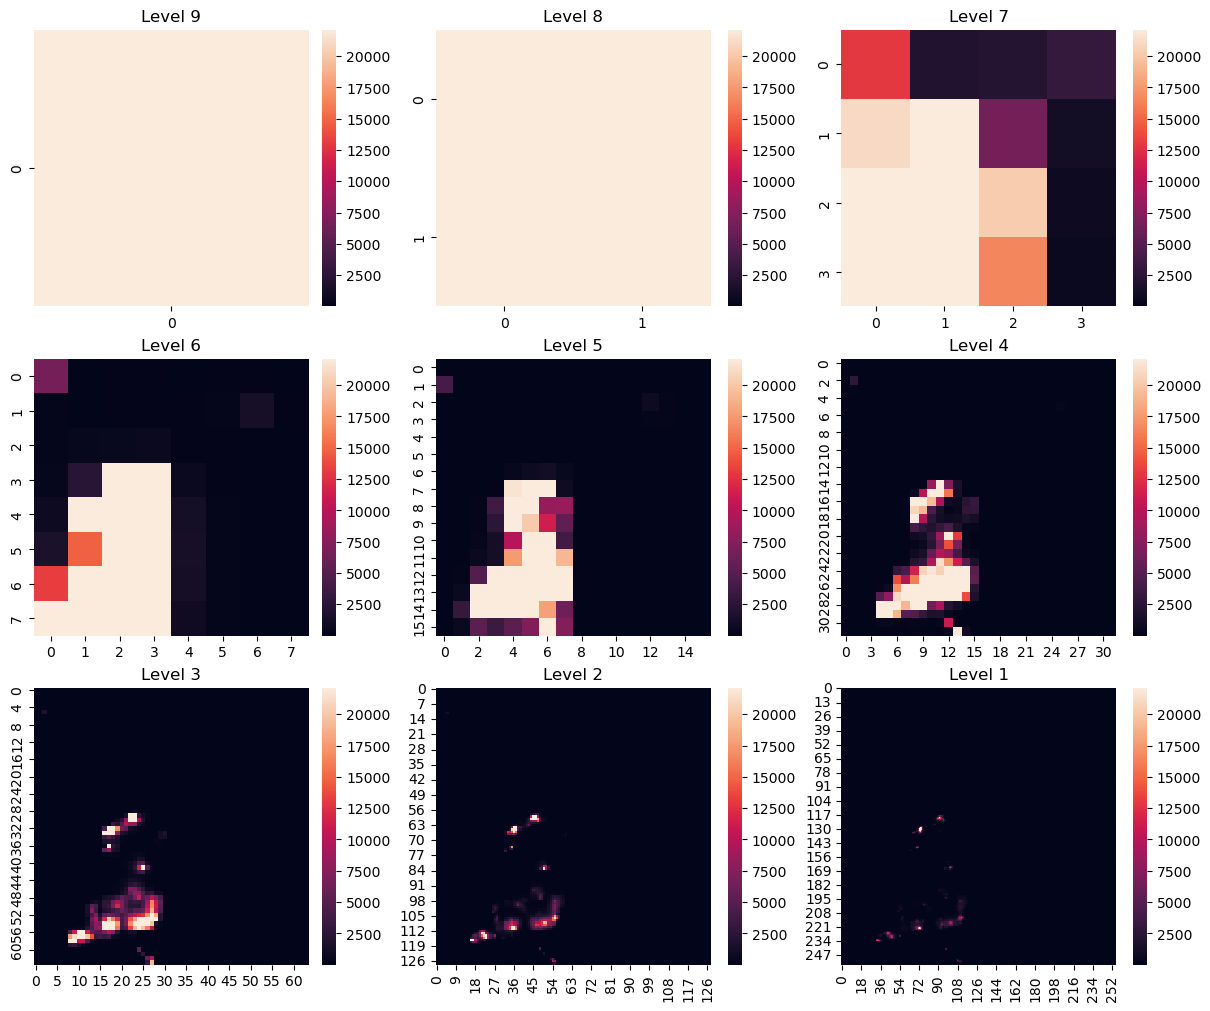

In [22]:
max_level = int(res['level'].max())

fig, axs = plt.subplots(ncols=3, nrows=int(max_level/3), figsize=(12, 10),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
level = max_level
for row in range(int(max_level/3)):
    for col in range(3):
        mat_size = int(math.pow(2, int(res['level'].max())) / math.pow(2, level))
        mat = np.zeros((mat_size, mat_size))
    
        data = res[res['level'] == str(level)]
        for r in data.loc[:, ['row', 'col', 'count']].values:
            mat[int(r[0])][int(r[1])] = r[2]
    
        # plt.figure()
        sns.heatmap(mat, vmin=res['count'].min(), vmax=res['count'].max() / 100, ax=axs[row, col])
        axs[row, col].set_title(f"Level {level}")
        level -= 1;
        # axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
        #                        transform=axs[row, col].transAxes,
        #                        ha='center', va='center', fontsize=18,
        #                        color='darkgrey')
# fig.suptitle('plt.subplots()')

In [18]:
# for level in range(int(res['level'].max()), int(res['level'].min()), -1):
#     mat_size = int(math.pow(2, int(res['level'].max())) / math.pow(2, level))
#     mat = np.zeros((mat_size, mat_size))

#     data = res[res['level'] == str(level)]
#     for row in data.loc[:, ['row', 'col', 'count']].values:
#         mat[int(row[0])][int(row[1])] = row[2]

#     # plt.figure()
#     sns.heatmap(mat, vmin=res['count'].min(), vmax=res['count'].max() / 100)
#     plt.title(f"Level {level}")
#     plt.show()
#     # plt.figure()
#     # plt.imshow(mat, vmin=res_l9['count'].min(), vmax=res_l9['count'].max())
#     # plt.show()
#     # print(mat)
#     # print()
#     # print([''])